In [1]:
# IMPORTS 
import pandas as pd
import numpy as np
import shutil
import os
import time
import subprocess
import sys
import datetime
import matplotlib.pyplot as plt
# from os.path import exists as file_exists
import matplotlib.dates as mdates
import math

# Constants
labelfont = {'fontname':'Calibri'}
ticksize = 10
labelsize = 12
subtitlesize = 14
titlesize = 18
y_min_t = 15
y_max_t = 45

In [2]:
# FILE PATHS
data_file_path = r"C:\Users\govertsen.k\Desktop\trial\typical"
data_file_path = data_file_path.replace(os.sep, '/')

In [3]:
# CONSTANTS
study = ["baseline","outage"]

# Outage 
otg_date = "July 24"
otg_hour = "12"
otg_lengths = os.listdir(data_file_path+ "/outage/")
otg_lengths.sort(key=int)


# Identify all the models
models = [os.path.splitext(filename)[0] for filename in os.listdir(data_file_path + '/outage/' + otg_lengths[0])]

# Create figures folder
new_path = data_file_path + "/" + "figures"
if not os.path.exists(new_path):
    os.makedirs(new_path)

In [4]:
otg_start =  datetime.datetime.strptime(otg_date + " " + str(otg_hour) + ':00:00','%B %d %H:%M:%S')
otg_start = pd.to_datetime(otg_start)

In [5]:
# Load Everything
# Metadata
metadata = pd.read_csv(data_file_path + "/summary/Models_Worcester_Metadata.csv")
# add leading 0s to ID
metadata['bldg_id'] = metadata['bldg_id'].values.astype('str')
metadata['bldg_id'] = metadata['bldg_id'].str.zfill(7)

# Baseline
baseline_temperature = pd.read_csv(data_file_path + "/summary/baseline_temperature.csv")
baseline_temperature['Date/Time'] = pd.to_datetime(baseline_temperature['Date/Time'])
baseline_electricity = pd.read_csv(data_file_path + "/summary/baseline_electricity.csv")
baseline_electricity['Date/Time'] = pd.to_datetime(baseline_electricity['Date/Time'])
baseline_gas = pd.read_csv(data_file_path + "/summary/baseline_gas.csv")
baseline_gas['Date/Time'] = pd.to_datetime(baseline_gas['Date/Time'])

# Outdoor
outdoor = pd.read_csv(data_file_path + "/summary/outdoor.csv")
outdoor['Date/Time'] = pd.to_datetime(outdoor['Date/Time'])

Text(0.5, 1.0, 'Outdoor Temperature')

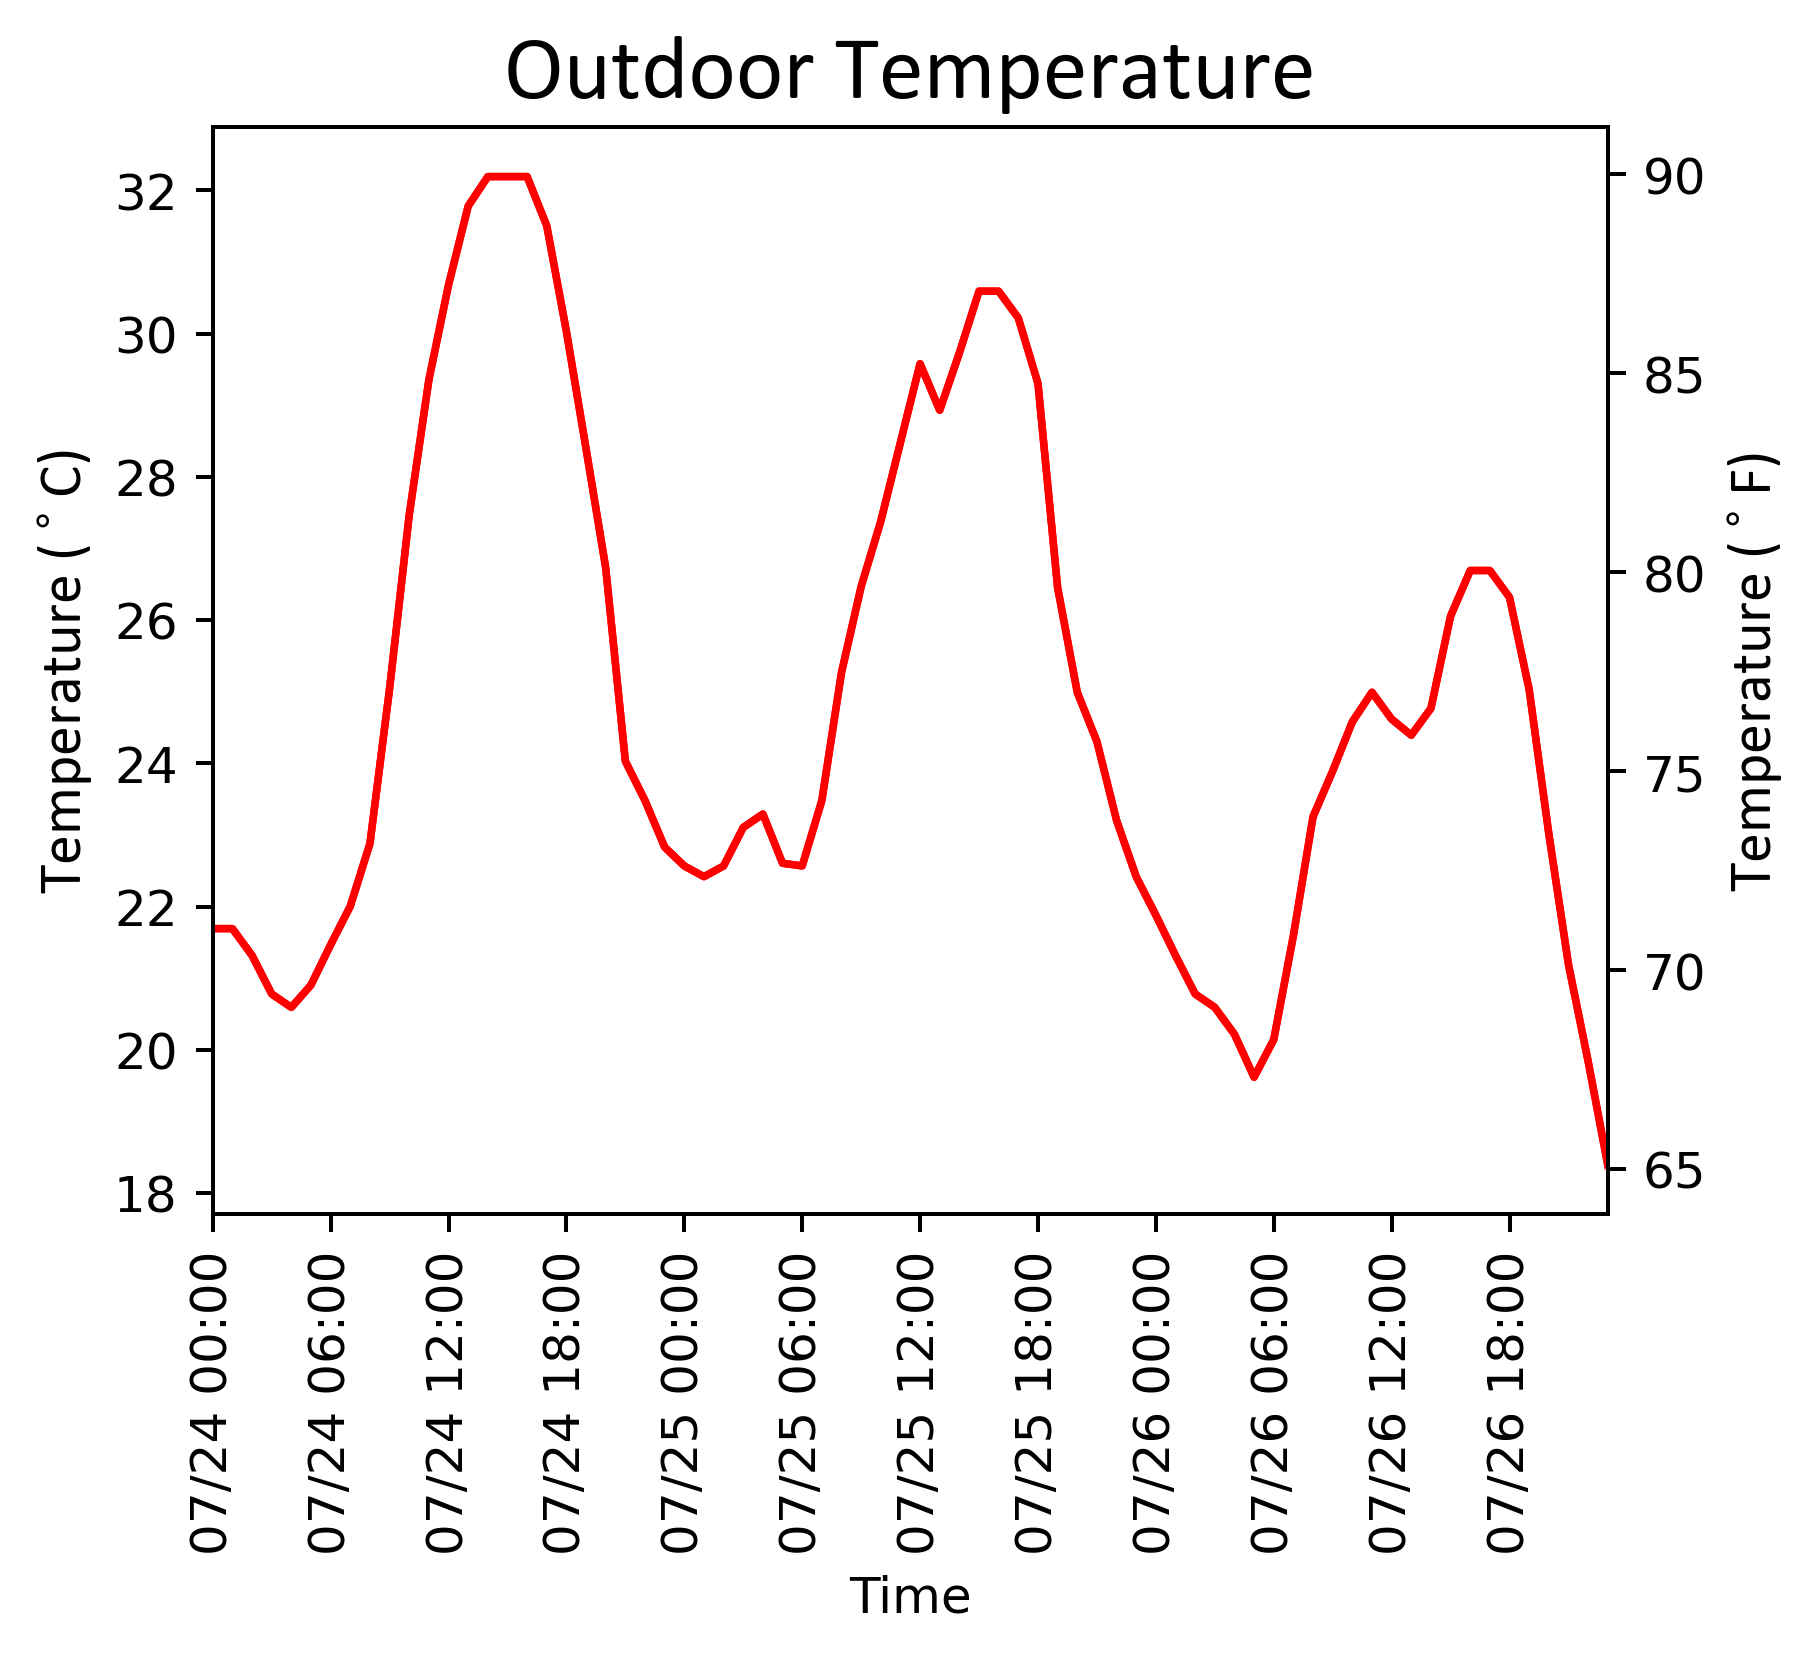

In [6]:
fig1, ax1 = plt.subplots(figsize=(5,4),dpi=360)
ax1.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],label='Outdoor Temperature',color='r')
x_ticks = pd.date_range(start =min(outdoor['Date/Time']), end =max(outdoor['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax1b = ax1.twinx()
ax1b.plot(outdoor['Date/Time'],32+(9/5)*outdoor['Outdoor Temp'],label='Outdoor Temperature',color='r')
ax1b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
ax1.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax1.set_xlim(min(outdoor['Date/Time']),max(outdoor['Date/Time']))
#ax1.legend()
ax1.set_title('Outdoor Temperature',fontsize=titlesize,**labelfont)

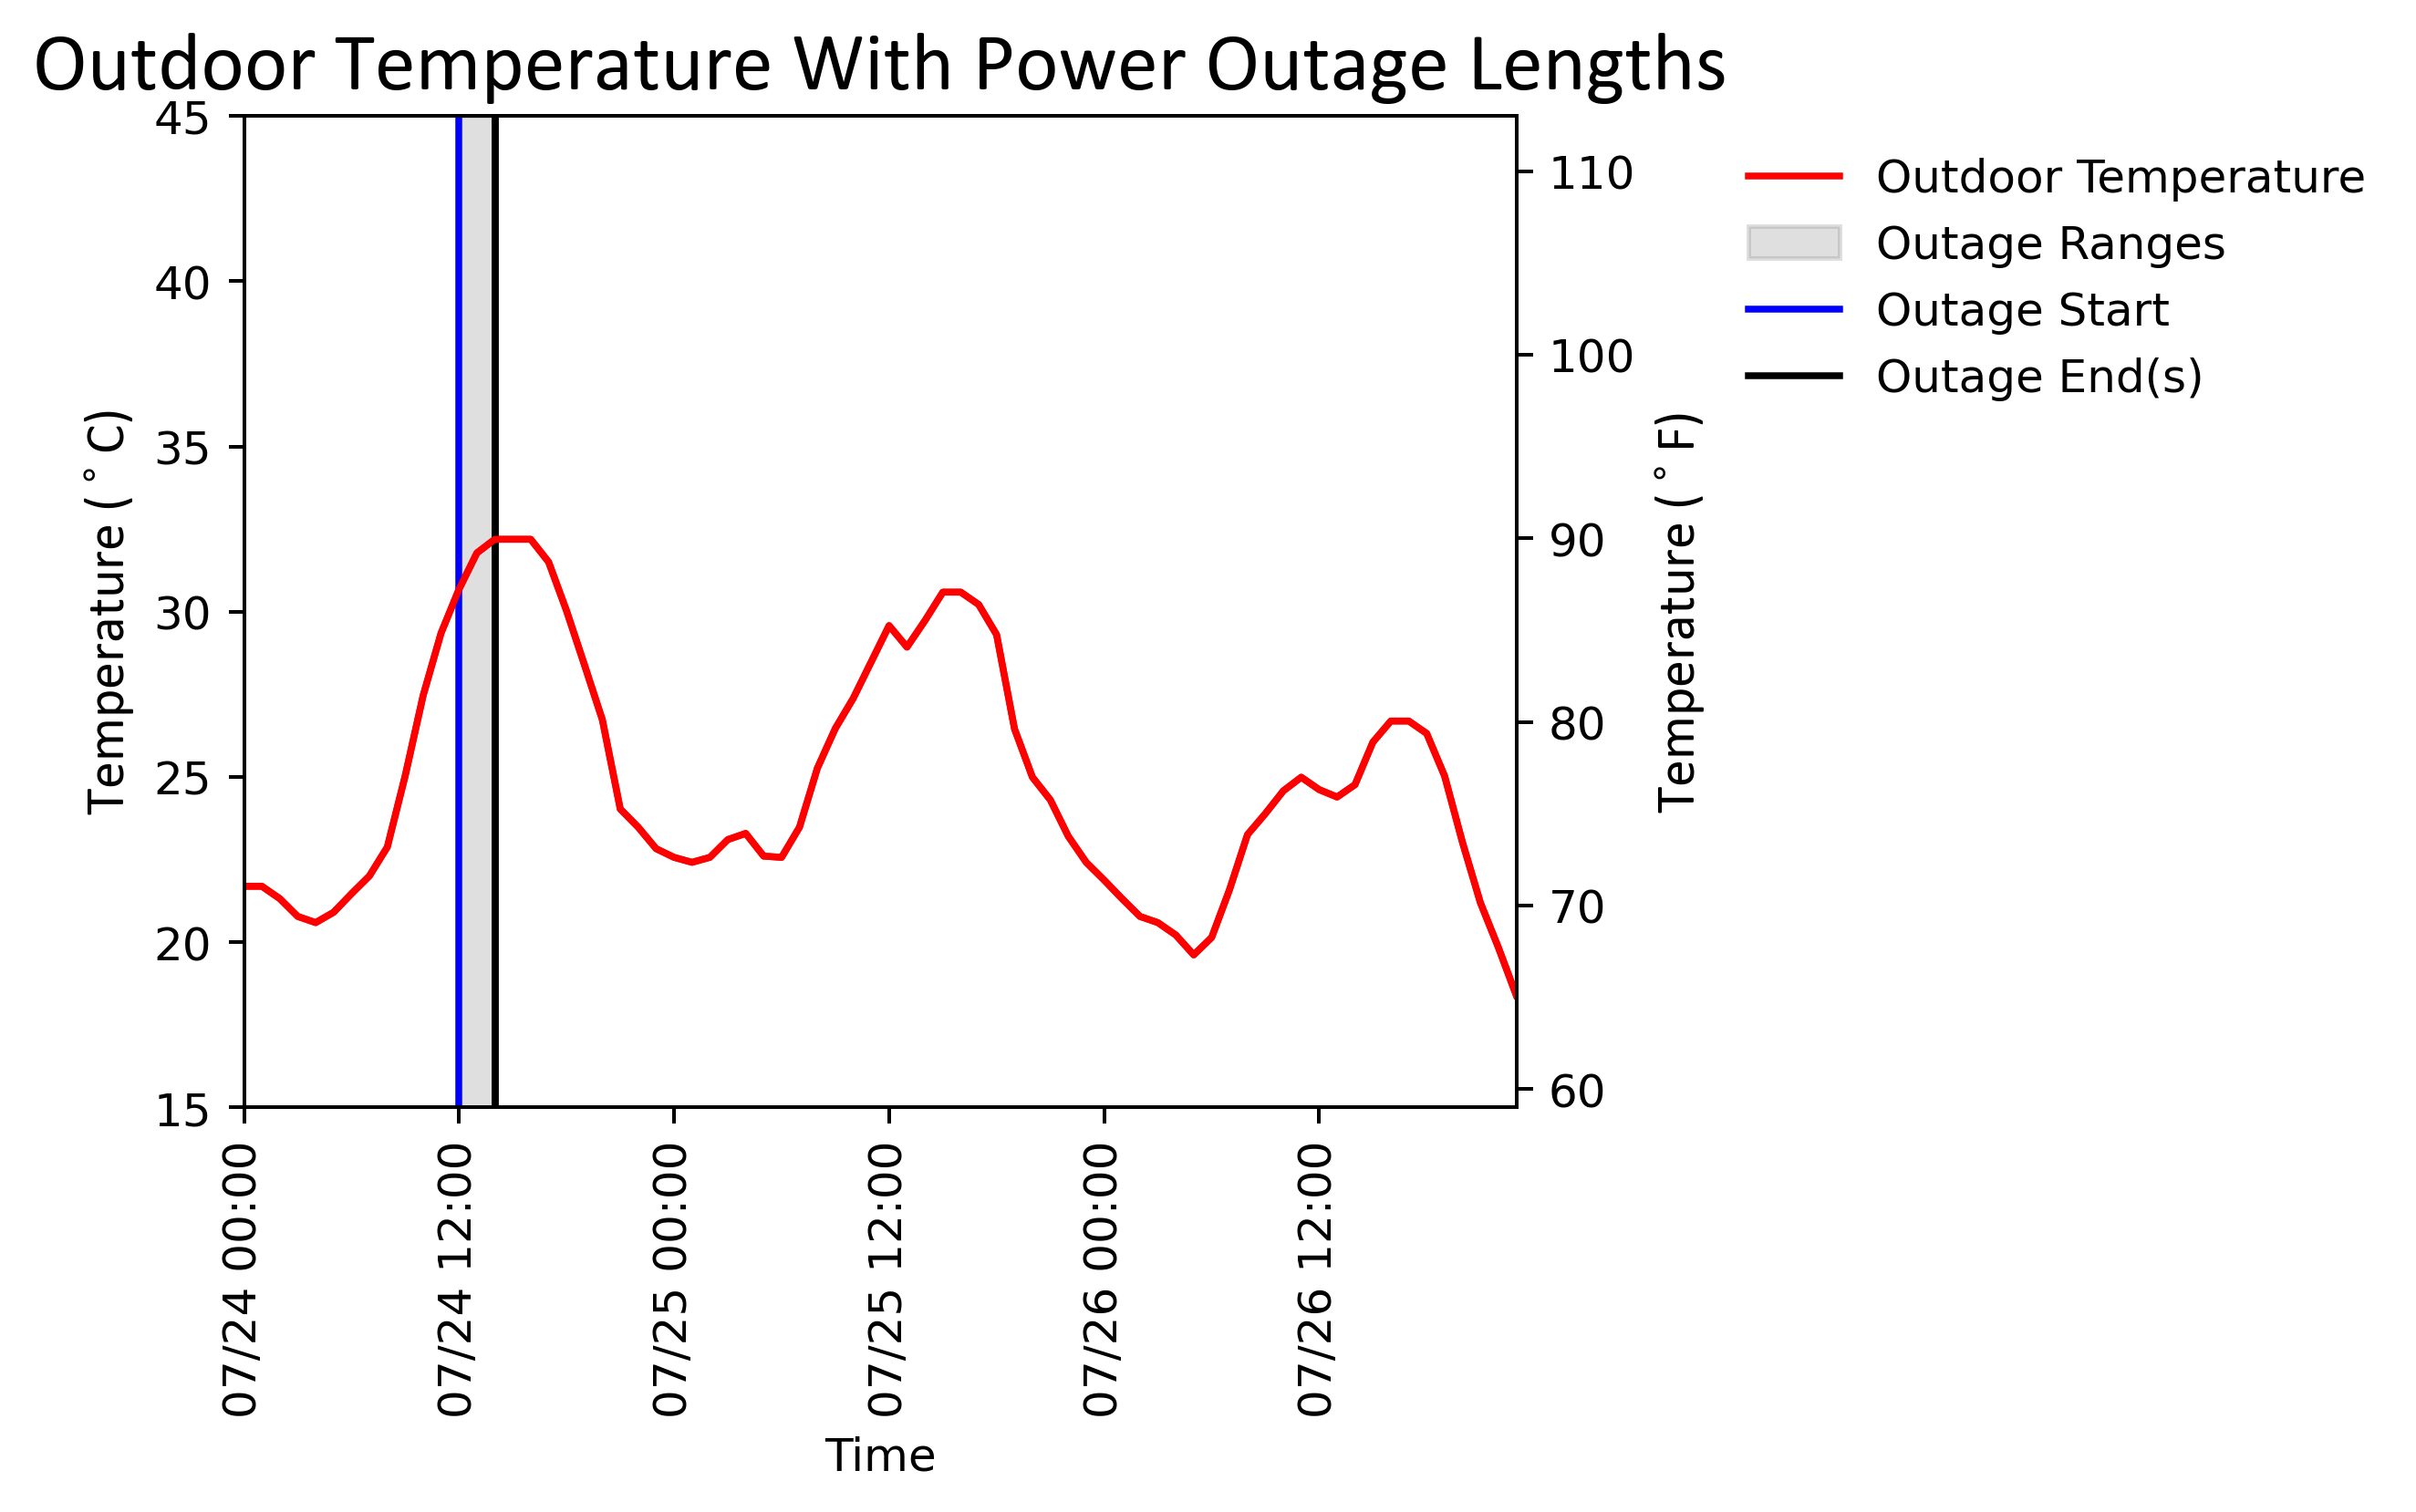

In [7]:
fig1, ax1 = plt.subplots(figsize=(5,4),dpi=360)
# y_min = 15
# y_max = 35
ax1.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],label='Outdoor Temperature',color='r')
x_ticks = pd.date_range(start =min(outdoor['Date/Time']), end =max(outdoor['Date/Time']),freq ='12H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax1b = ax1.twinx()
ax1b.plot(outdoor['Date/Time'],32+(9/5)*outdoor['Outdoor Temp'],label='Outdoor Temperature',color='r')
ax1b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
ax1.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax1.set_xlim(min(outdoor['Date/Time']),max(outdoor['Date/Time']))
ax1.set_ylim([y_min_t,y_max_t])
ax1b.set_ylim([32+(9/5)*y_min_t,32+(9/5)*y_max_t])
ax1.fill_between([otg_start,otg_start + pd.Timedelta(int(otg_lengths[-1]),"H")],[y_max_t,y_max_t],alpha=.25,color='grey',label="Outage Ranges")
for each_outage in otg_lengths:
    this_otg_end = otg_start + pd.Timedelta(int(each_outage),"H")
    ax1.axvline(x = this_otg_end, color = 'k')
ax1.axvline(x = otg_start, color = 'b', label = 'Outage Start')
ax1.axvline(x = this_otg_end, color = 'k', label = 'Outage End(s)')
ax1.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax1.set_title('Outdoor Temperature With Power Outage Lengths',fontsize=titlesize,**labelfont)
# fig1.tight_layout()
fig1.savefig(data_file_path + "/figures/"+"poweroutagelengths.svg",bbox_inches = "tight")

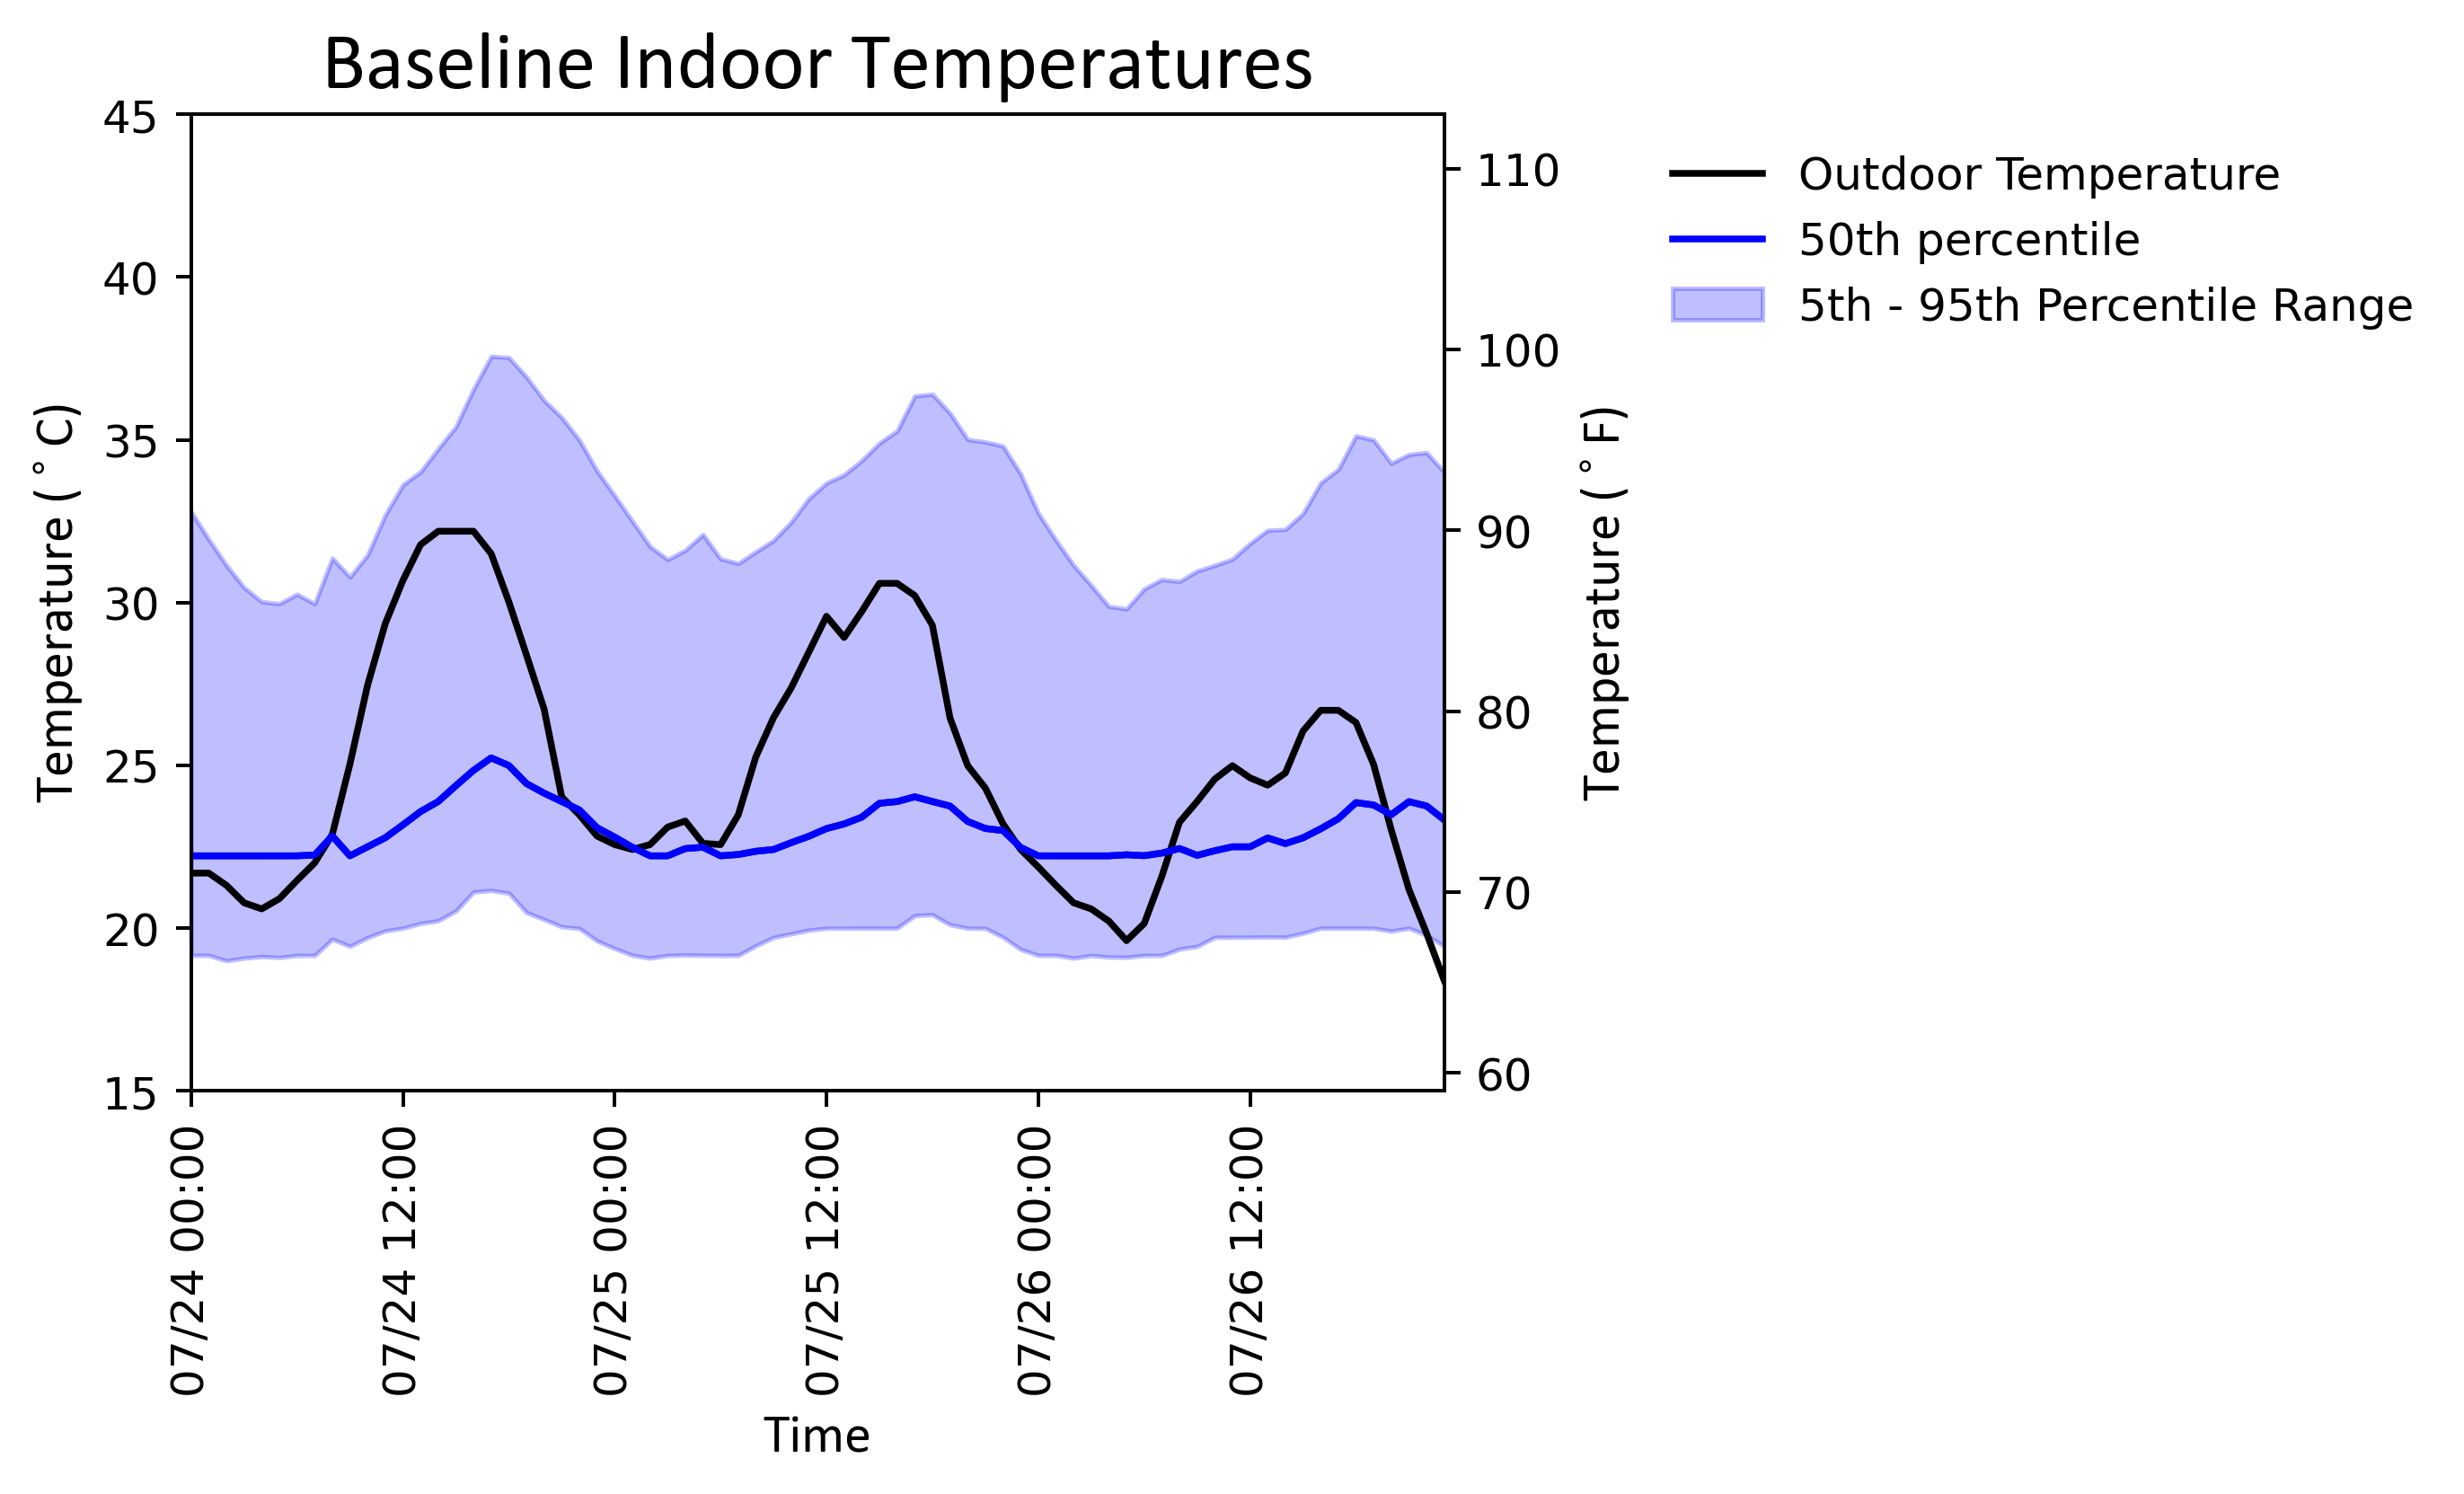

In [8]:
baseline_summary = pd.DataFrame()
baseline_summary['Date/Time'] = baseline_temperature['Date/Time']
baseline_summary['T - 5%'] = baseline_temperature.quantile(q=.05,axis=1)
baseline_summary['T - 50%'] = baseline_temperature.quantile(q=.5,axis=1)
baseline_summary['T - 95%'] = baseline_temperature.quantile(q=.95,axis=1)

f3, ax3 = plt.subplots(figsize=(5,4),dpi=360)
ax3.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
ax3.plot(baseline_summary['Date/Time'],baseline_summary['T - 50%'],color = 'b',label="50th percentile")
ax3.fill_between(baseline_summary['Date/Time'], baseline_summary['T - 5%'], baseline_summary['T - 95%'],alpha=.25,color='b',label="5th - 95th Percentile Range")
ax3b = ax3.twinx()
ax3b.plot(baseline_summary['Date/Time'],32+(9/5)*baseline_summary['T - 50%'],color = 'b',label="50th percentile")
ax3b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='12H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
ax3.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax3.set_xlim(min(baseline_summary['Date/Time']),max(baseline_summary['Date/Time']))
ax3.set_ylim((y_min_t,y_max_t))
ax3b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
ax3.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax3.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax3.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax3.set_title('Baseline Indoor Temperatures',fontsize=titlesize,**labelfont)
f3.savefig(data_file_path + "/figures/"+"baselinetemp.svg",bbox_inches = "tight")

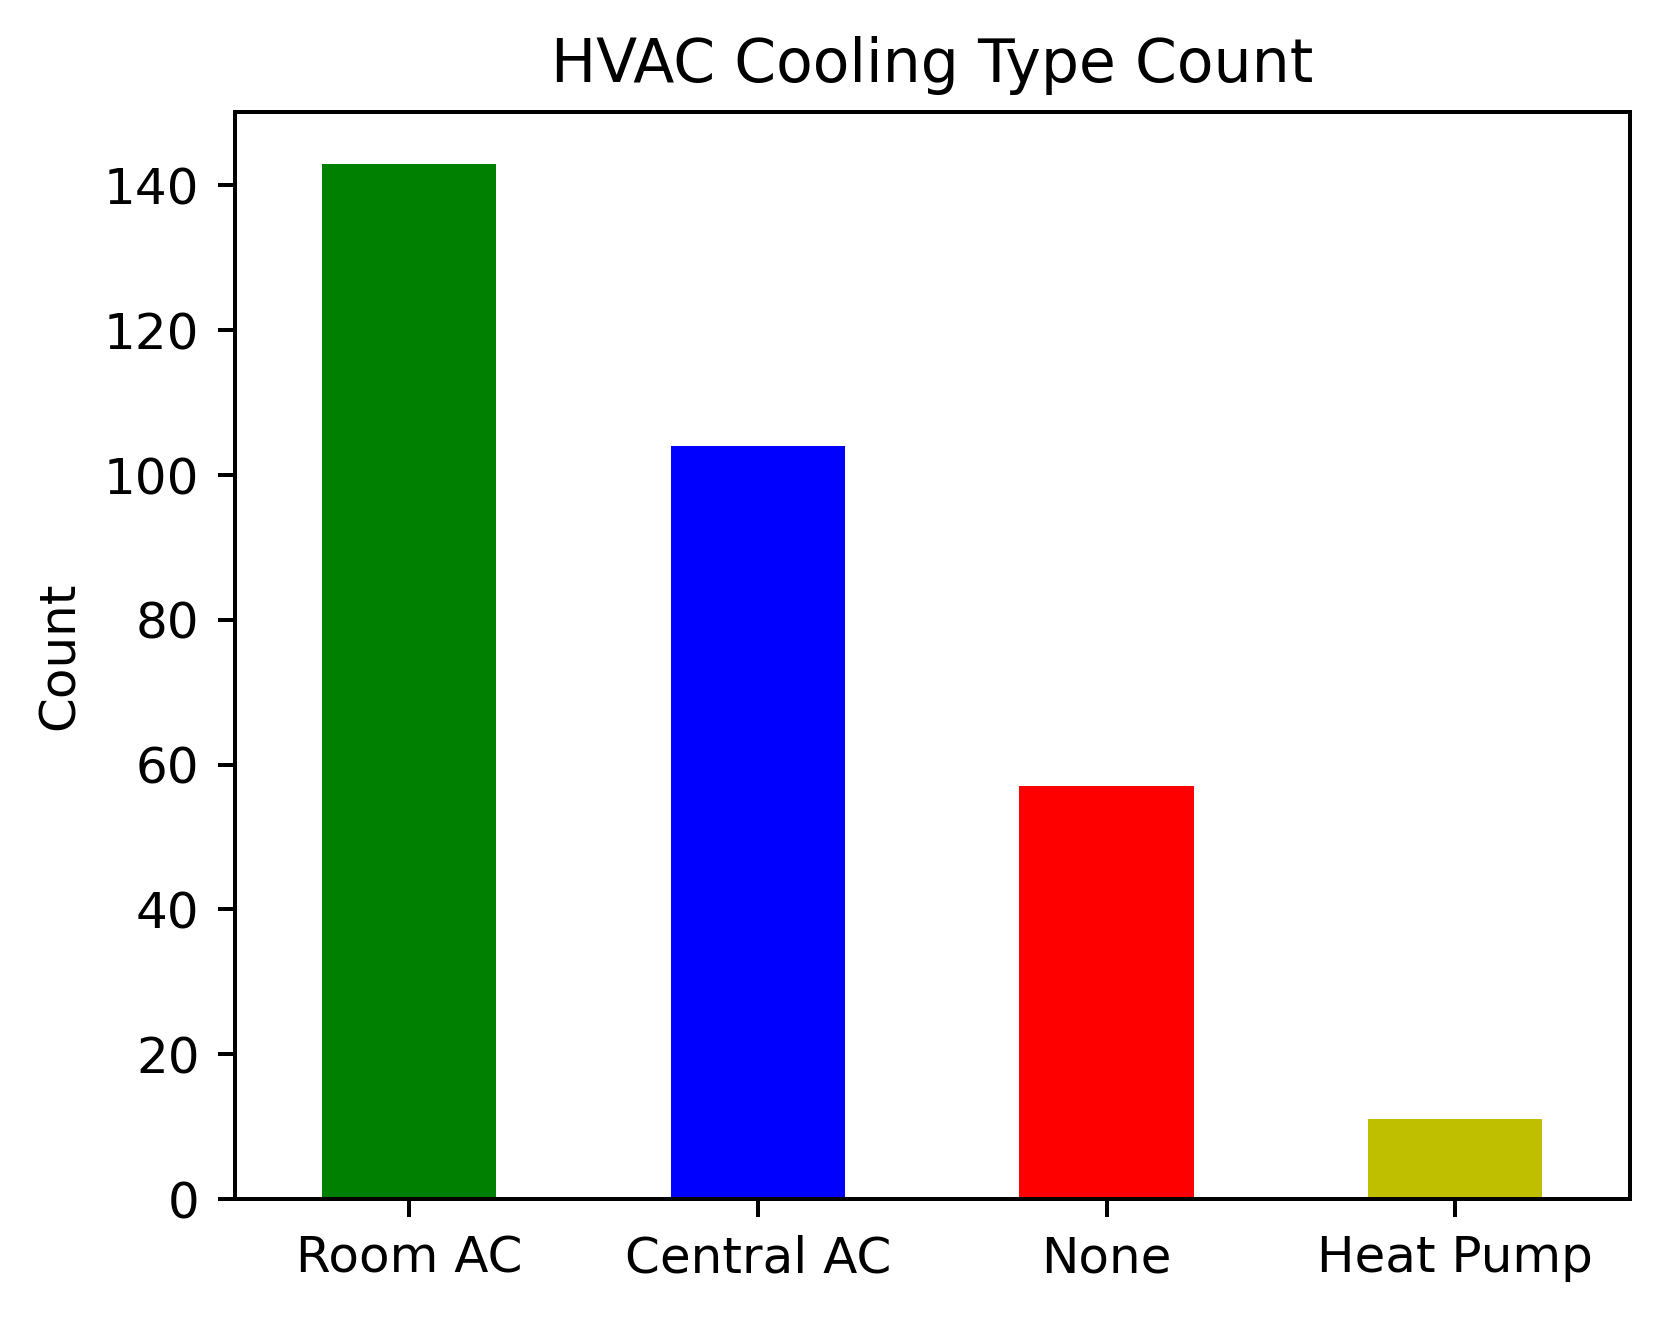

In [9]:
#if each_'Central AC', 'Room AC', 'None', 'Heat Pump'
plt.figure(figsize=(5,4),dpi=360)
metadata['in.hvac_cooling_type'].value_counts().plot(kind='bar', color = ['g','b','r','y'])
plt.title('HVAC Cooling Type Count')
plt.ylabel('Count')
plt.xticks(rotation = 'horizontal')
plt.savefig(data_file_path + "/figures/"+"hvactypecount.svg",bbox_inches = "tight")

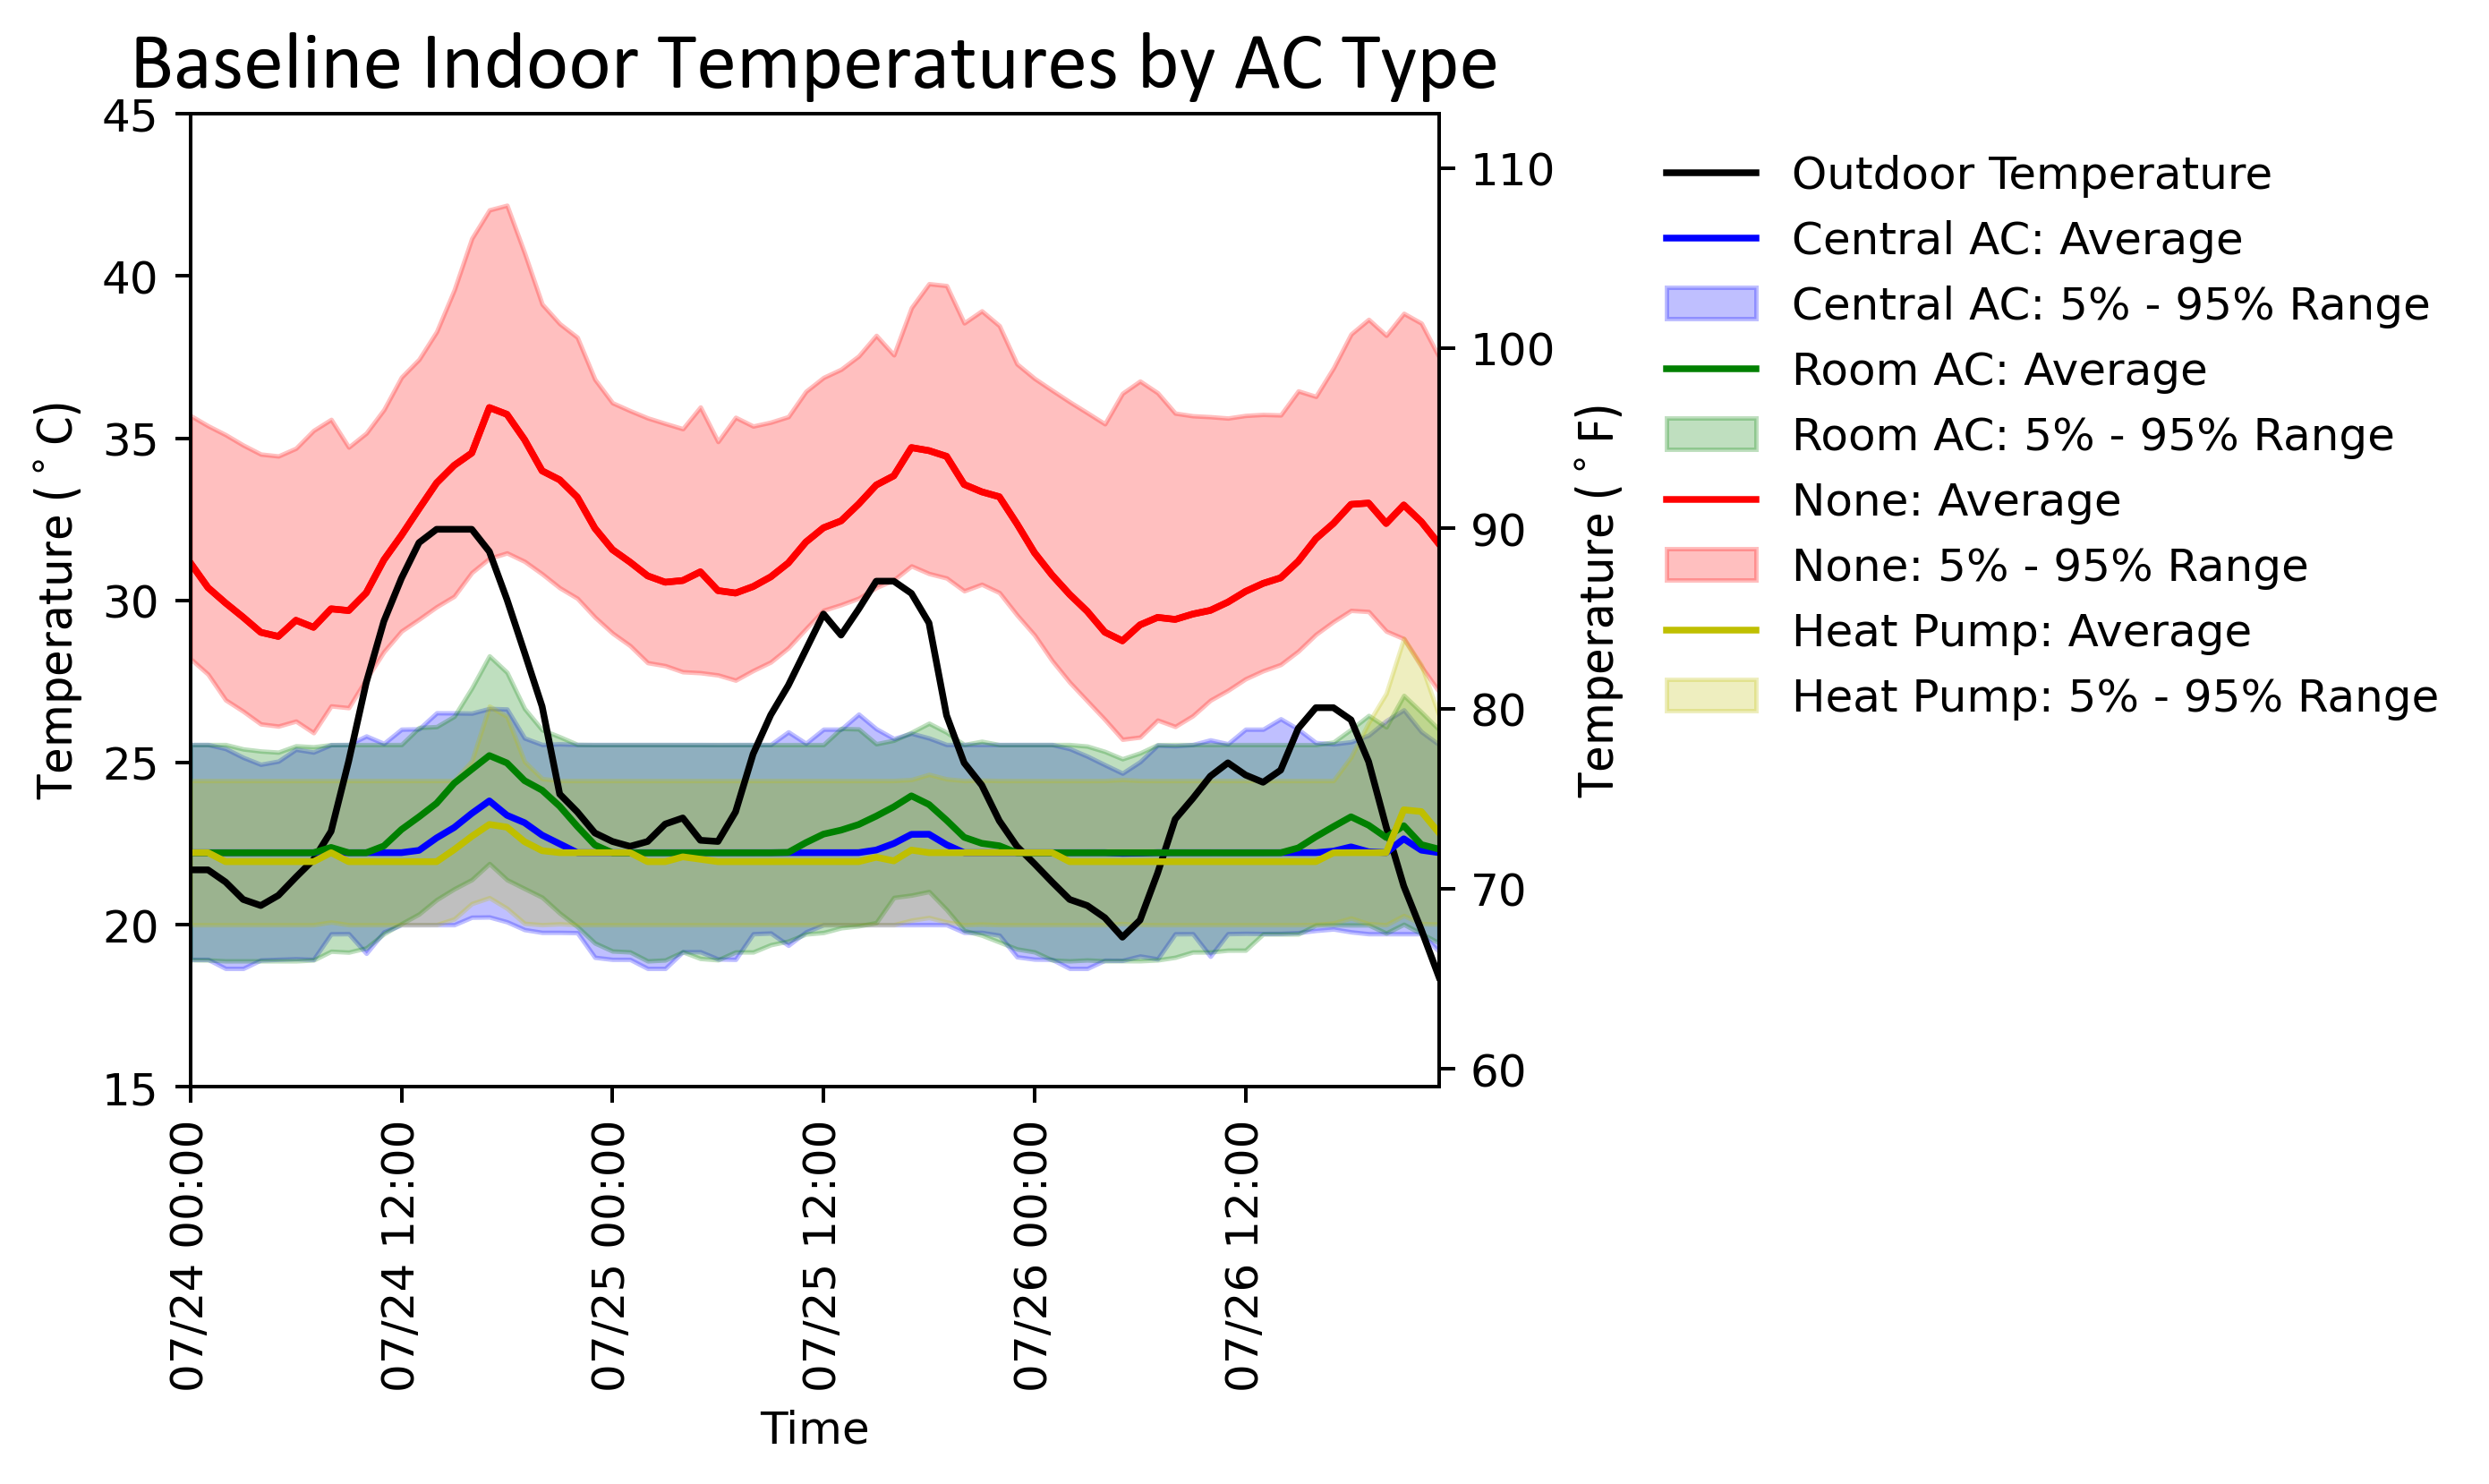

In [10]:
baseline_summary = pd.DataFrame()
baseline_summary['Date/Time'] = baseline_temperature['Date/Time']
f4, ax4=plt.subplots(figsize=(5,4),dpi=360)
ax4.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    cols = 'bldg' + metadata.loc[metadata['in.hvac_cooling_type']== hvac_type]['bldg_id'].astype(str)
    subset = pd.DataFrame(baseline_temperature, columns=cols)
    baseline_summary[hvac_type + ' - T - 5%'] = subset.quantile(q=.05,axis=1)
    baseline_summary[hvac_type + ' - T - 50%'] =subset.quantile(q=.5,axis=1)
    baseline_summary[hvac_type + ' - T - 95%'] = subset.quantile(q=.95,axis=1)
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    ax4.plot(baseline_summary['Date/Time'],baseline_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + ": Average"))
    ax4.fill_between(baseline_summary['Date/Time'], baseline_summary[hvac_type + ' - T - 5%'], baseline_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + ": 5% - 95% Range"))
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='12H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
ax4.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax4b=ax4.twinx()
ax4b.plot(baseline_summary['Date/Time'],32+(9/5)*baseline_summary['None - T - 50%'],color = 'r')
ax4.set_xlim(min(baseline_summary['Date/Time']),max(baseline_summary['Date/Time']))
# y_min = 2*math.floor(baseline_summary['Central AC - T - 5%'].min()/2)
# y_max = 2*math.ceil(baseline_summary['None - T - 95%'].max()/2)
ax4.set_ylim((y_min_t,y_max_t))
ax4b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
ax4b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
ax4.set_xlabel('Time')
ax4.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax4.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax4.set_title('Baseline Indoor Temperatures by AC Type',fontsize=titlesize,**labelfont)
f4.savefig(data_file_path + "/figures/"+"BaselineTempByAcType.svg",bbox_inches = "tight")

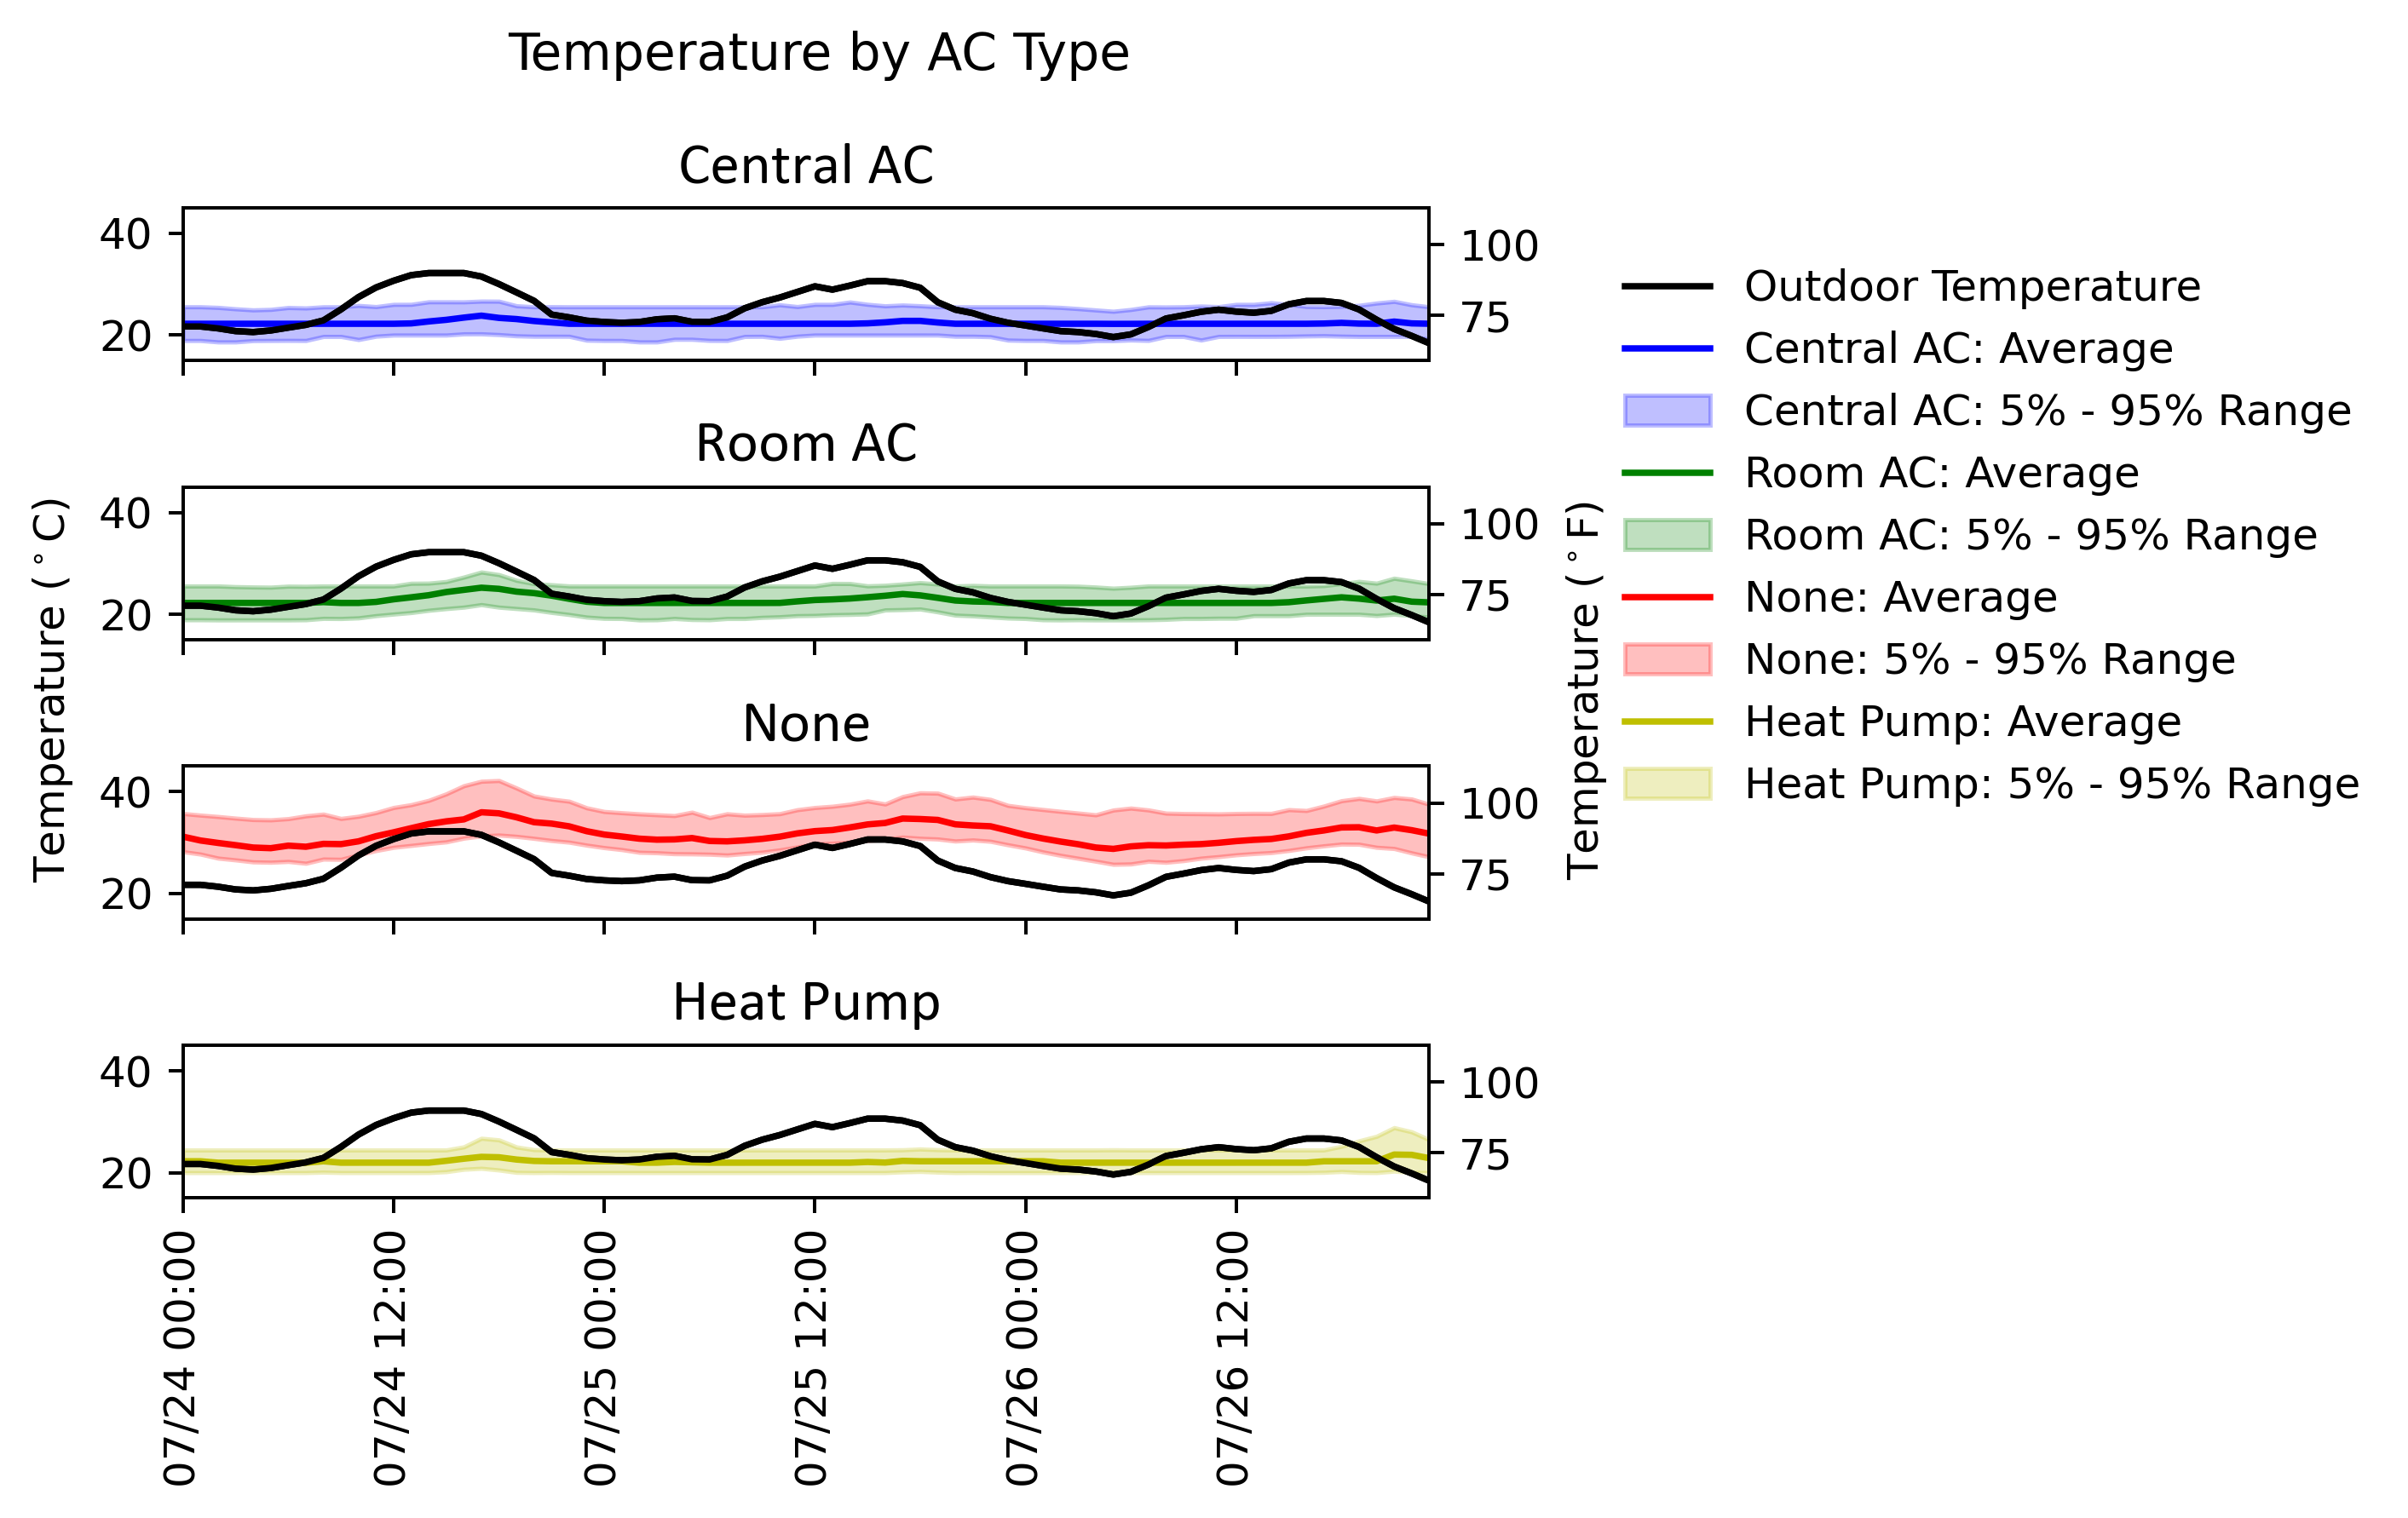

In [11]:
fig, axs = plt.subplots(4,figsize=(5,5),dpi=360)
# y_min = 15
# y_max = 45
# fig.suptitle('Vertically stacked subplots')
ax_id = 0 
for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    if ax_id == 0: 
        axs[ax_id].plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
    else:
        axs[ax_id].plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k')
    axs[ax_id].set_title(hvac_type,fontsize=subtitlesize,**labelfont)    
    axs[ax_id].plot(baseline_summary['Date/Time'],baseline_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + ": Average"))
    axs[ax_id].fill_between(baseline_summary['Date/Time'], baseline_summary[hvac_type + ' - T - 5%'], baseline_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + ": 5% - 95% Range"))
    axs[ax_id].set_ylim([y_min_t,y_max_t])
    axs[ax_id].set_xlim(min(baseline_summary['Date/Time']),max(baseline_summary['Date/Time']))
    axb=axs[ax_id].twinx()
    axb.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
    axb.plot(outdoor['Date/Time'],outdoor['Outdoor Temp']*(9/5) + 32,color='k')
    
    ax_id = ax_id + 1
    
for ax in axs:
    ax.label_outer()
    
# plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
lines = []
labels = []
  
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    labels.extend(Label)
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='12H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
axs[ax_id - 1].set_xticks(x_ticks,x_tick_labels,rotation='vertical')
fig.tight_layout()
fig.legend(lines, labels, bbox_to_anchor=(1, .85), loc='upper left',frameon=False)
fig.text(0, 0.55, 'Temperature ($^\circ$C)', ha='center', va='center', rotation='vertical')
fig.text(1, 0.55, 'Temperature ($^\circ$F)', ha='center', va='center', rotation='vertical')
fig.suptitle('Temperature by AC Type')
fig.tight_layout()
fig.savefig(data_file_path + "/figures/"+"BaselineTempByAcTypeSplit.svg",bbox_inches = "tight")

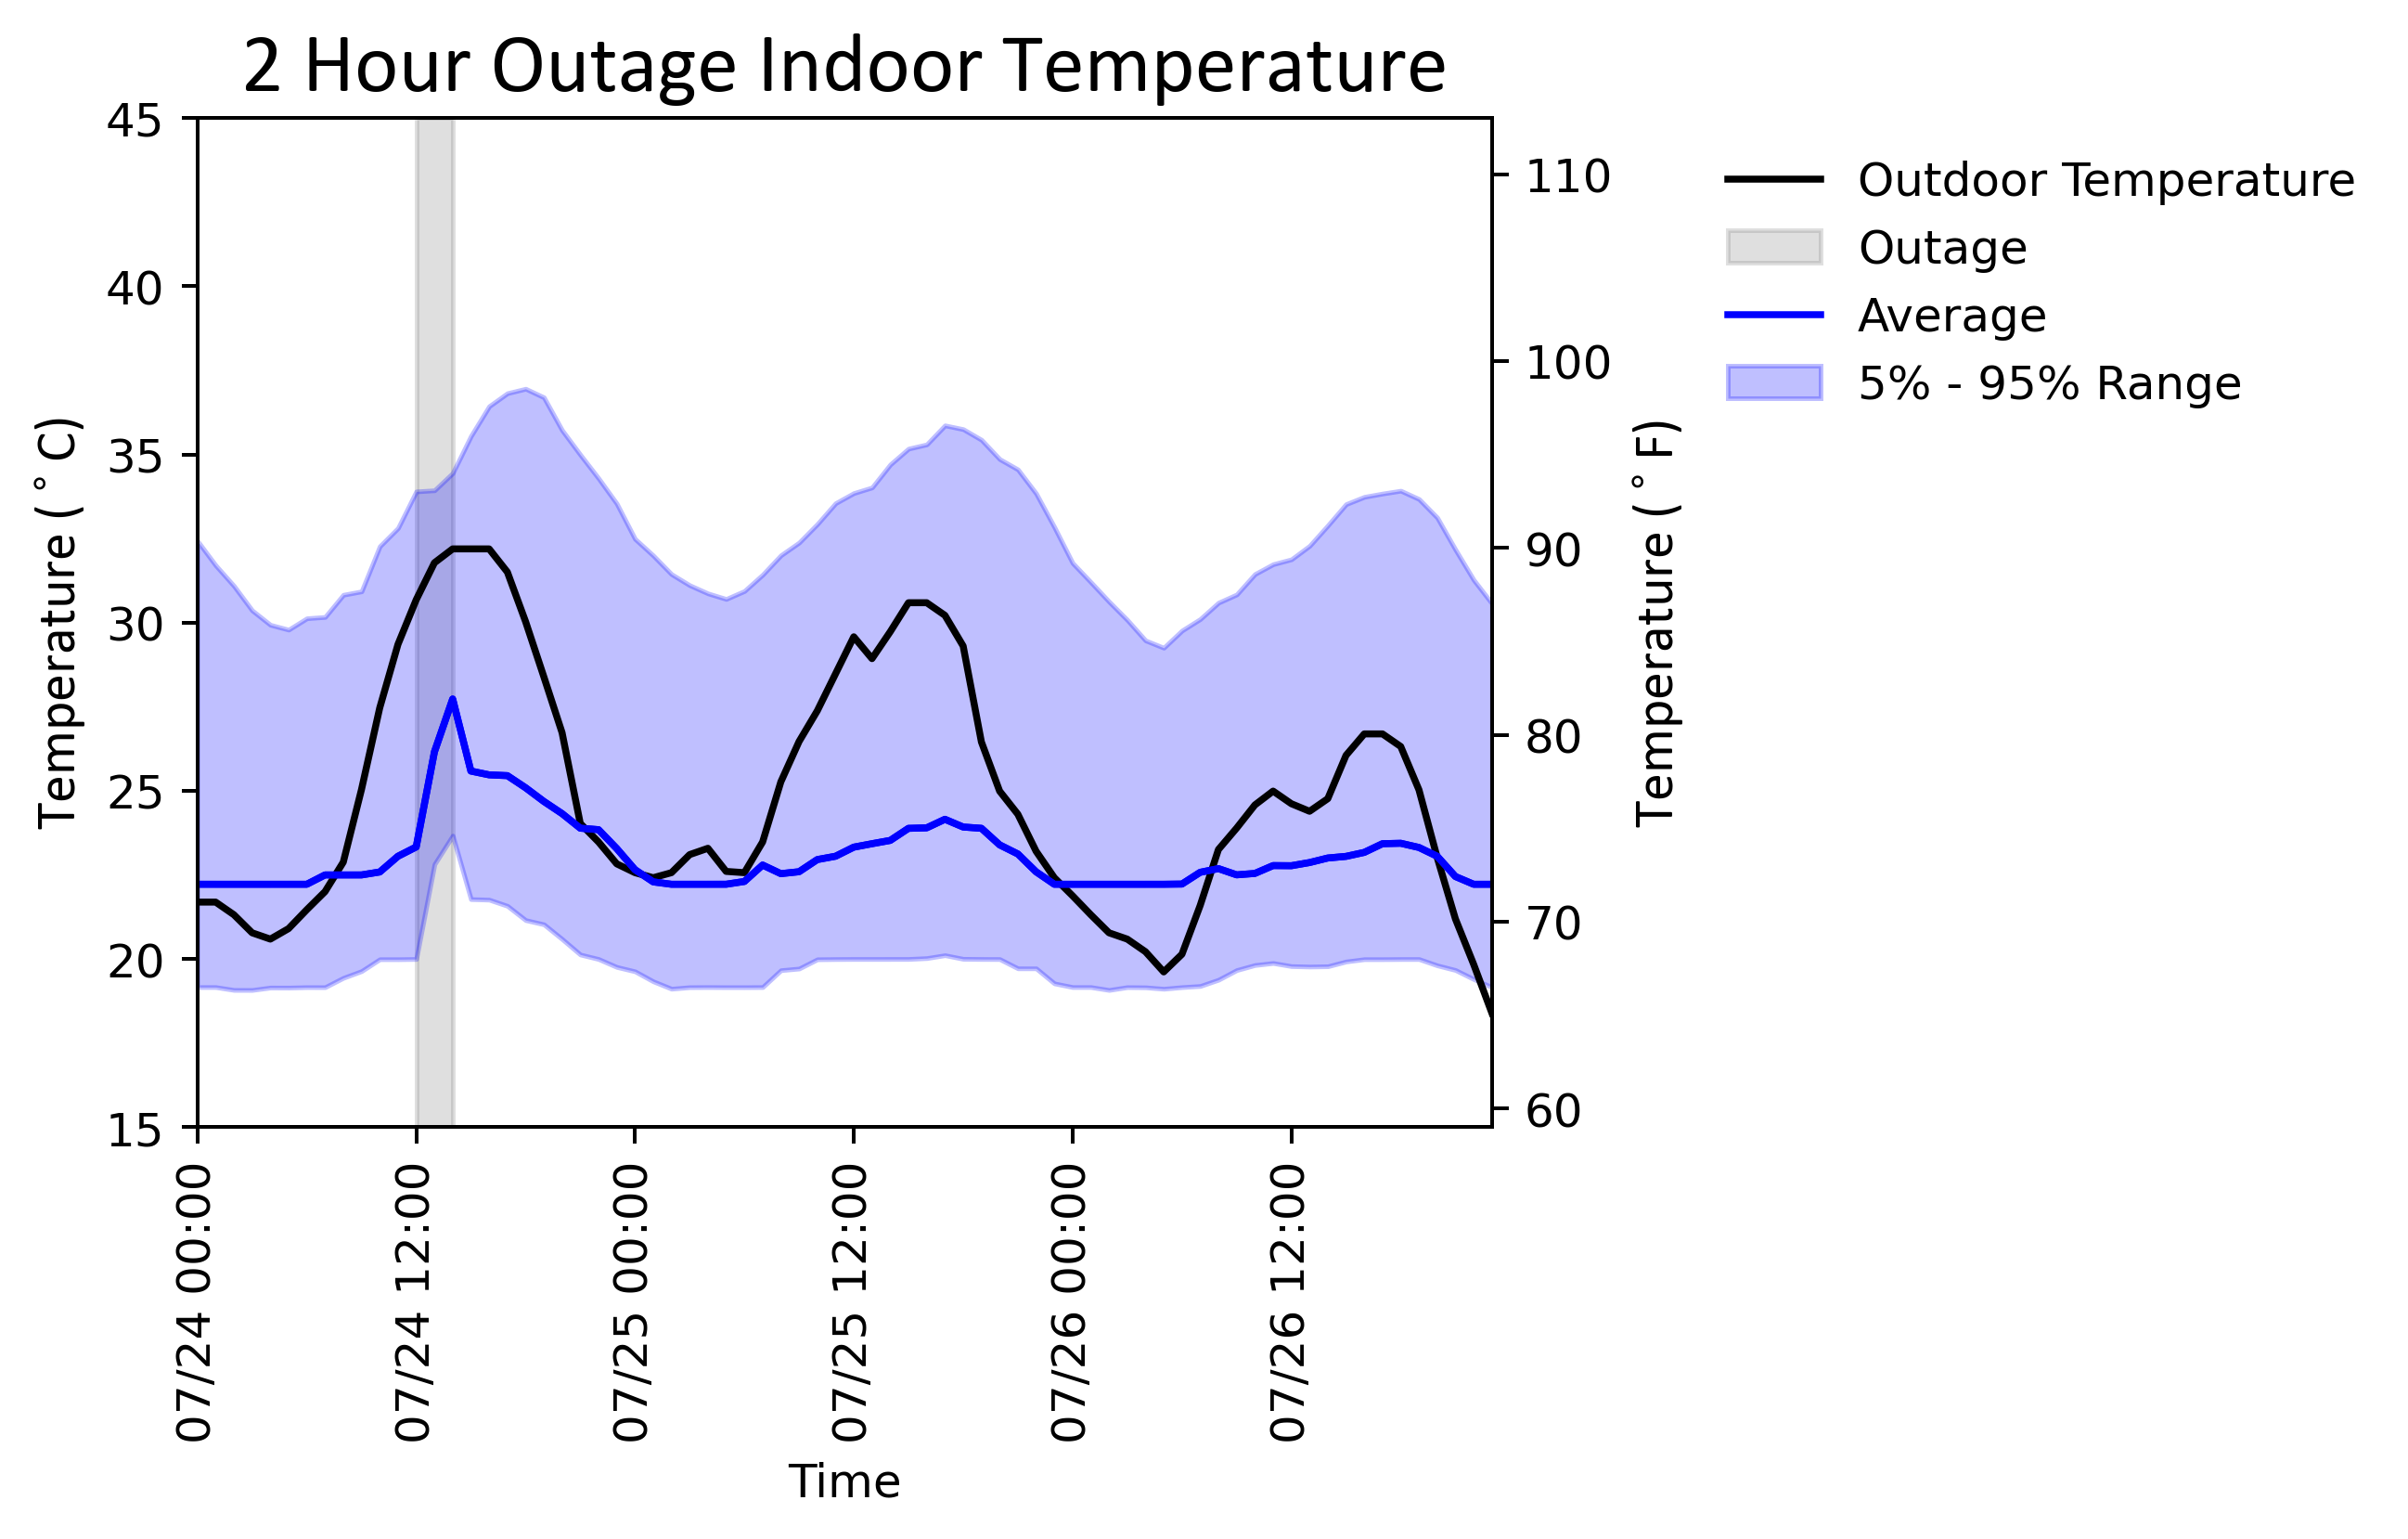

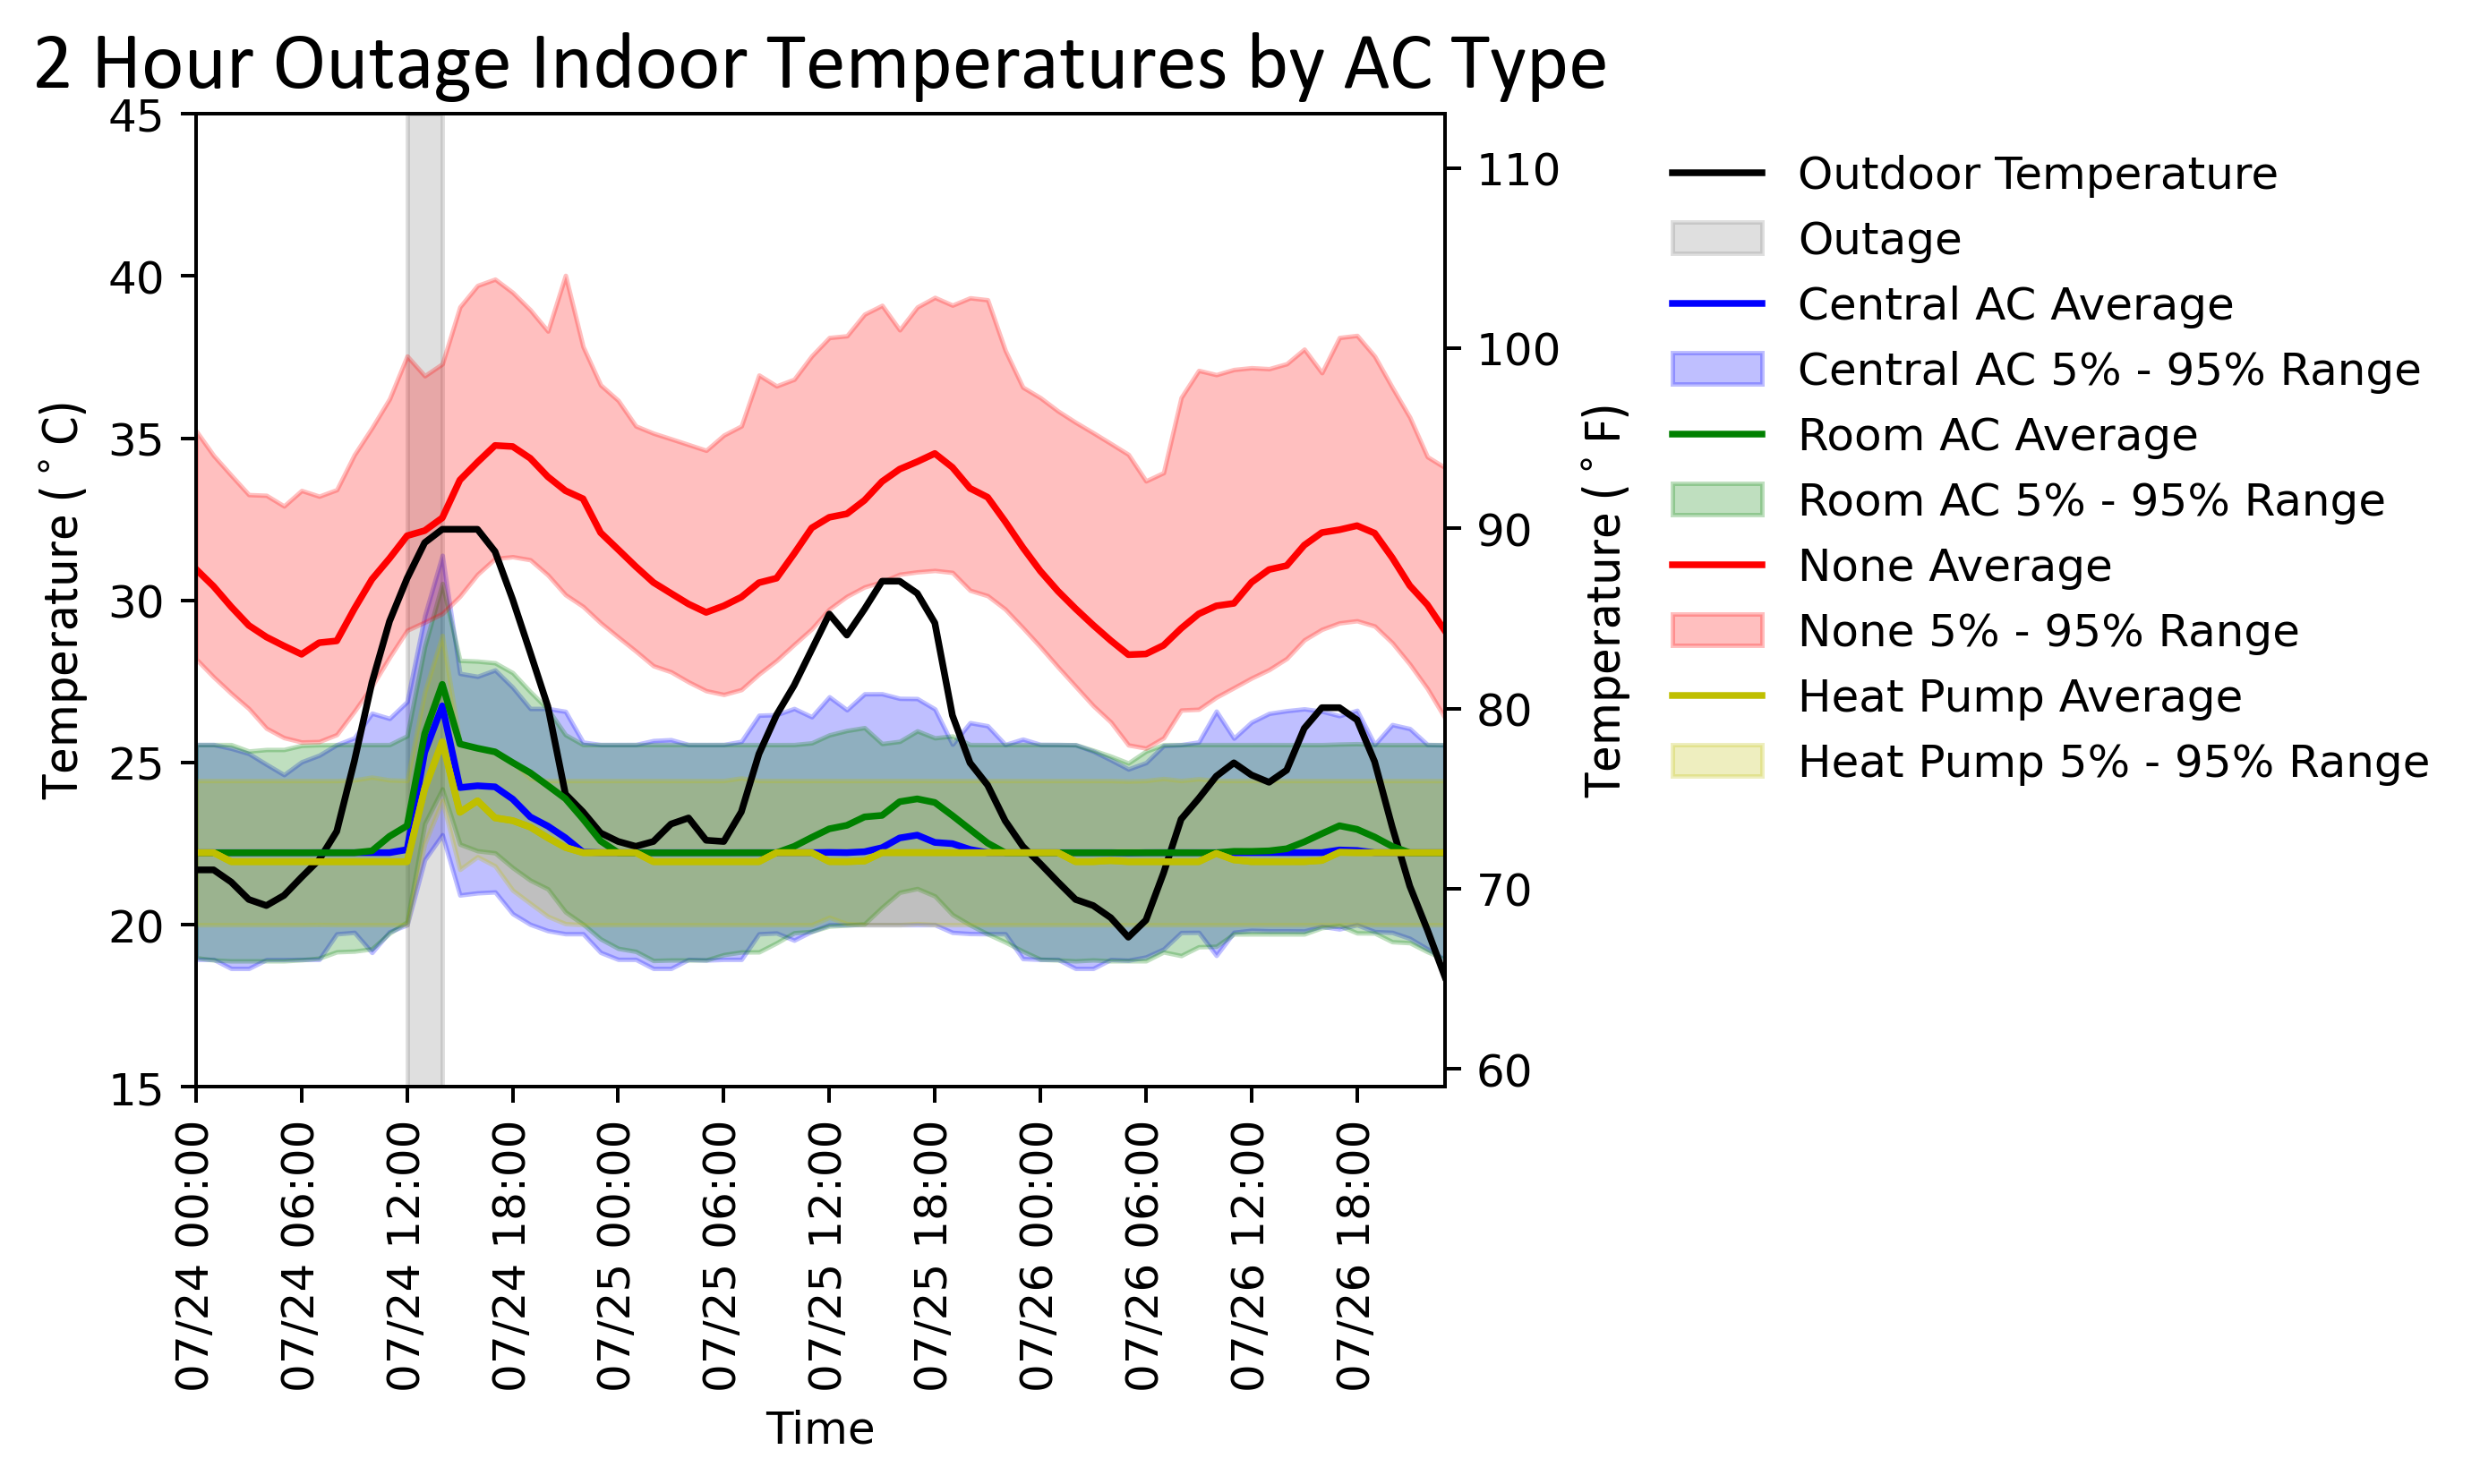

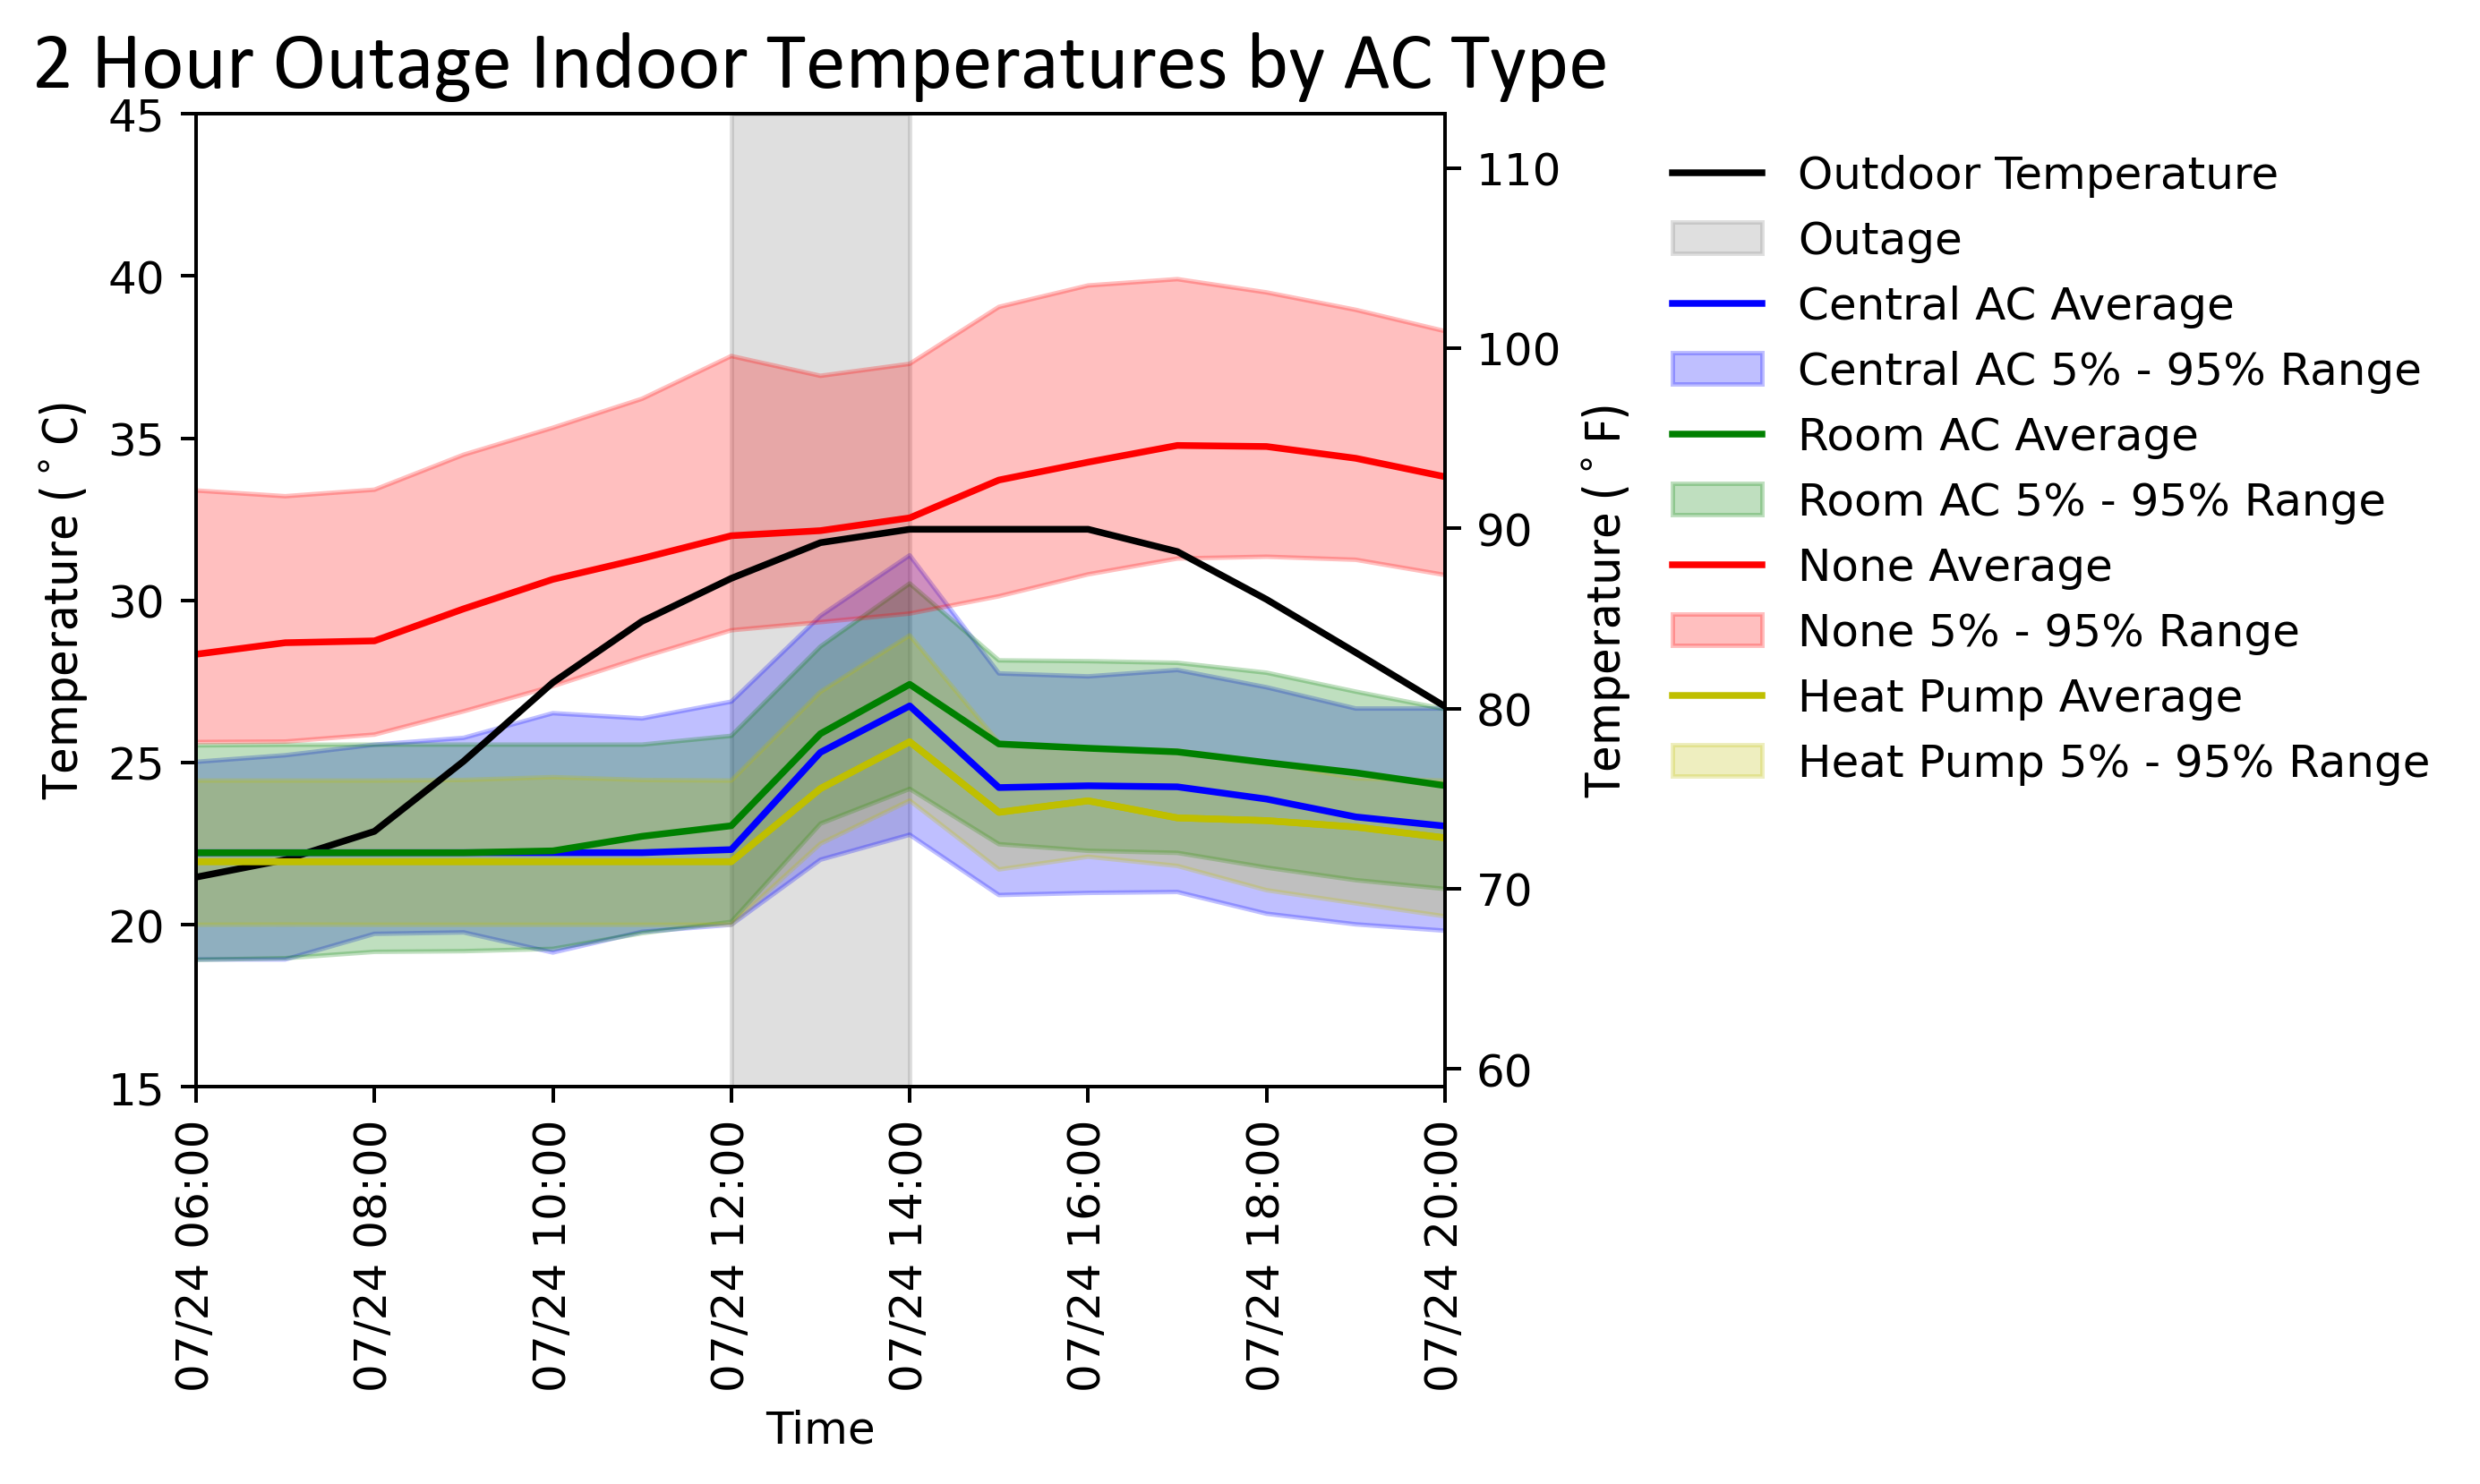

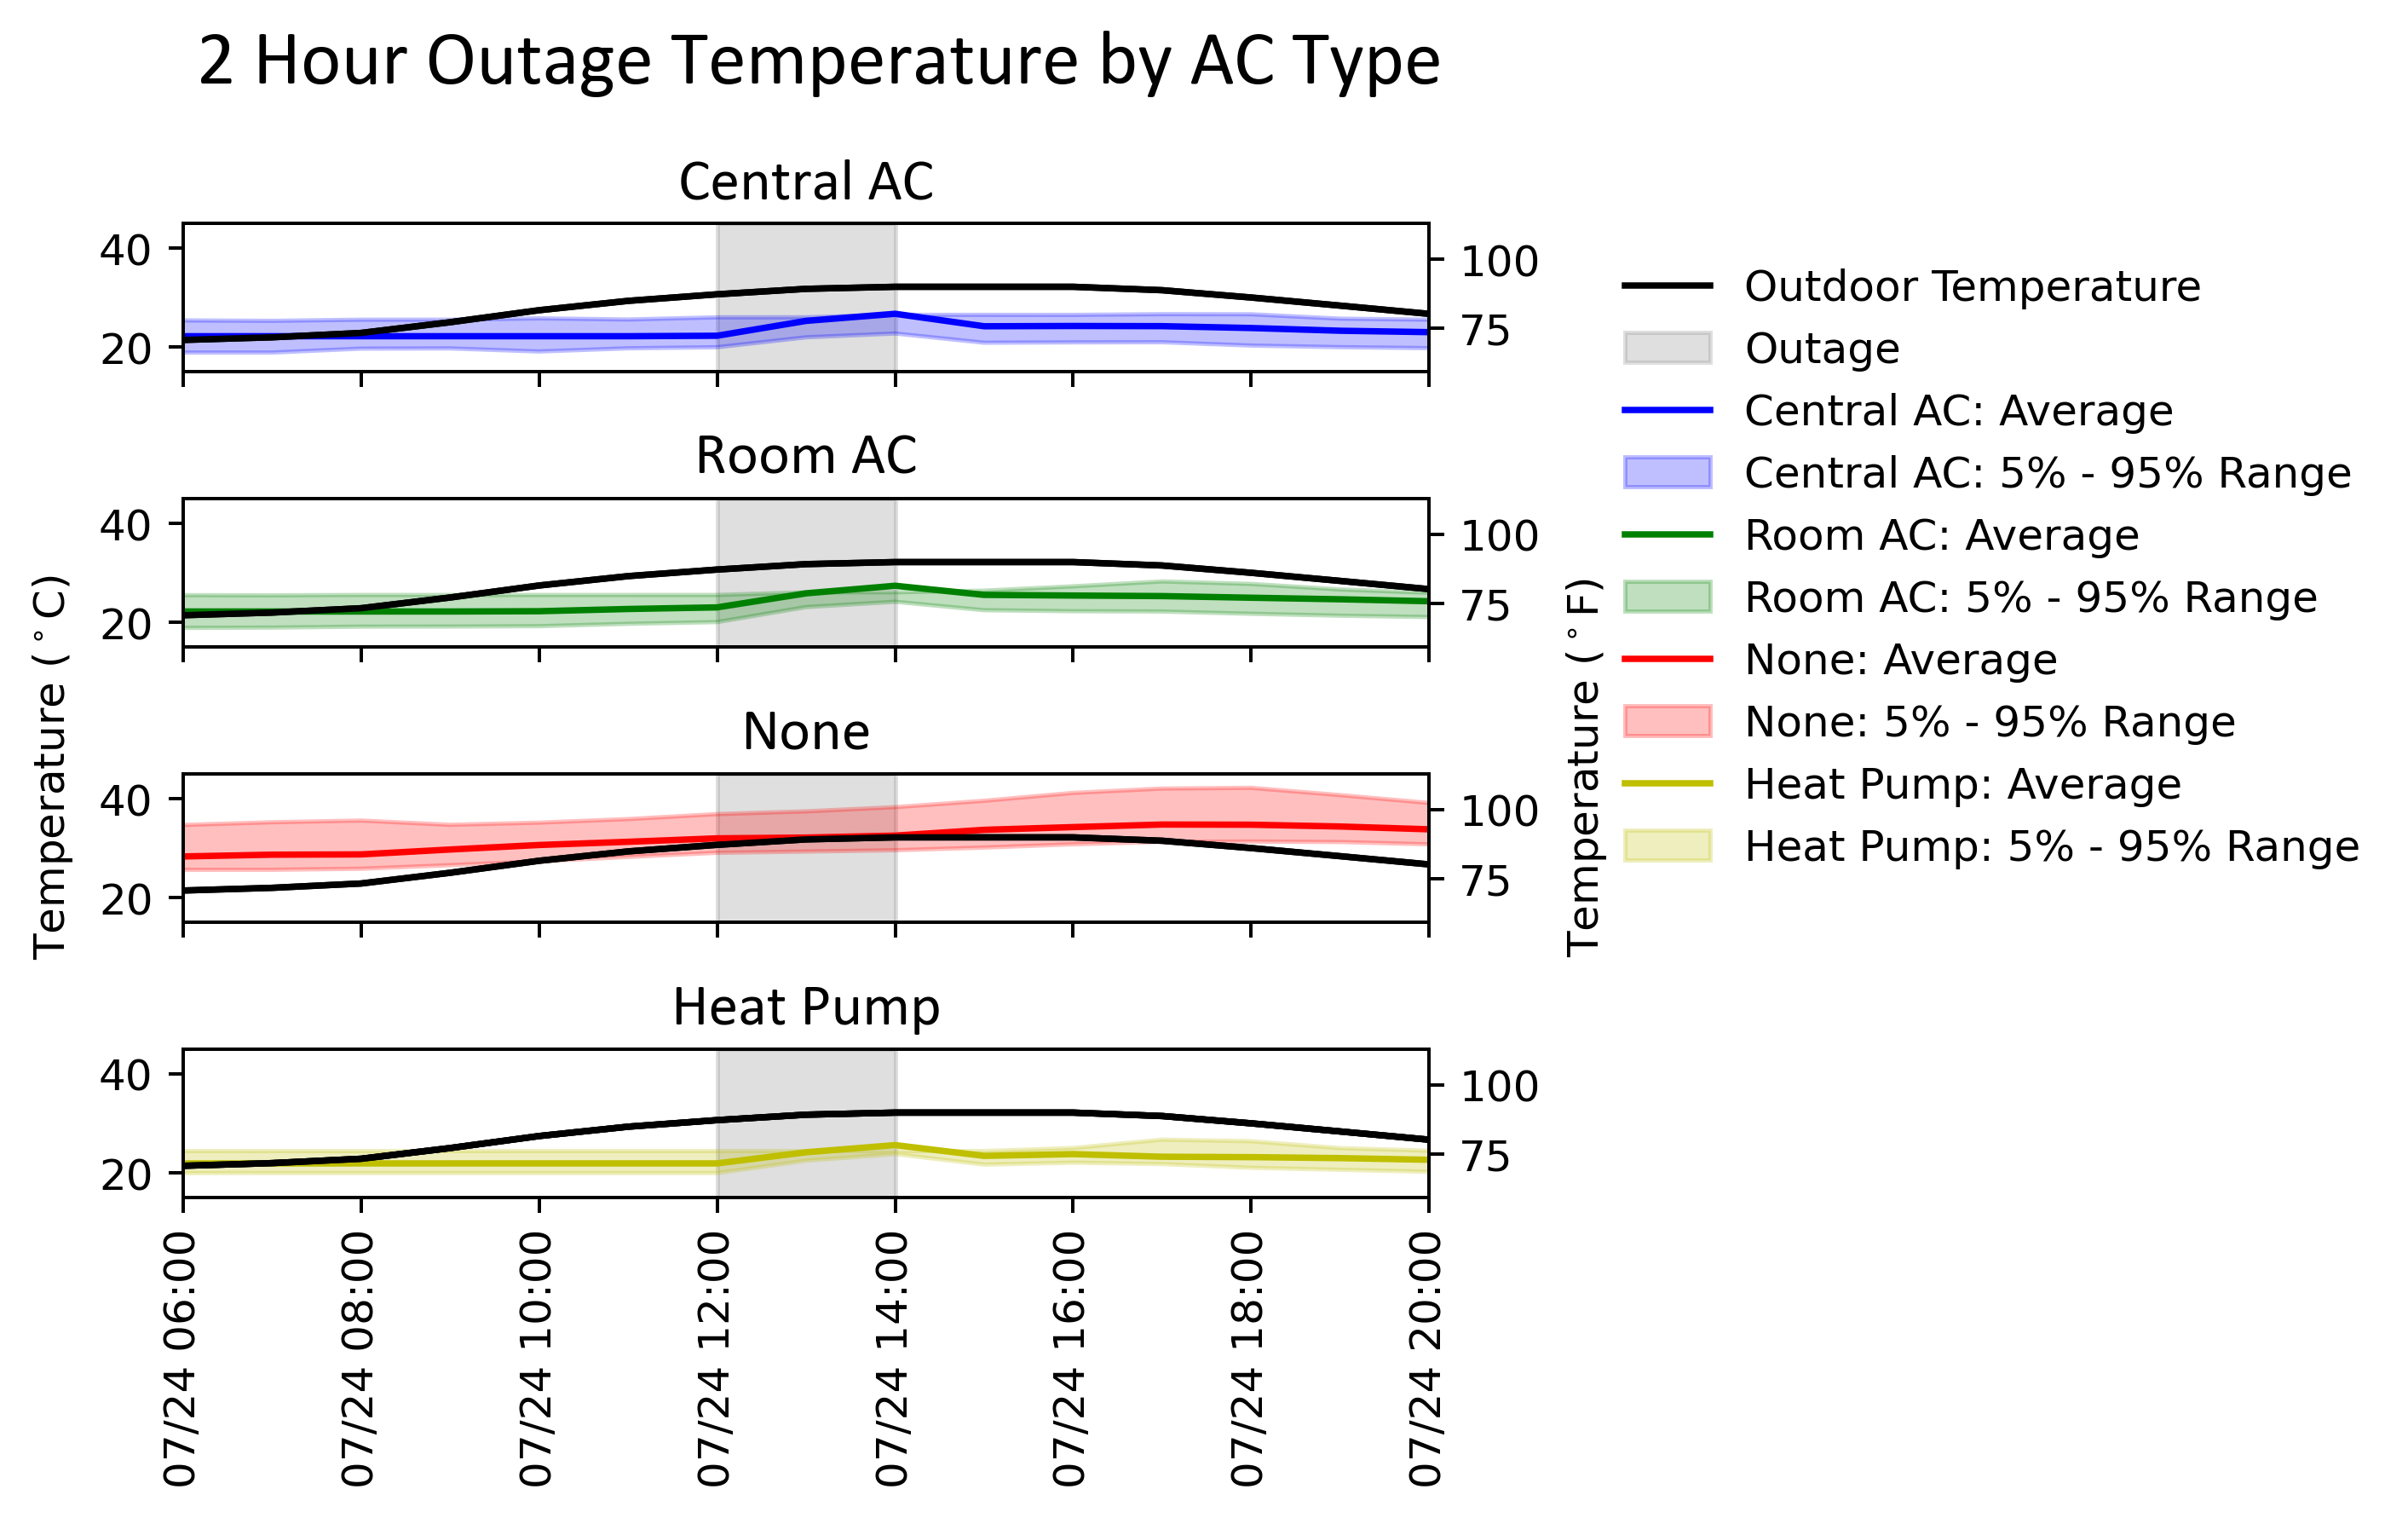

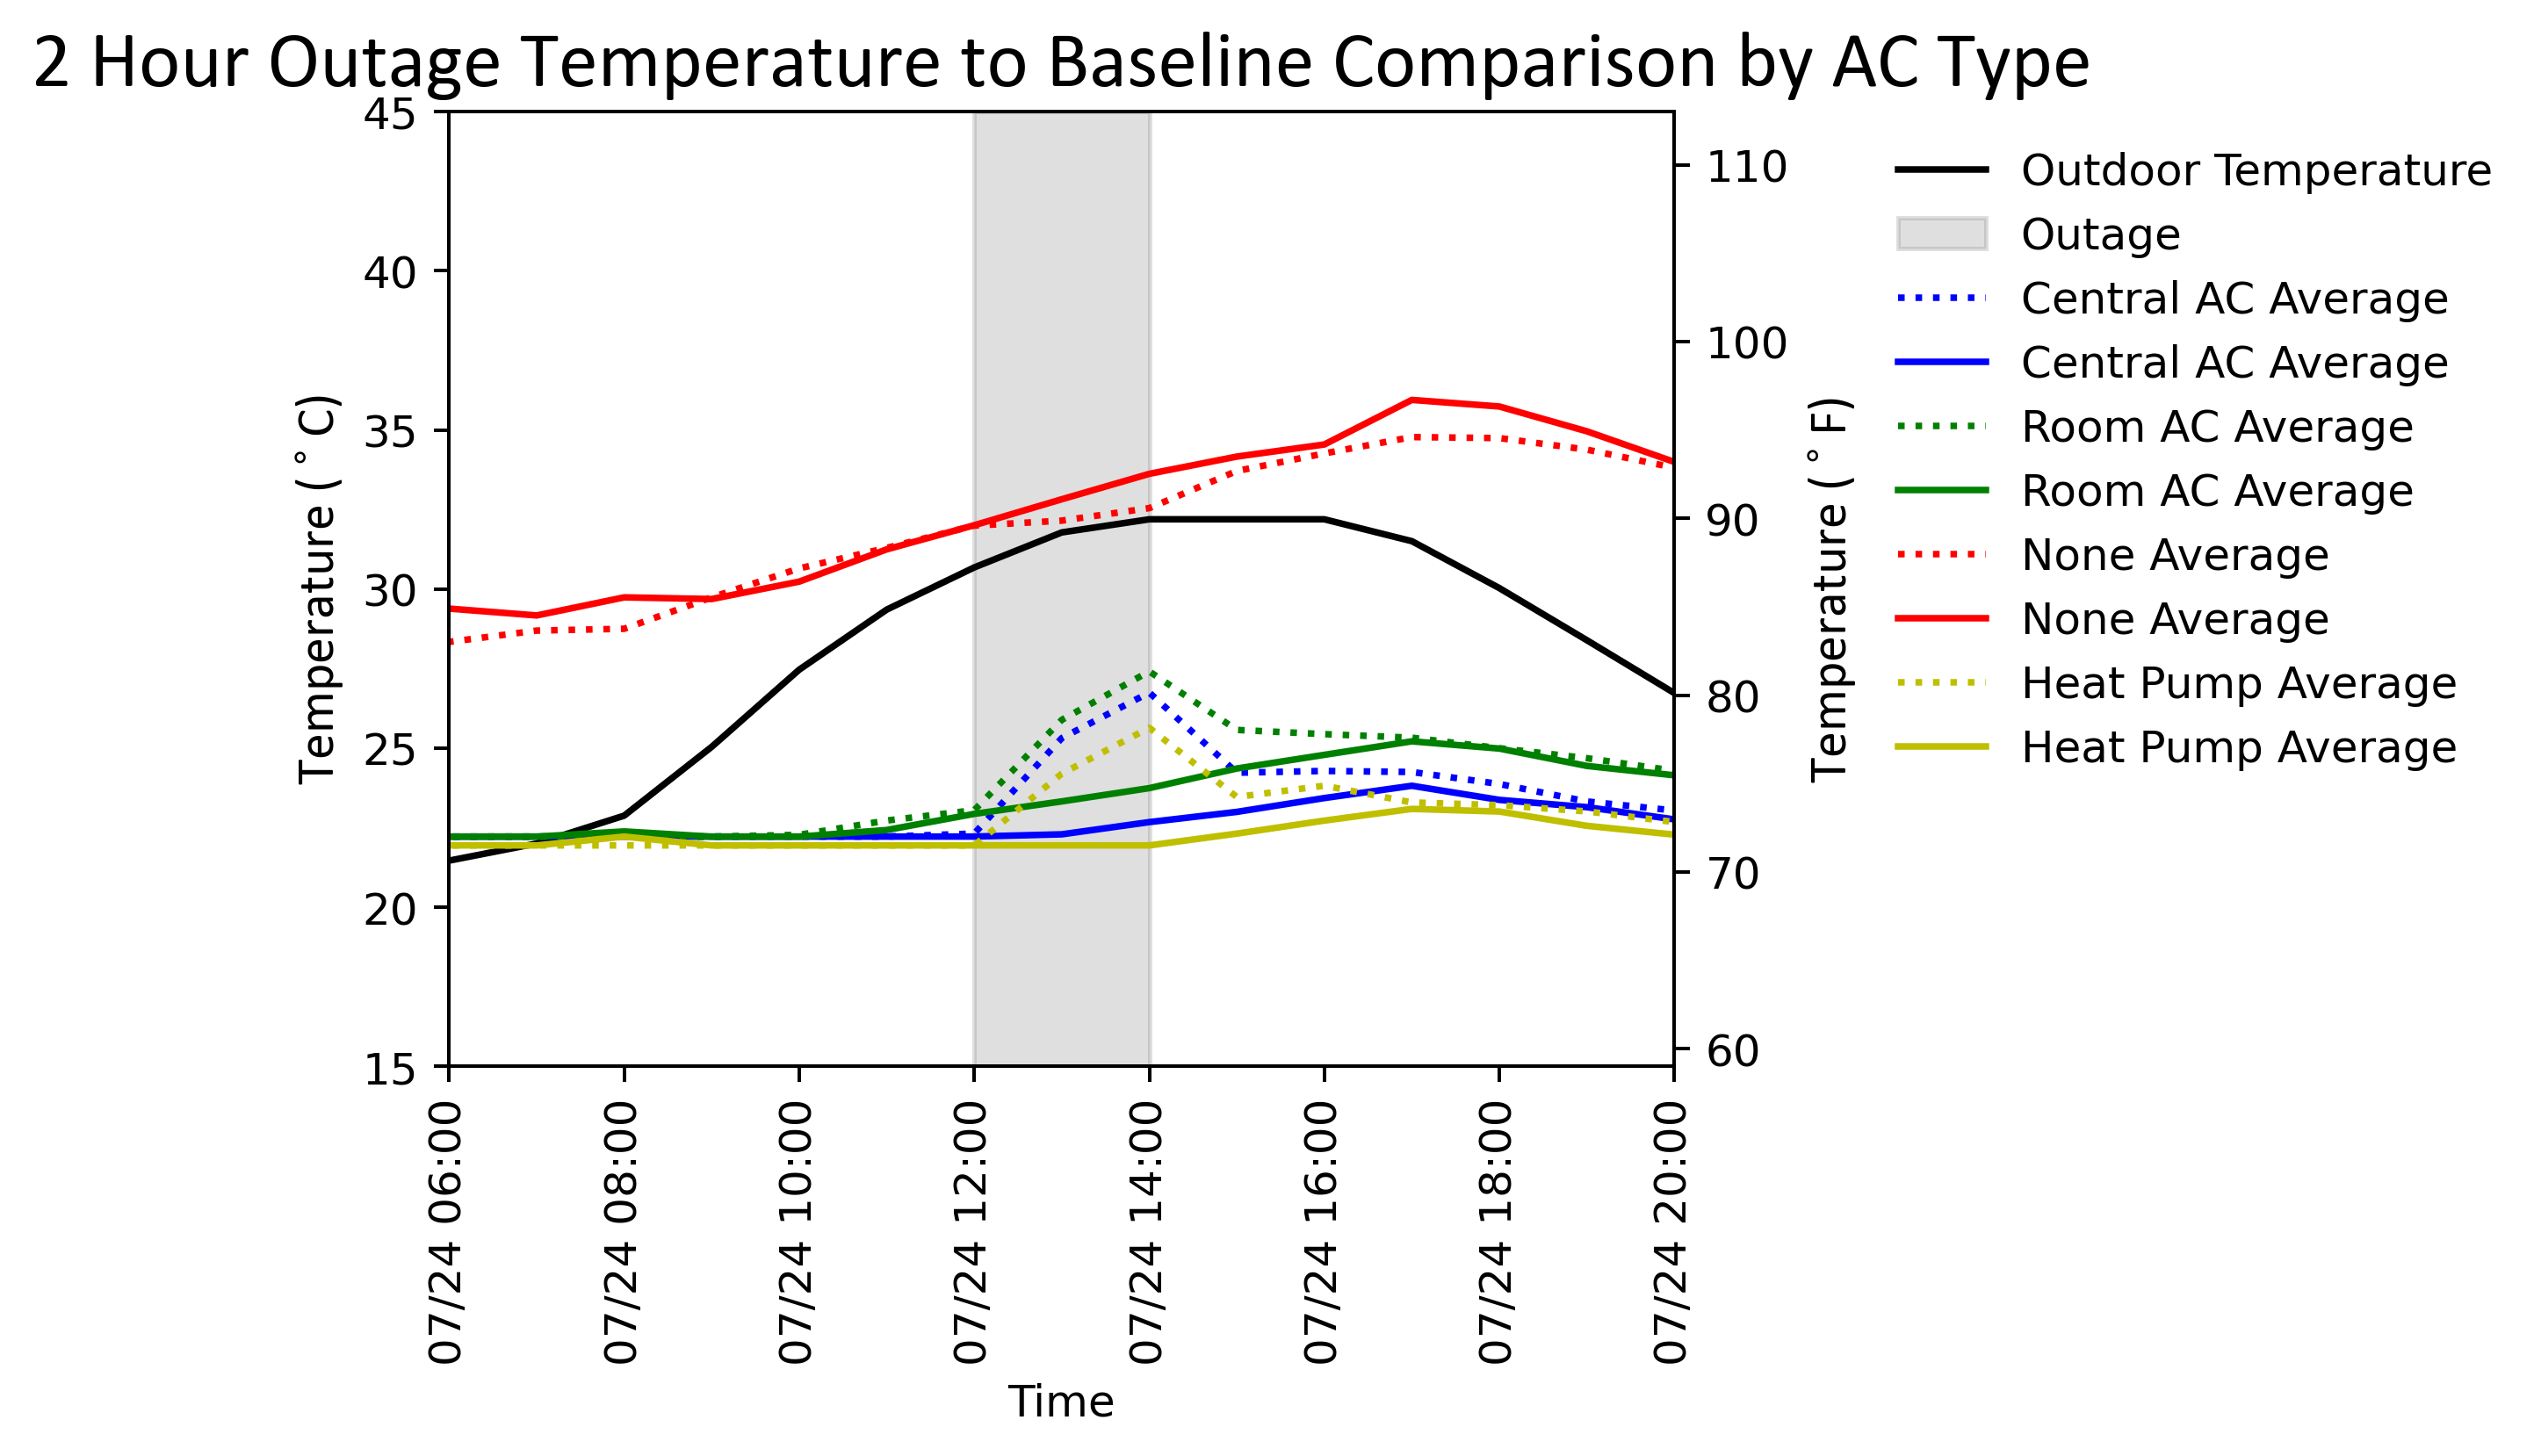

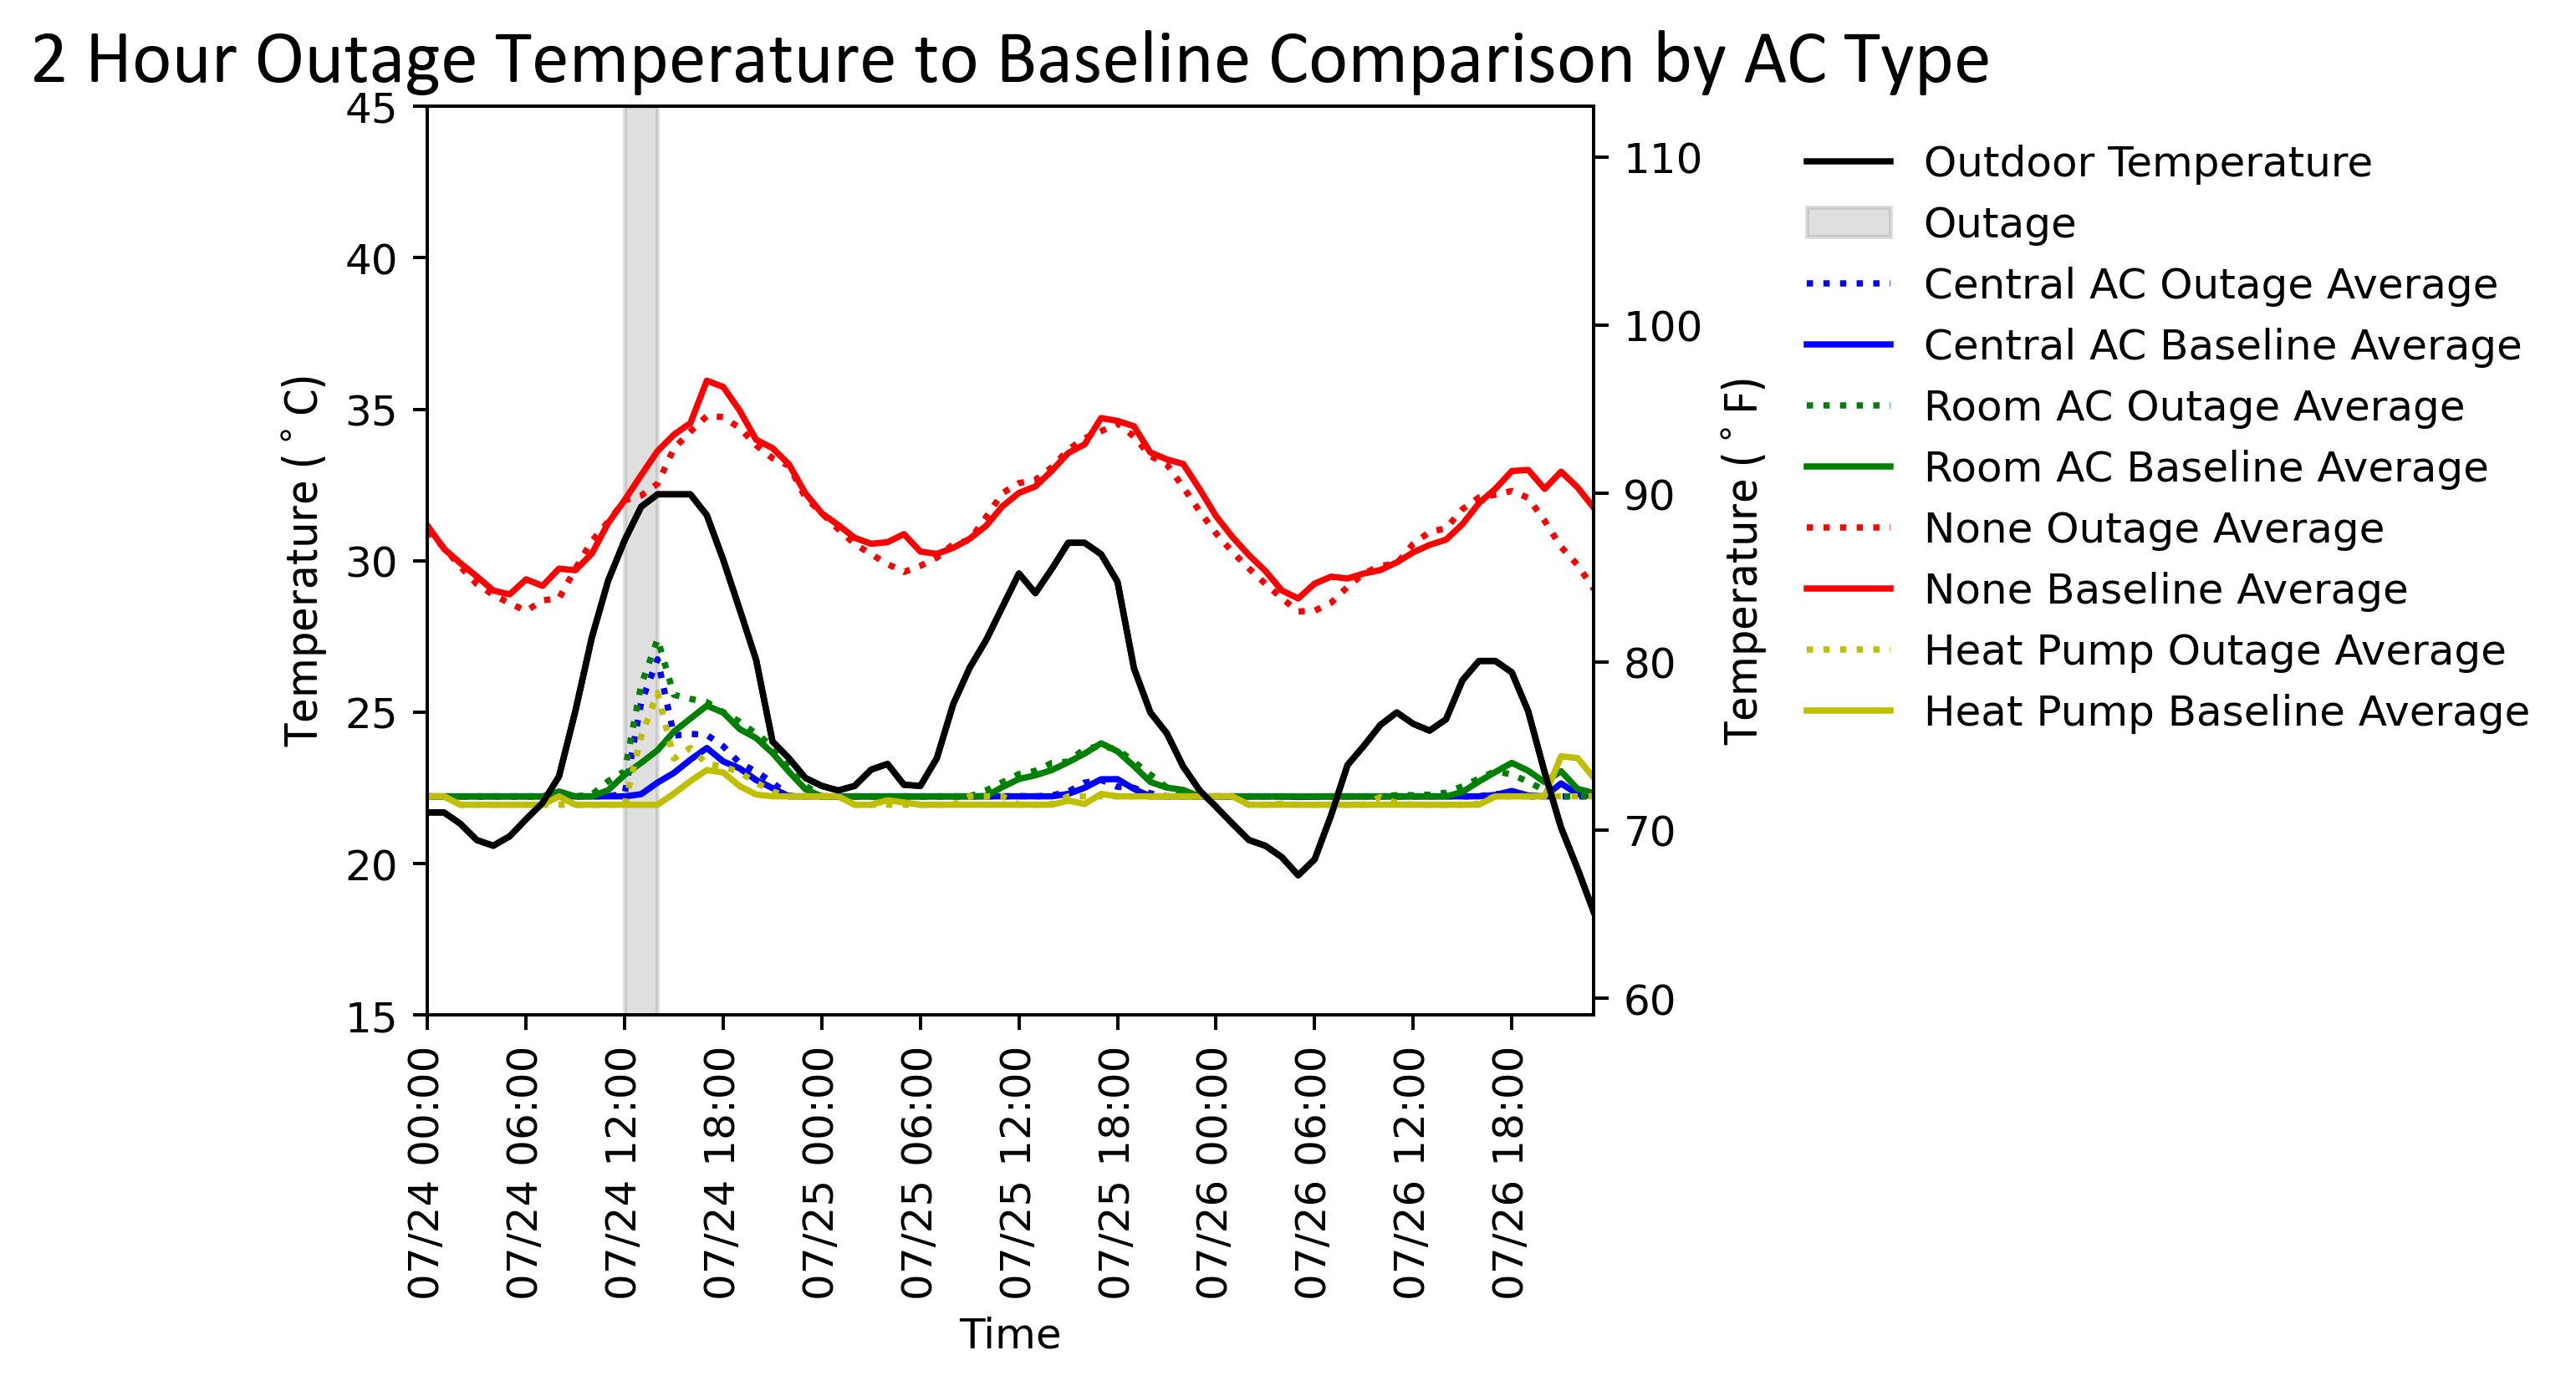

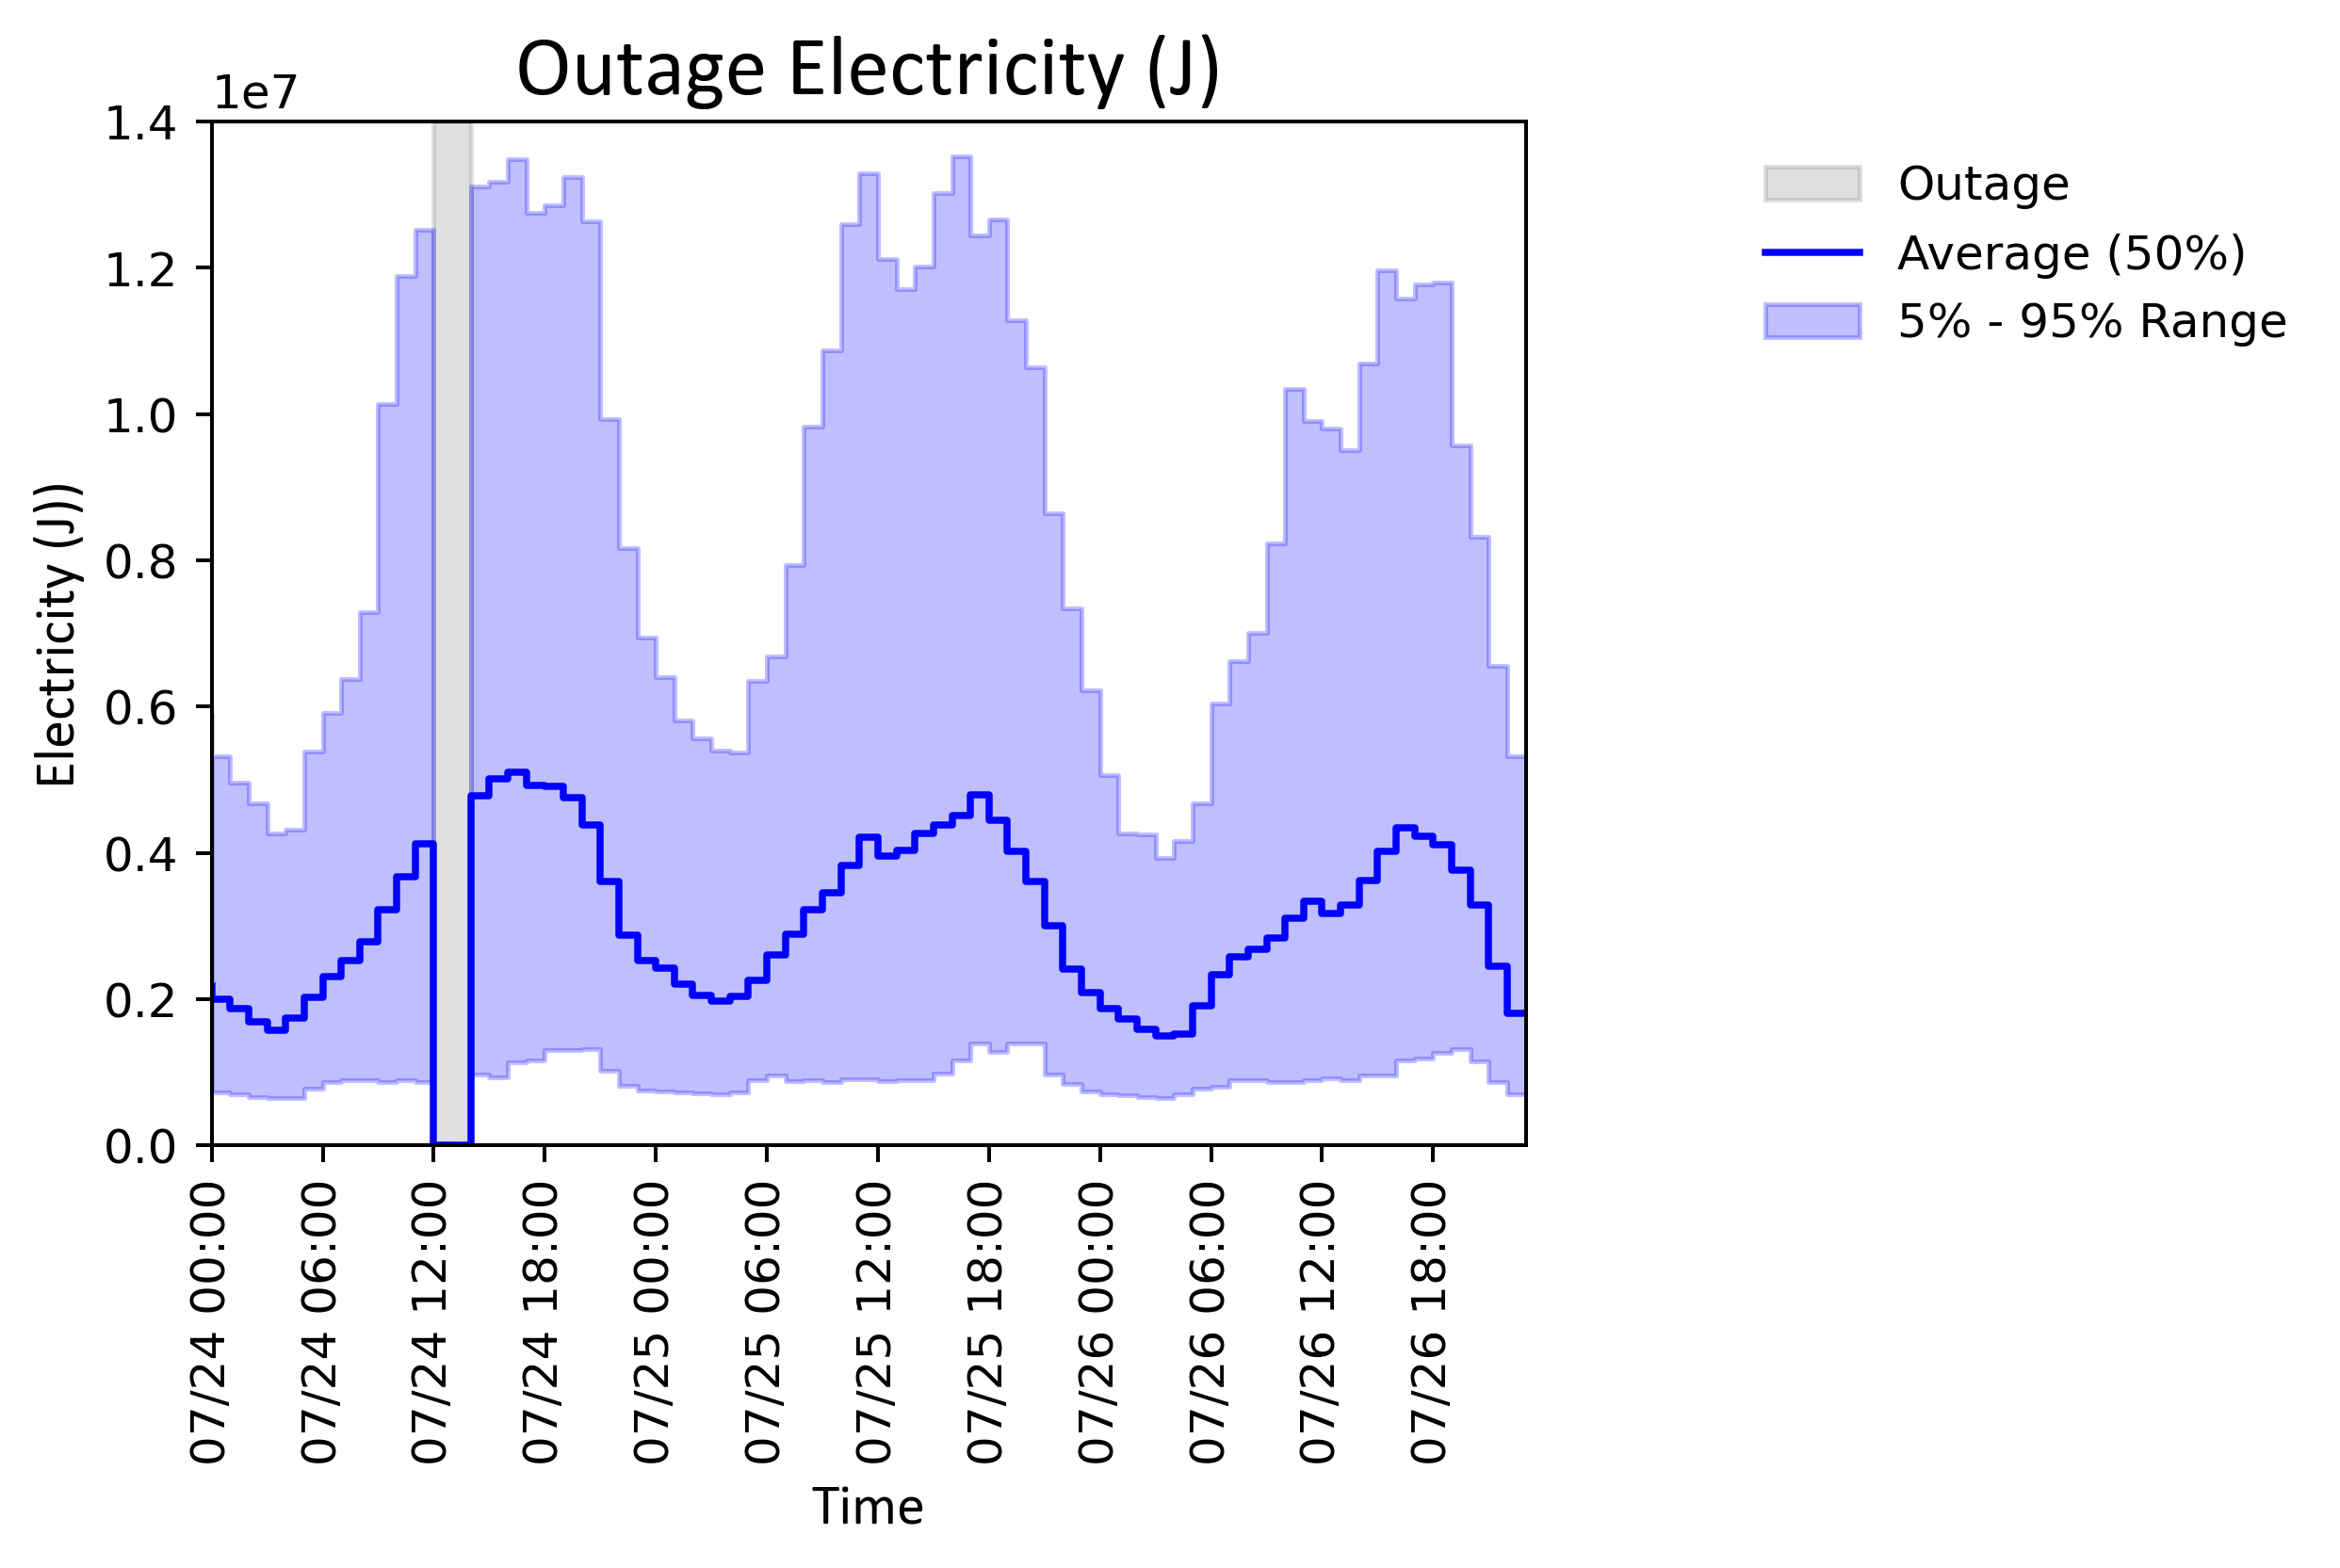

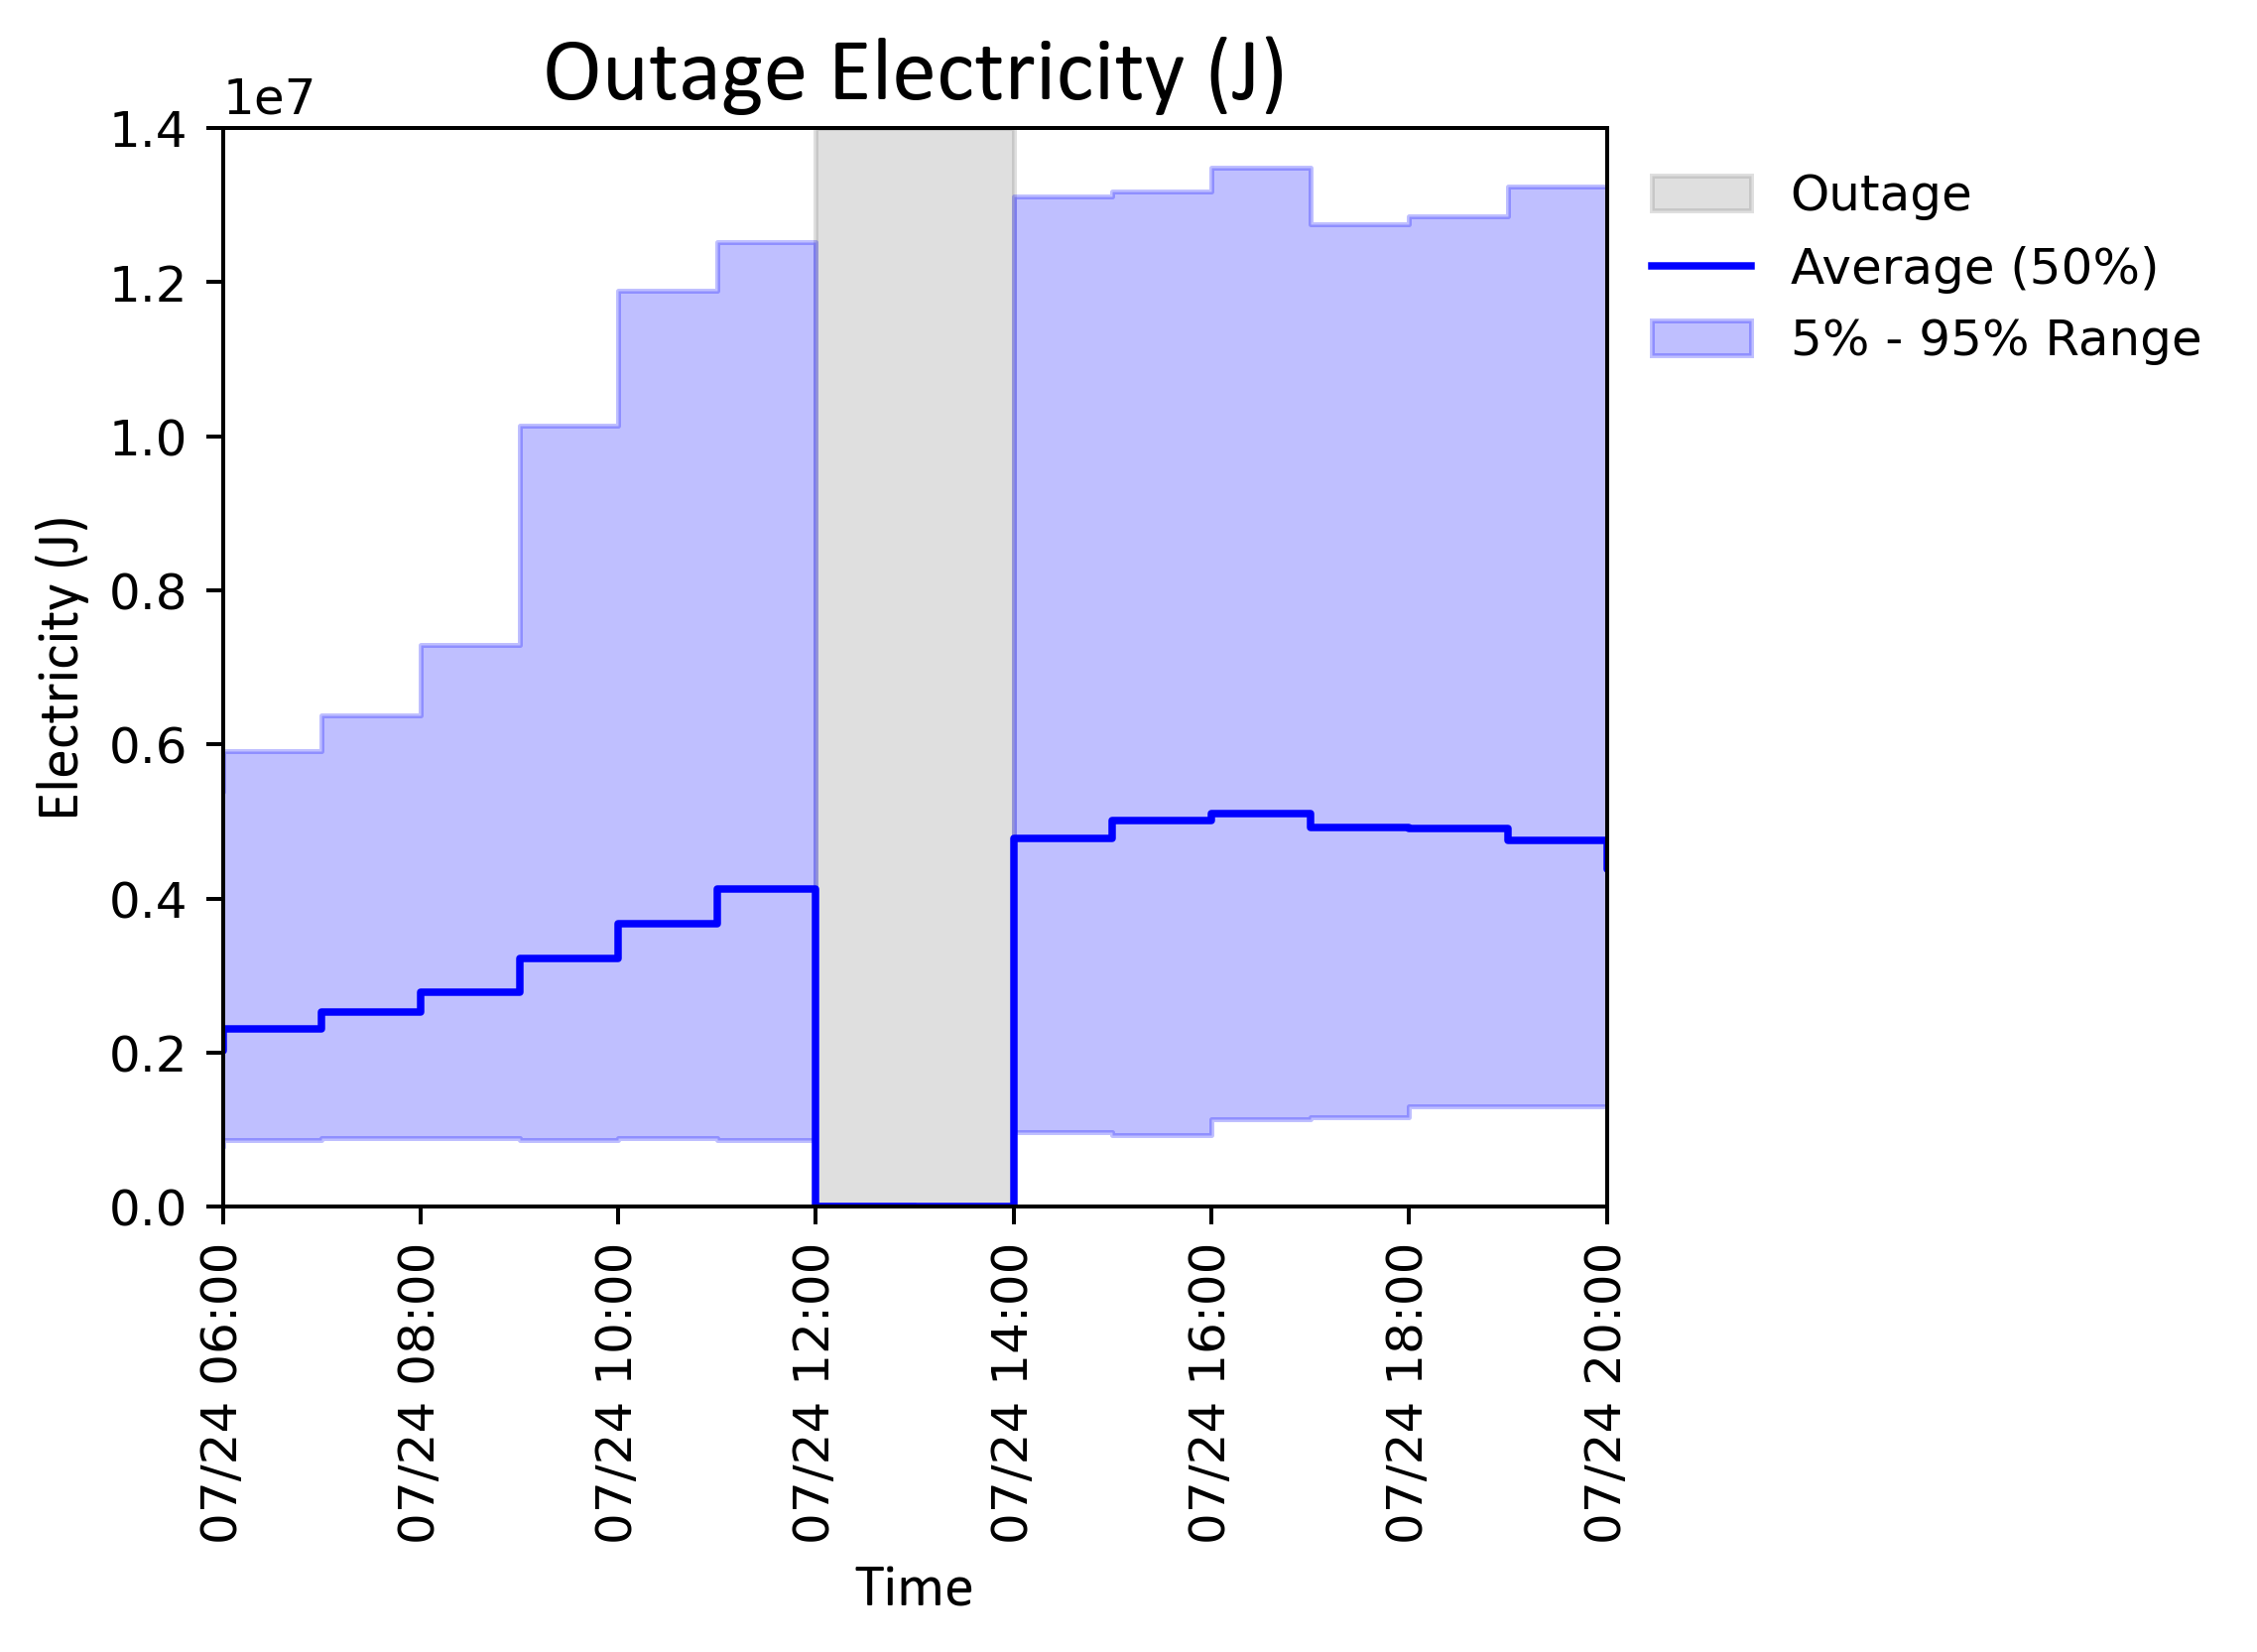

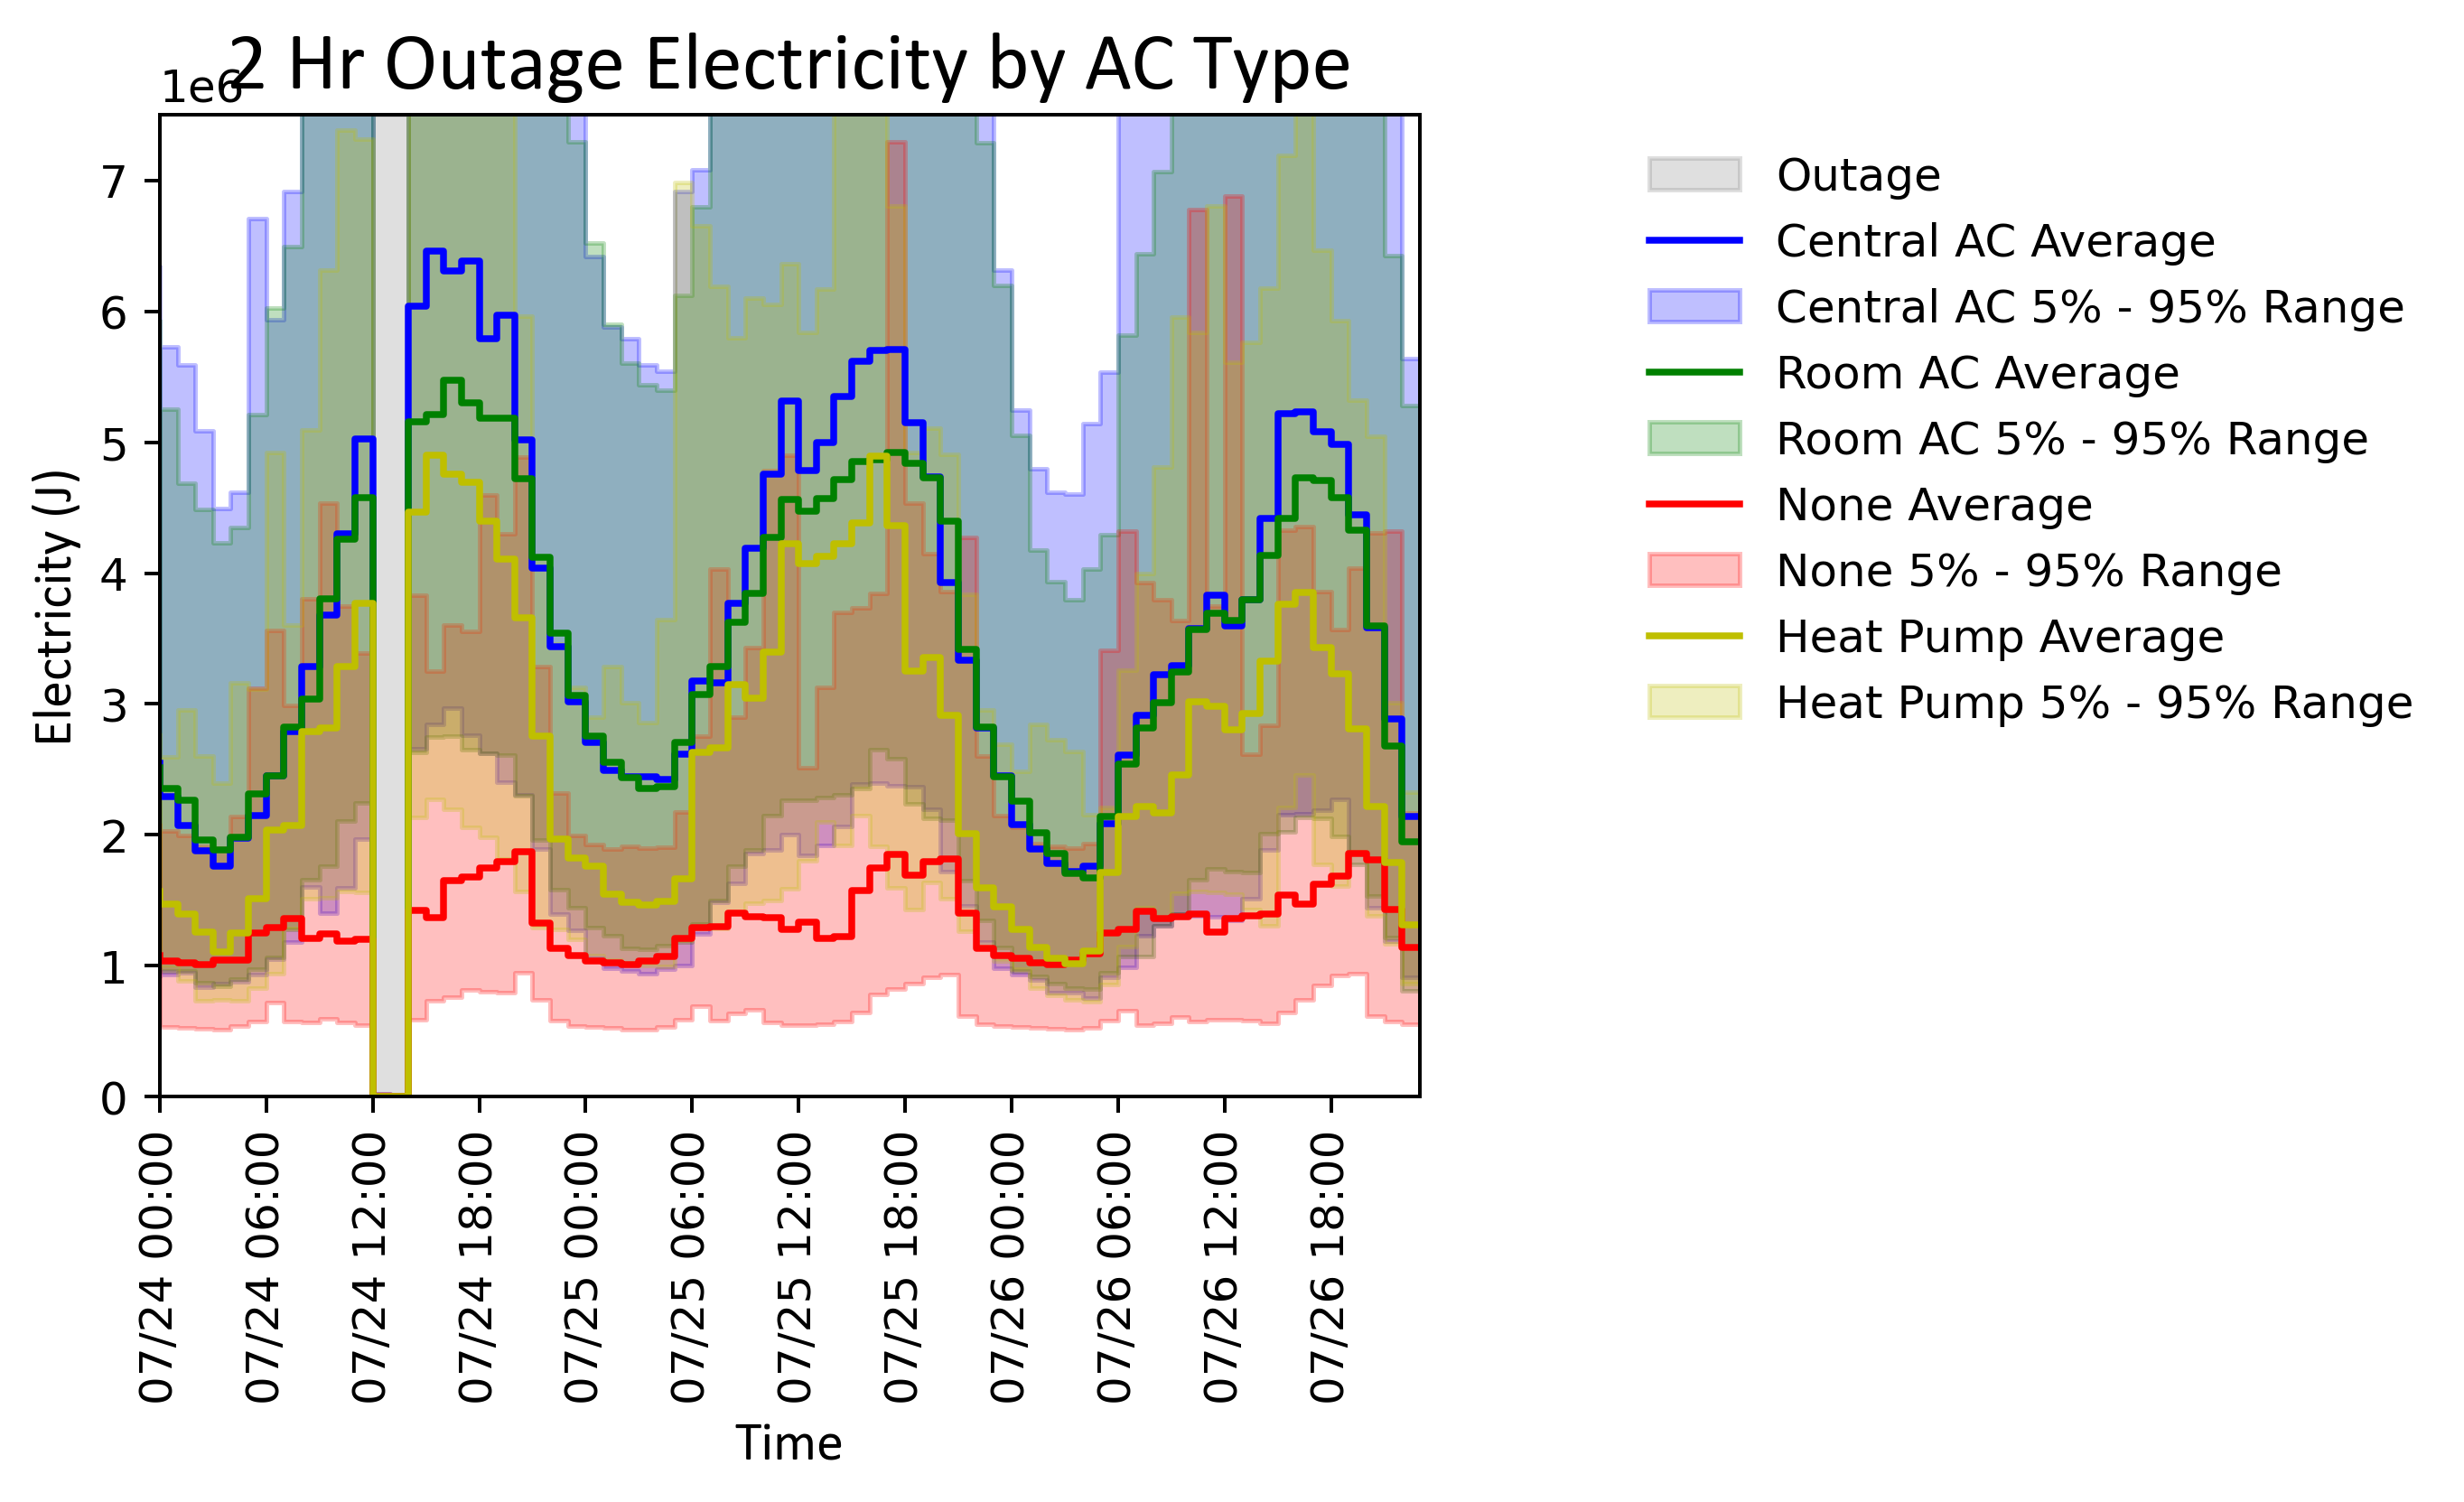

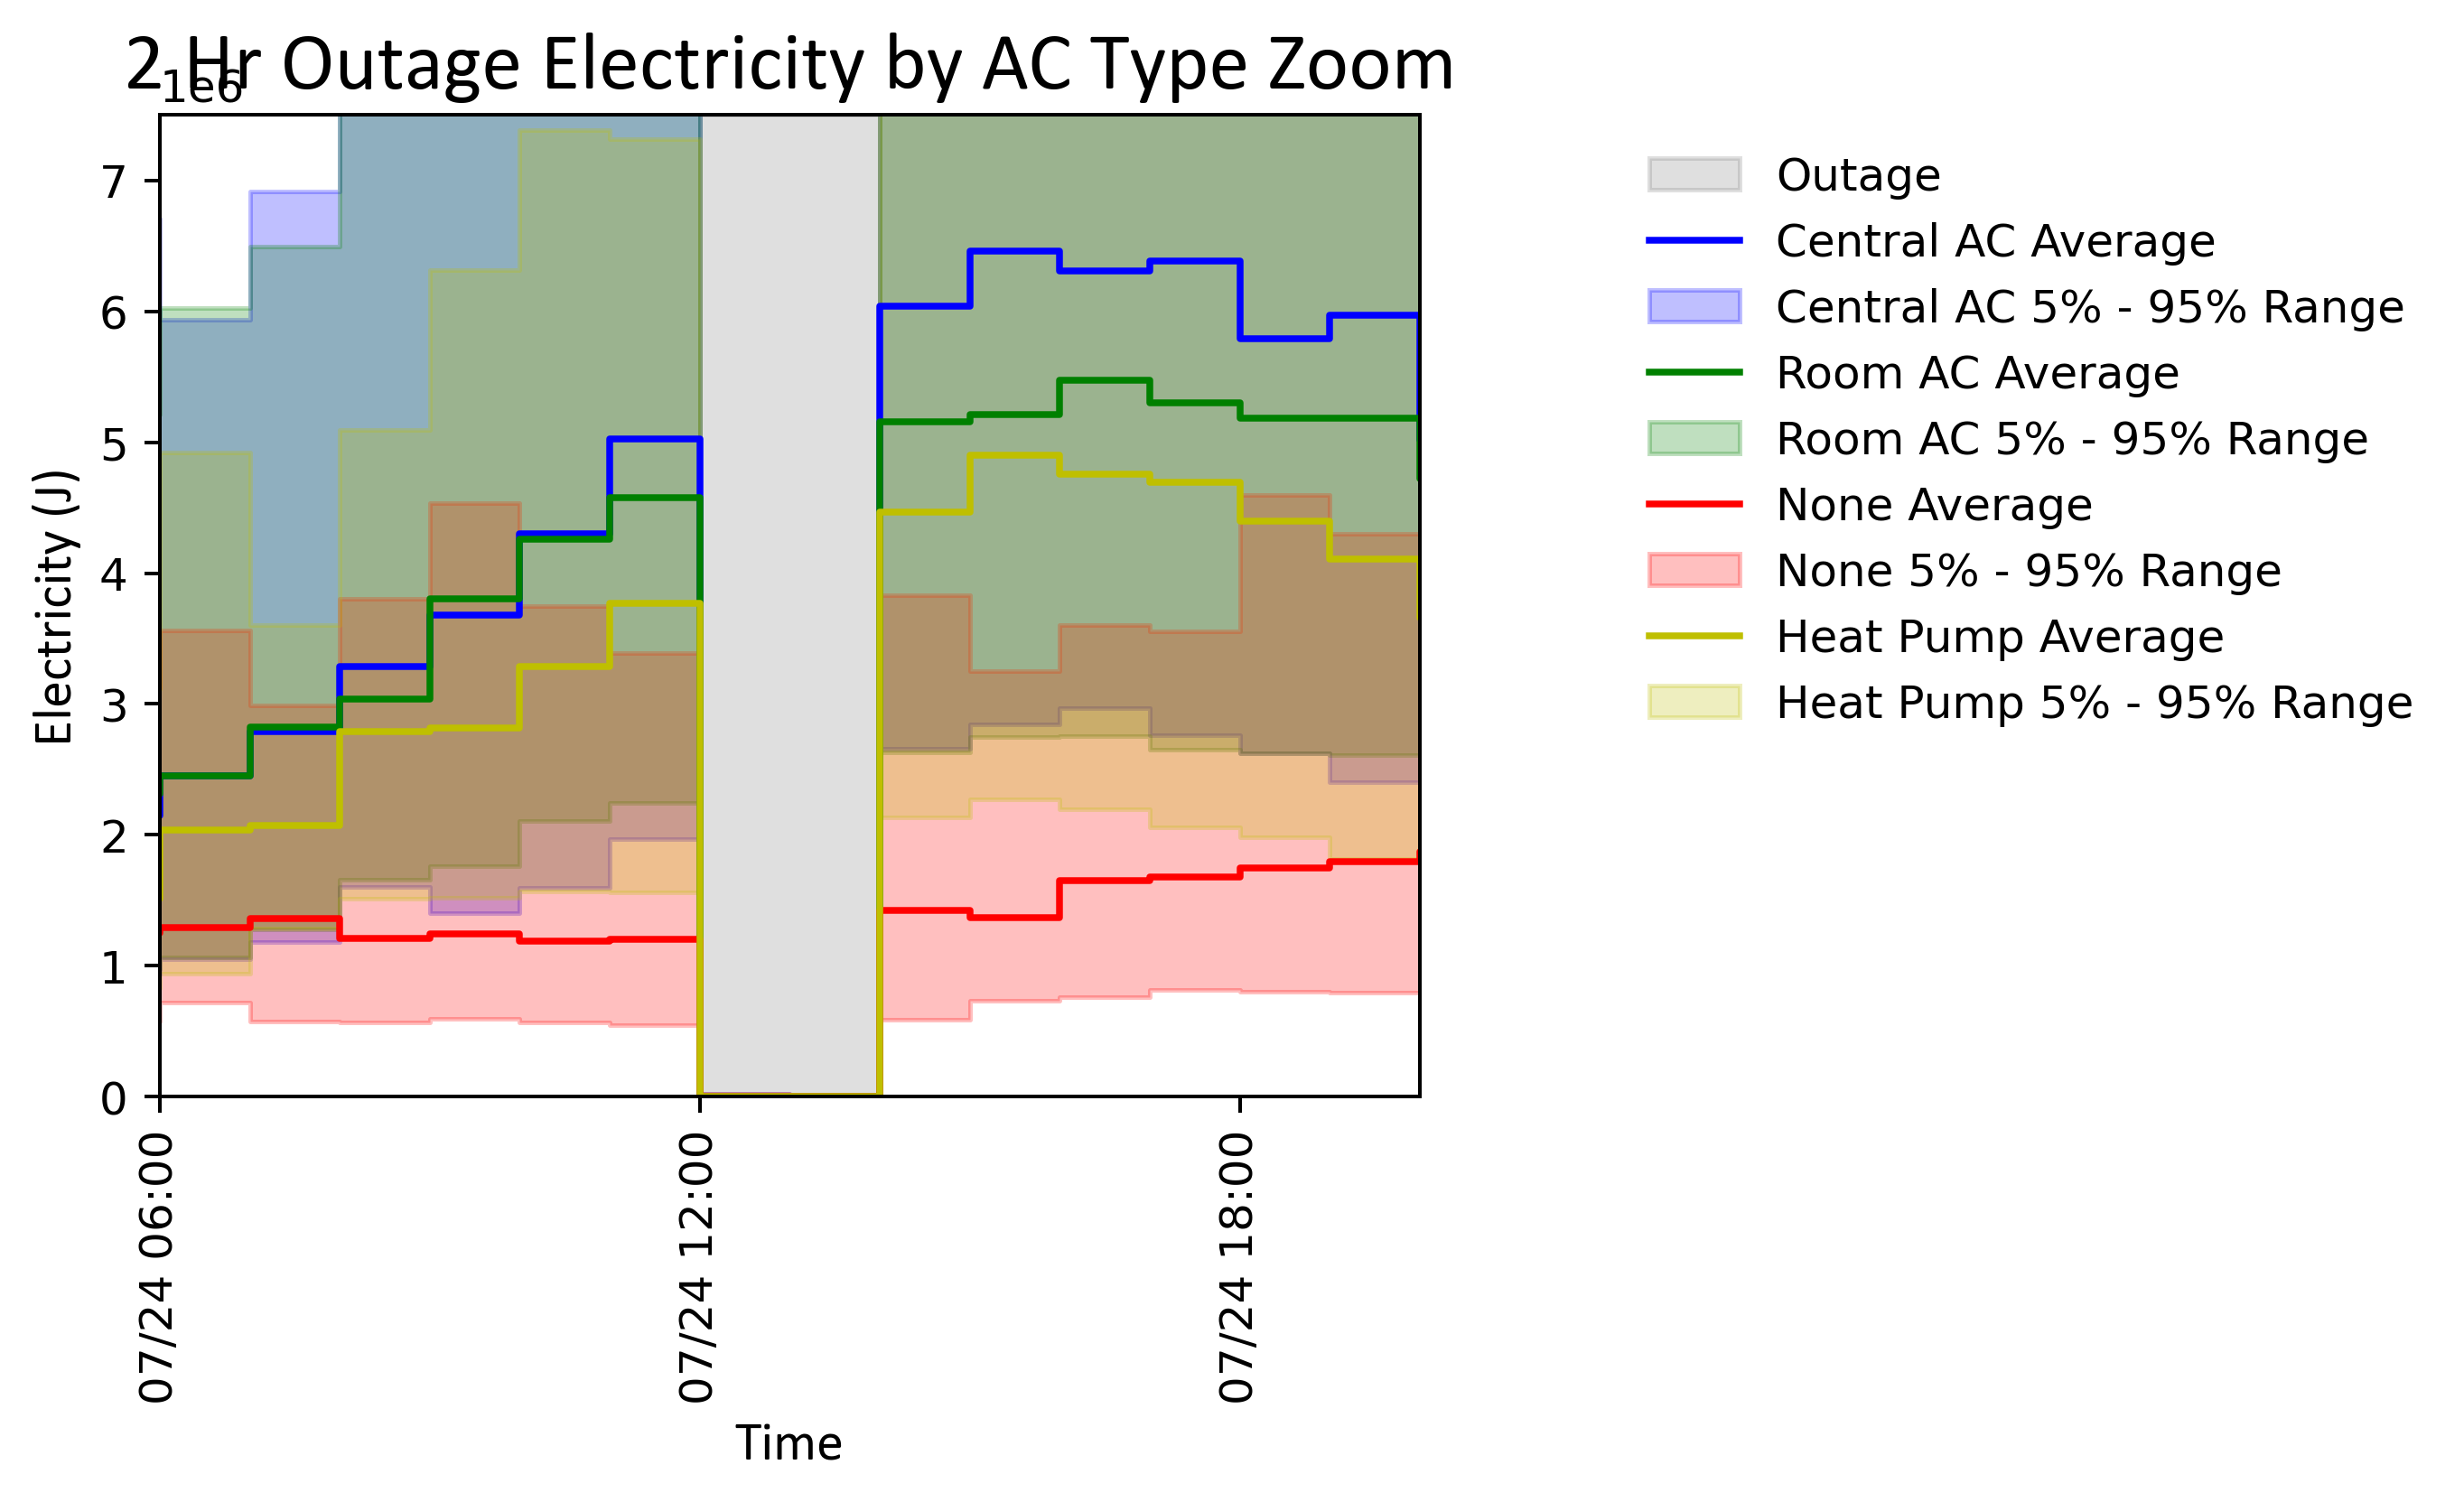

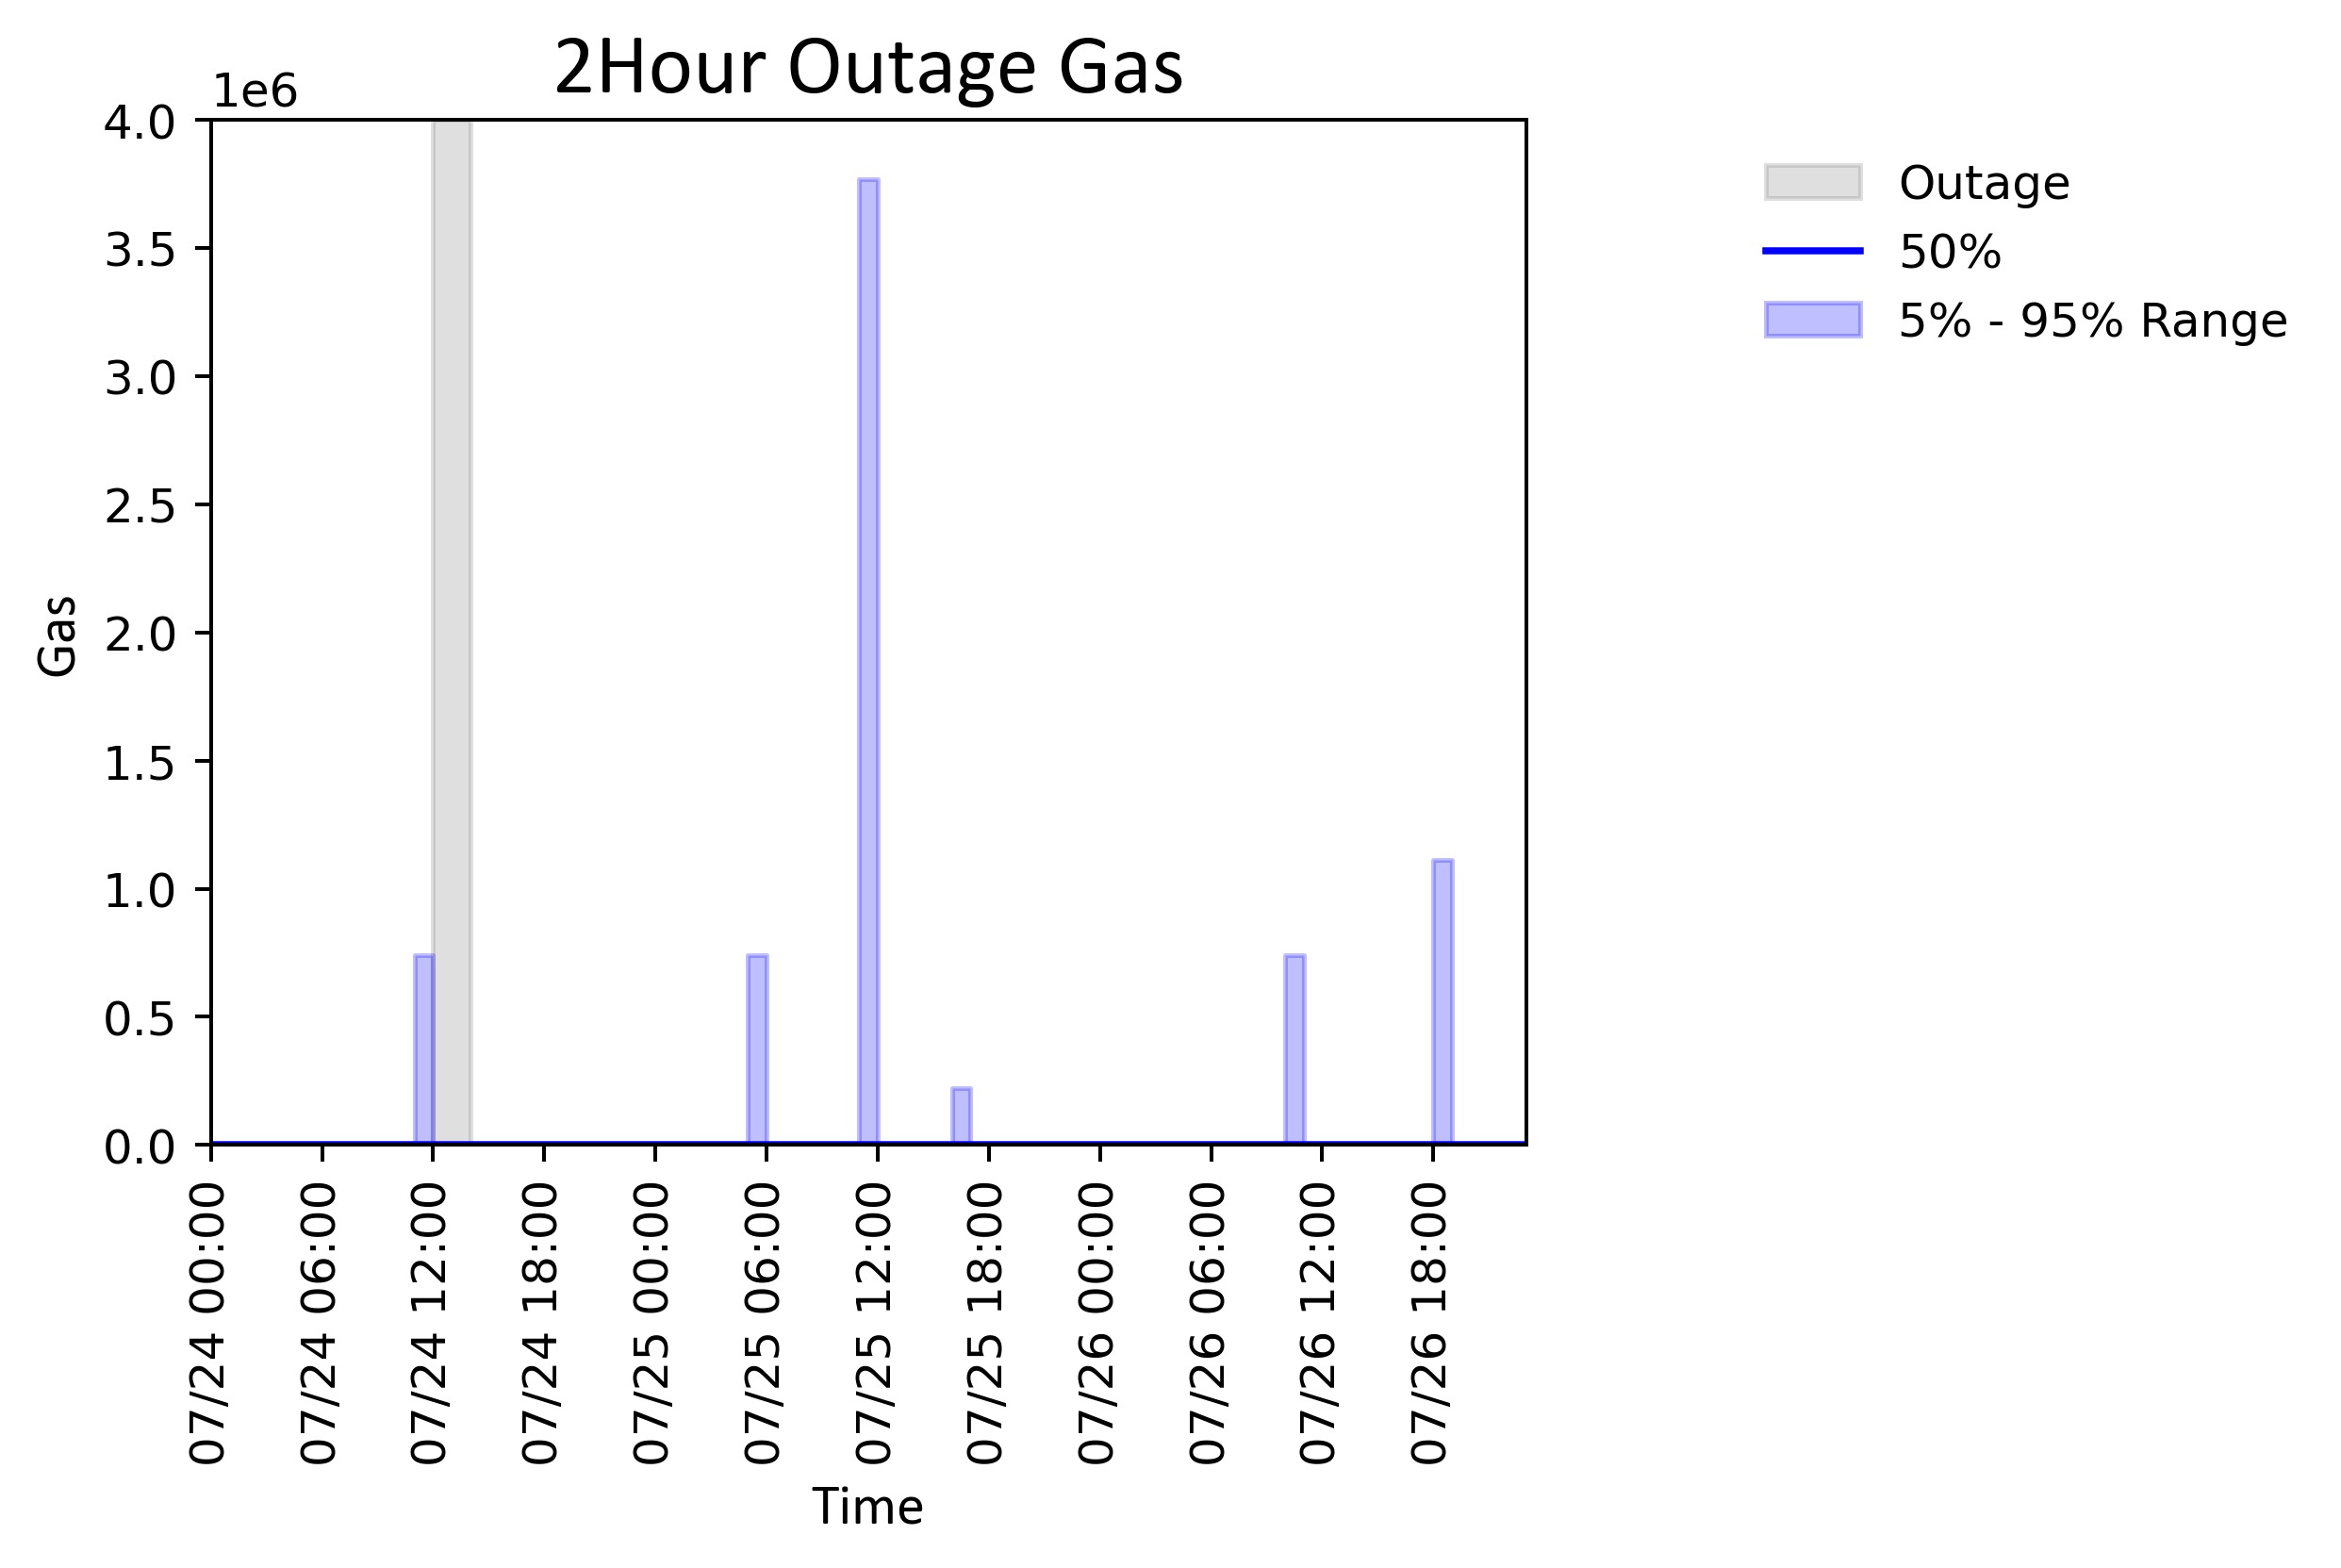

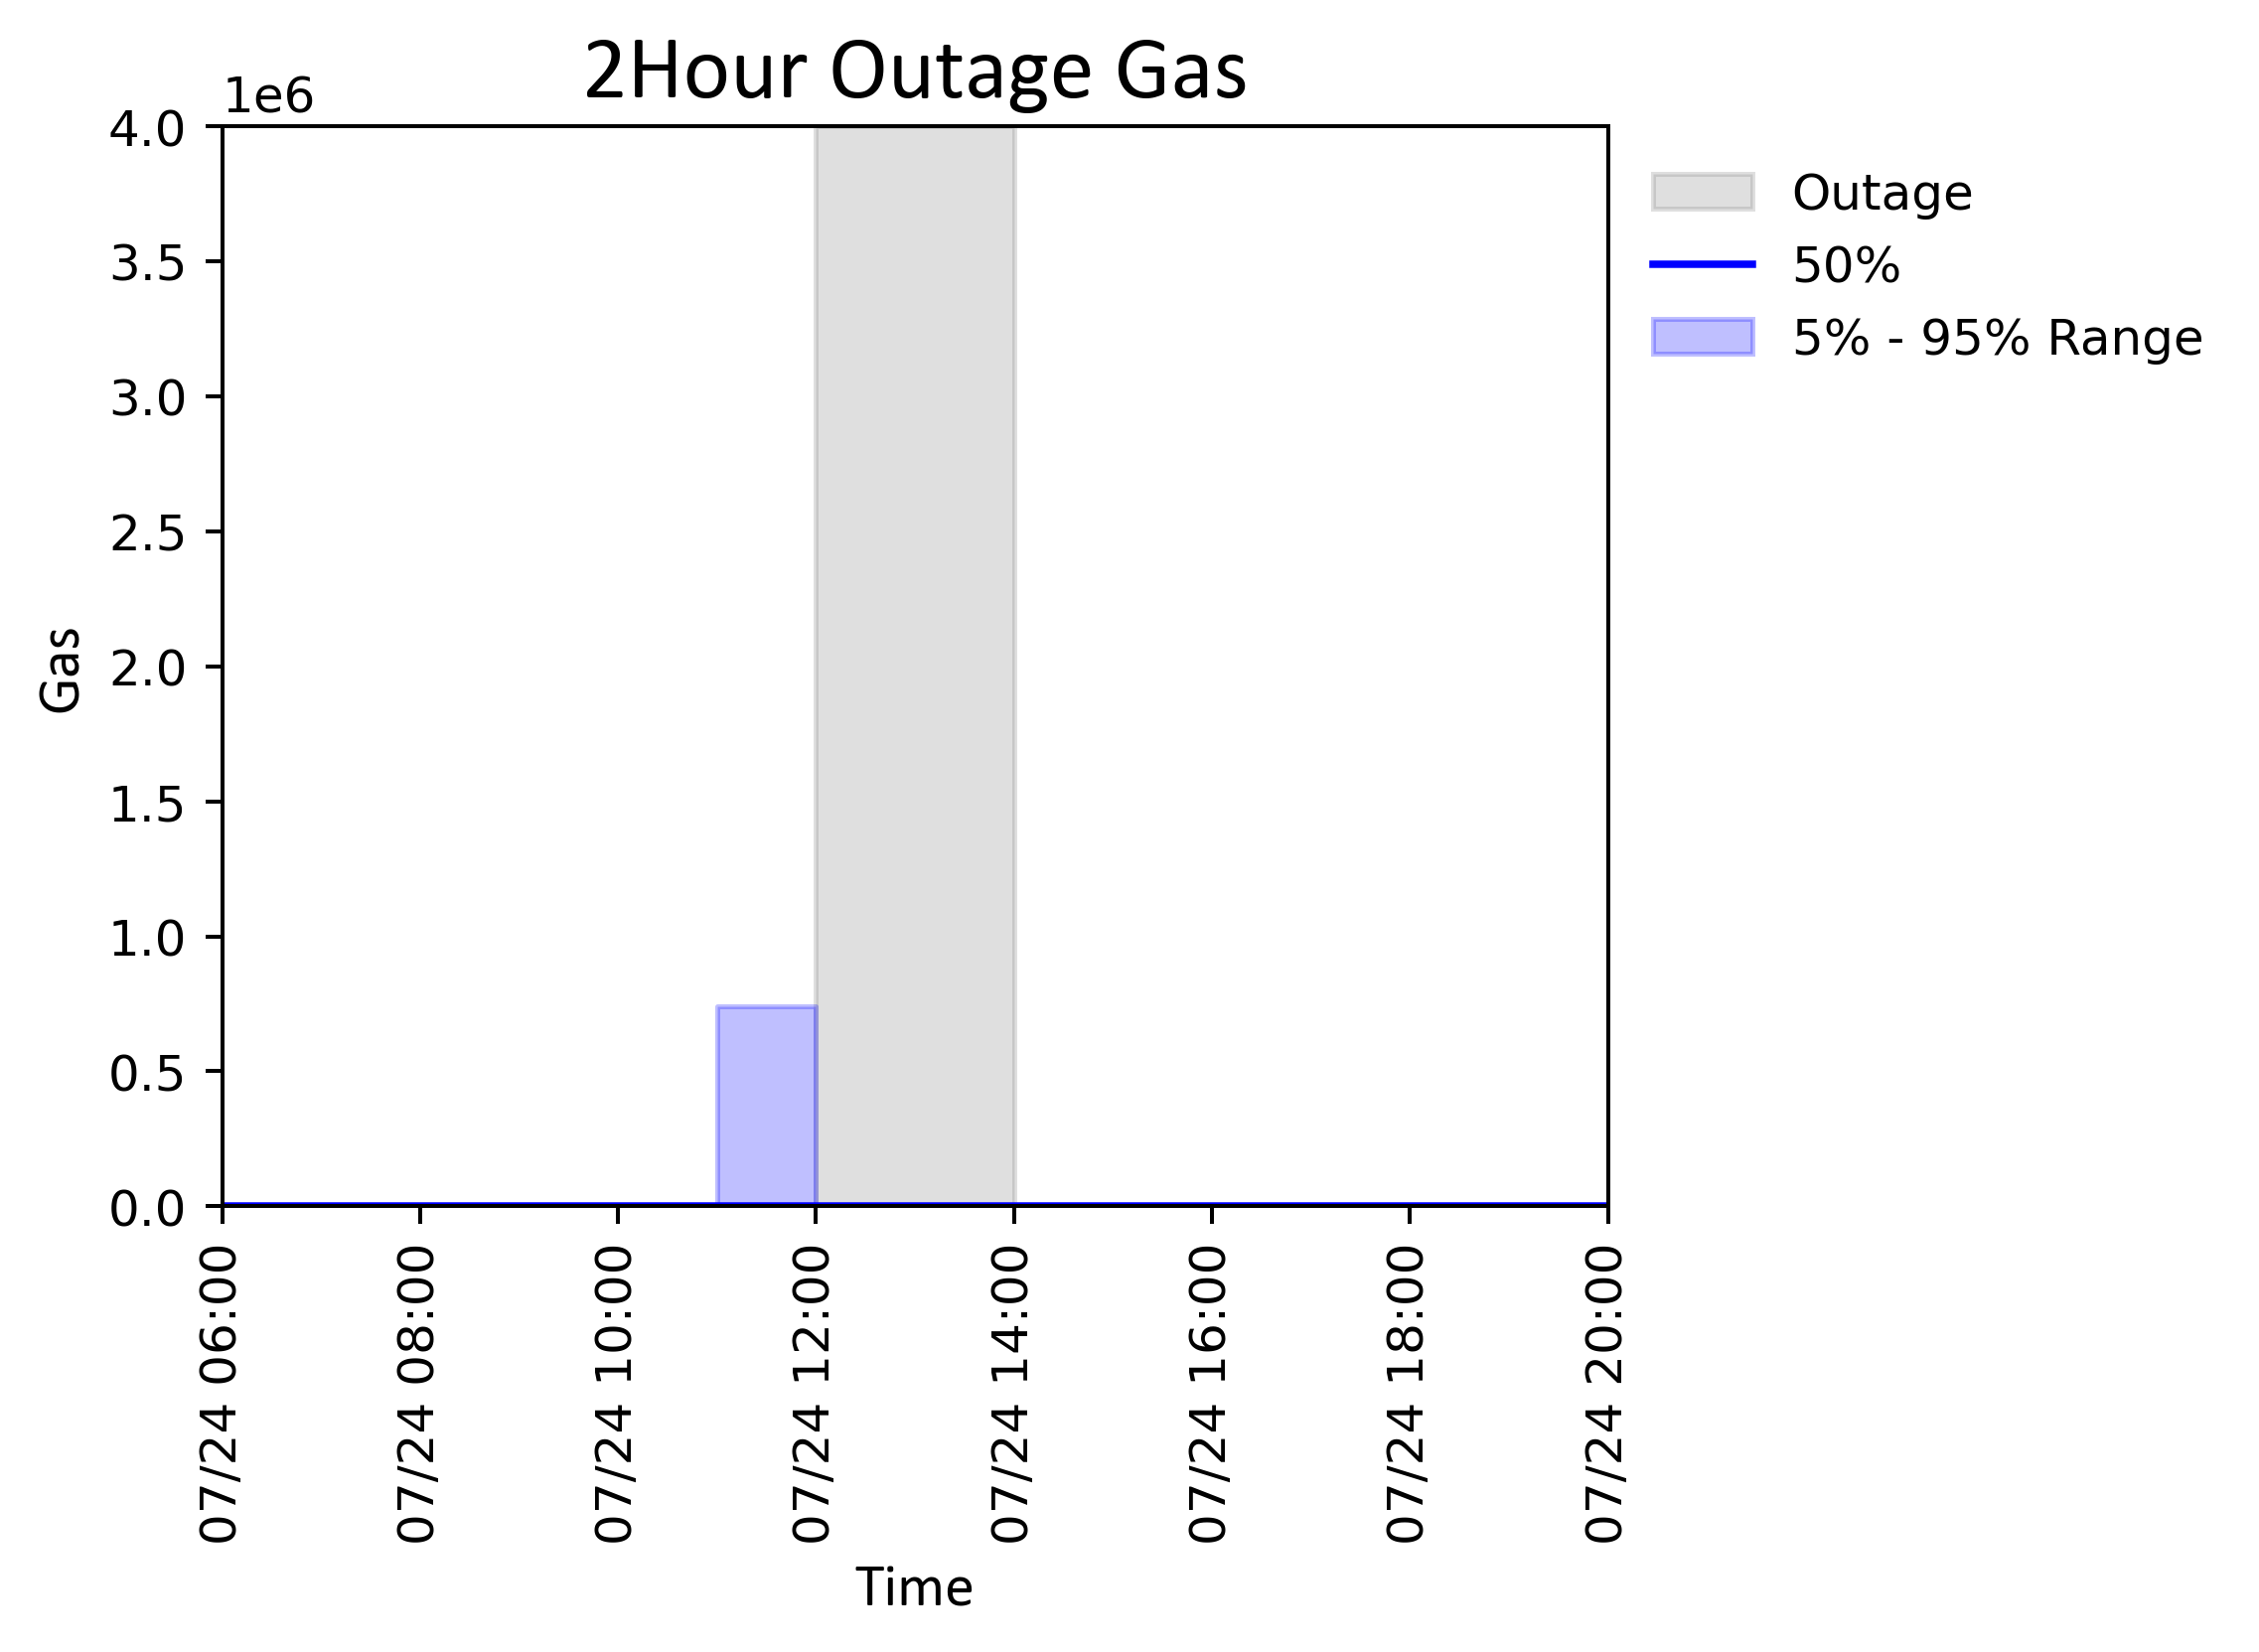

In [12]:
# Outage
# otg = '2'
for otg in otg_lengths[0]:
    outage_temperature = pd.read_csv(data_file_path + "/summary/outage_temperature_" + otg + "_hr.csv")
    outage_temperature['Date/Time'] = pd.to_datetime(outage_temperature['Date/Time'])
    outage_electricity = pd.read_csv(data_file_path + "/summary/outage_electricity_" + otg + "_hr.csv")
    outage_electricity['Date/Time'] = pd.to_datetime(outage_electricity['Date/Time'])
    outage_gas = pd.read_csv(data_file_path + "/summary/outage_gas_" + otg + "_hr.csv")
    outage_gas['Date/Time'] = pd.to_datetime(outage_gas['Date/Time'])

    window_start = otg_start - pd.Timedelta(6,"H")
    otg_end = otg_start + pd.Timedelta(int(otg),"H")
    window_end = otg_end + pd.Timedelta(6,"H")

    
    outage_summary = pd.DataFrame()
    outage_summary['Date/Time'] = outage_temperature['Date/Time']
    scale = 2
    f5,ax5=plt.subplots(figsize=(5,4),dpi=360)
    ax5.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
    ax5.fill_between([otg_start, otg_end],[y_max_t,y_max_t],alpha=.25,color='grey',label= "Outage")
    outage_summary['T - 5%'] = outage_temperature.quantile(q=.05,axis=1)
    outage_summary['T - 50%'] =outage_temperature.quantile(q=.5,axis=1)
    outage_summary['T - 95%'] = outage_temperature.quantile(q=.95,axis=1)
    ax5.plot(outage_summary['Date/Time'],outage_summary['T - 50%'],color = 'b',label= str("Average"))
    ax5.fill_between(outage_summary['Date/Time'], outage_summary['T - 5%'], outage_summary['T - 95%'],alpha=.25,color='b',label= str("5% - 95% Range"))
    x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='12H')
    x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
    ax5.set_xticks(x_ticks,x_tick_labels,rotation=90)
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
    ax5.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
    ax5.set_ylim((y_min_t,y_max_t))
    ax5b = ax5.twinx()
    ax5b.plot(outage_summary['Date/Time'],32+(9/5)*outage_summary['T - 50%'],color = 'b',label= str("Average"))
    ax5b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
    ax5b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
    ax5.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
    ax5.set_title(otg + ' Hour Outage Indoor Temperature',fontsize=titlesize,**labelfont)
    f5.savefig(data_file_path + "/figures/"+ otg + "HrOutageTemp.svg",bbox_inches = "tight")
    
    f5,ax5=plt.subplots(figsize=(5,4),dpi=360)
    ax5.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
    ax5.fill_between([otg_start, otg_end],[y_max_t,y_max_t],alpha=.25,color='grey',label= "Outage")

    for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
        cols = 'bldg' + metadata.loc[metadata['in.hvac_cooling_type']== hvac_type]['bldg_id'].astype(str)
        subset = pd.DataFrame(outage_temperature, columns=cols)
        outage_summary[hvac_type + ' - T - 5%'] = subset.quantile(q=.05,axis=1)
        outage_summary[hvac_type + ' - T - 50%'] =subset.quantile(q=.5,axis=1)
        outage_summary[hvac_type + ' - T - 95%'] = subset.quantile(q=.95,axis=1)
        if hvac_type == 'Central AC':
            hvac_color = 'b'
        elif hvac_type == 'Room AC':
            hvac_color = 'g'
        elif hvac_type == 'None':
            hvac_color = 'r'
        else:
            hvac_color = 'y'
        ax5.plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
        ax5.fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - T - 5%'], outage_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + " 5% - 95% Range"))
    x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='6H')
    x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
    ax5.set_xticks(x_ticks,x_tick_labels,rotation=90)
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
    ax5.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
    ax5.set_ylim((y_min_t,y_max_t))
    ax5b = ax5.twinx()
    ax5b.plot(outage_summary['Date/Time'],32+(9/5)*outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
    ax5b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
    ax5b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
    ax5.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
    ax5.set_title(otg + ' Hour Outage Indoor Temperatures by AC Type',fontsize=titlesize,**labelfont)

    f6,ax6=plt.subplots(figsize=(5,4),dpi=360)
    ax6.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
    ax6.fill_between([otg_start, otg_end],[y_max_t,y_max_t],alpha=.25,color='grey',label= "Outage")

    for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
        if hvac_type == 'Central AC':
            hvac_color = 'b'
        elif hvac_type == 'Room AC':
            hvac_color = 'g'
        elif hvac_type == 'None':
            hvac_color = 'r'
        else:
            hvac_color = 'y'
        ax6.plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
        ax6.fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - T - 5%'], outage_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + " 5% - 95% Range"))

    x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='2H')
    x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
    ax6.set_xticks(x_ticks,x_tick_labels,rotation=90)
    ax6.set_xlim(window_start,window_end)
    ax6.set_xlabel('Time')
    ax6.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)

    ax6.set_ylim((y_min_t,y_max_t))
    ax6b = ax6.twinx()
    ax6b.plot(outage_summary['Date/Time'],32+(9/5)*outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
    ax6b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
    ax6b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
    ax6.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
    ax6.set_title(otg + ' Hour Outage Indoor Temperatures by AC Type',fontsize=titlesize,**labelfont)
    
    fig, axs = plt.subplots(4,figsize=(5,5),dpi=360)
    ax_id = 0 
    for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
        if hvac_type == 'Central AC':
            hvac_color = 'b'
        elif hvac_type == 'Room AC':
            hvac_color = 'g'
        elif hvac_type == 'None':
            hvac_color = 'r'
        else:
            hvac_color = 'y'
        if ax_id == 0:
            axs[ax_id].plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
            axs[ax_id].fill_between([otg_start, otg_end],[45,45],alpha=.25,color='grey',label= "Outage")
        else:
            axs[ax_id].plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k')
            axs[ax_id].fill_between([otg_start, otg_end],[45,45],alpha=.25,color='grey')
        axs[ax_id].plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + ": Average"))
        axs[ax_id].fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - T - 5%'], baseline_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + ": 5% - 95% Range"))
        axs[ax_id].set_ylim([15,45])
        axs[ax_id].set_xlim(window_start,window_end)
        axs[ax_id].set_title(hvac_type,fontsize=subtitlesize,**labelfont)
        axb=axs[ax_id].twinx()
        axb.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
        axb.plot(outdoor['Date/Time'],outdoor['Outdoor Temp']*(9/5) + 32,color='k')

        ax_id = ax_id + 1
    
    for ax in axs:
        ax.label_outer()

    lines = []
    labels = []

    for ax in fig.axes:
        Line, Label = ax.get_legend_handles_labels()
        lines.extend(Line)
        labels.extend(Label)
    x_ticks = pd.date_range(start = window_start, end =window_end,freq ='2H')
    x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
    axs[ax_id - 1].set_xticks(x_ticks,x_tick_labels,rotation='vertical')
    fig.legend(lines, labels, bbox_to_anchor=(1, .85), loc='upper left',frameon=False)
    fig.text(0, 0.5, 'Temperature ($^\circ$C)', ha='center', va='center', rotation='vertical')
    fig.text(1, 0.5, 'Temperature ($^\circ$F)', ha='center', va='center', rotation='vertical')

    fig.suptitle(otg + ' Hour Outage Temperature by AC Type',fontsize=titlesize,**labelfont)
    fig.tight_layout()
    fig.savefig(data_file_path + "/figures/"+ otg + "HrOutageTempByAcTypeSplit.svg",bbox_inches = "tight")

    
    f7,ax7=plt.subplots(figsize=(5,4),dpi=360)
    ax7.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
    ax7.fill_between([otg_start, otg_end],[y_max_t,y_max_t],alpha=.25,color='grey',label= "Outage")

    for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
        if hvac_type == 'Central AC':
            hvac_color = 'b'
        elif hvac_type == 'Room AC':
            hvac_color = 'g'
        elif hvac_type == 'None':
            hvac_color = 'r'
        else:
            hvac_color = 'y'
        ax7.plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,linestyle='dotted',label= str(hvac_type + " Average"))
        ax7.plot(baseline_summary['Date/Time'],baseline_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))

    x_ticks = pd.date_range(start = window_start, end =window_end,freq ='2H')
    x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
    ax7.set_xticks(x_ticks,x_tick_labels,rotation=90)
    ax7.set_xlim(window_start,window_end)
    ax7.set_ylim((y_min_t,y_max_t))
    ax7.set_xlabel('Time')
    ax7.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
    ax7b = ax7.twinx()
    axb.plot(outdoor['Date/Time'],32+(9/5)*outdoor['Outdoor Temp'],color='k')
    ax7b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
    ax7b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
    ax7.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
    ax7.set_title(otg + " Hour Outage Temperature to Baseline Comparison by AC Type",fontsize=titlesize,**labelfont)
    f7.savefig(data_file_path + "/figures/"+ otg + "HrComparisonByAcTypeSplitZoom.svg",bbox_inches = "tight")

    f8,ax8=plt.subplots(figsize=(5,4),dpi=360)
    ax8.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
    ax8.fill_between([otg_start, otg_end],[y_max_t,y_max_t],alpha=.25,color='grey',label= "Outage")

    for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
        if hvac_type == 'Central AC':
            hvac_color = 'b'
        elif hvac_type == 'Room AC':
            hvac_color = 'g'
        elif hvac_type == 'None':
            hvac_color = 'r'
        else:
            hvac_color = 'y'
        ax8.plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,linestyle='dotted',label= str(hvac_type + " Outage Average"))
        ax8.plot(baseline_summary['Date/Time'],baseline_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Baseline Average"))

    x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='6H')
    x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
    ax8.set_xticks(x_ticks,x_tick_labels,rotation=90)
    ax8.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
    ax8.set_ylim((y_min_t,y_max_t))
    ax8.set_xlabel('Time')
    ax8.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
    ax8b = ax8.twinx()
    ax8b.plot(outdoor['Date/Time'],32+(9/5)*outdoor['Outdoor Temp'],color='k')
    ax8b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
    ax8b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
    ax8.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
    ax8.set_title(otg + ' Hour Outage Temperature to Baseline Comparison by AC Type',fontsize=titlesize,**labelfont)
    f8.savefig(data_file_path + "/figures/"+ otg + "HrComparisonByAcTypeSplit.svg",bbox_inches = "tight")

    scale = 500000
    f9, ax9 = plt.subplots(figsize=(5,4),dpi=360)
    outage_summary['E - 5%'] = outage_electricity.quantile(q=.05,axis=1)
    outage_summary['E - 50%'] = outage_electricity.quantile(q=.5,axis=1)
    outage_summary['E - 95%'] = outage_electricity.quantile(q=.95,axis=1)
    y_min_e = 0
    y_max_e = scale*math.ceil(outage_summary['E - 95%'].max()/scale)

    ax9.fill_between([otg_start, otg_end],[y_max_e,y_max_e],alpha=.25,color='grey',label= "Outage",step='pre')
    ax9.step(outage_summary['Date/Time'],outage_summary['E - 50%'],color = 'b',label="Average (50%)",where='pre')
    ax9.fill_between(outage_summary['Date/Time'], outage_summary['E - 5%'], outage_summary['E - 95%'],step='pre',alpha=.25,color='b',label="5% - 95% Range")
    x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='6H')
    x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
    ax9.set_xticks(x_ticks,x_tick_labels,rotation=90)
    ax9.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
    ax9.set_ylim([y_min_e,y_max_e])

    ax9.set_xlabel('Time',fontsize=labelsize,**labelfont)
    ax9.set_ylabel('Electricity (J))',fontsize=labelsize,**labelfont)
    ax9.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
    ax9.set_title('Outage Electricity (J)',fontsize=titlesize,**labelfont)
    f9.savefig(data_file_path + "/figures/"+ otg + "HrElectricity.svg",bbox_inches = "tight")

    f9, ax9 = plt.subplots(figsize=(5,4),dpi=360)
    ax9.fill_between([otg_start, otg_end],[y_max_e,y_max_e],step='pre',alpha=.25,color='grey',label= "Outage")
    ax9.step(outage_summary['Date/Time'],outage_summary['E - 50%'],color = 'b',label="Average (50%)",where='pre')
    ax9.fill_between(outage_summary['Date/Time'], outage_summary['E - 5%'], outage_summary['E - 95%'],step='pre',alpha=.25,color='b',label="5% - 95% Range")
    x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='2H')
    x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
    ax9.set_xticks(x_ticks,x_tick_labels,rotation=90)
    ax9.set_xlim(window_start,window_end)
    ax9.set_ylim([y_min_e,y_max_e])
    ax9.set_xlabel('Time',fontsize=labelsize,**labelfont)
    ax9.set_ylabel('Electricity (J)',fontsize=labelsize,**labelfont)
    ax9.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left',frameon=False)
    ax9.set_title('Outage Electricity (J)',fontsize=titlesize,**labelfont)
    f9.savefig(data_file_path + "/figures/"+ otg + "HrElectricityZoom.svg",bbox_inches = "tight")

    scale = 500000

    f5,ax5=plt.subplots(figsize=(5,4),dpi=360)
    for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
        cols = 'bldg' + metadata.loc[metadata['in.hvac_cooling_type']== hvac_type]['bldg_id'].astype(str)
        subset = pd.DataFrame(outage_electricity, columns=cols)
        outage_summary[hvac_type + ' - E - 5%'] = subset.quantile(q=.05,axis=1)
        outage_summary[hvac_type + ' - E - 50%'] =subset.quantile(q=.5,axis=1)
        outage_summary[hvac_type + ' - E - 95%'] = subset.quantile(q=.95,axis=1)

    y_min_e2 = 0
    y_max_e2 = scale*math.ceil(outage_summary['None - E - 95%'].max()/scale)
    ax5.fill_between([otg_start, otg_end],[y_max_e2,y_max_e2],alpha=.25,color='grey',label= "Outage")

    for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
        if hvac_type == 'Central AC':
            hvac_color = 'b'
        elif hvac_type == 'Room AC':
            hvac_color = 'g'
        elif hvac_type == 'None':
            hvac_color = 'r'
        else:
            hvac_color = 'y'
        ax5.step(outage_summary['Date/Time'],outage_summary[hvac_type + ' - E - 50%'],where='pre',color = hvac_color,label= str(hvac_type + " Average"))
        ax5.fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - E - 5%'], outage_summary[hvac_type + ' - E - 95%'],step='pre',alpha=.25,color=hvac_color,label= str(hvac_type + " 5% - 95% Range"))

    x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='6H')
    x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
    ax5.set_xticks(x_ticks,x_tick_labels,rotation=90)
    ax5.set_xlabel('Time',fontsize=labelsize,**labelfont)
    ax5.set_ylabel('Electricity (J)',fontsize=labelsize,**labelfont)
    ax5.set_ylim([y_min_e2,y_max_e2])
    ax5.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
    ax5.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
    ax5.set_title(otg +' Hr Outage Electricity by AC Type',fontsize=titlesize,**labelfont)
    
    f5,ax5=plt.subplots(figsize=(5,4),dpi=360)
    for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
        cols = 'bldg' + metadata.loc[metadata['in.hvac_cooling_type']== hvac_type]['bldg_id'].astype(str)
        subset = pd.DataFrame(outage_electricity, columns=cols)
        outage_summary[hvac_type + ' - E - 5%'] = subset.quantile(q=.05,axis=1)
        outage_summary[hvac_type + ' - E - 50%'] =subset.quantile(q=.5,axis=1)
        outage_summary[hvac_type + ' - E - 95%'] = subset.quantile(q=.95,axis=1)

    y_min_e2 = 0
    y_max_e2 = scale*math.ceil(outage_summary['None - E - 95%'].max()/scale)
    ax5.fill_between([otg_start, otg_end],[y_max_e2,y_max_e2],alpha=.25,color='grey',label= "Outage")

    for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
        if hvac_type == 'Central AC':
            hvac_color = 'b'
        elif hvac_type == 'Room AC':
            hvac_color = 'g'
        elif hvac_type == 'None':
            hvac_color = 'r'
        else:
            hvac_color = 'y'
        ax5.step(outage_summary['Date/Time'],outage_summary[hvac_type + ' - E - 50%'],where='pre',color = hvac_color,label= str(hvac_type + " Average"))
        ax5.fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - E - 5%'], outage_summary[hvac_type + ' - E - 95%'],step='pre',alpha=.25,color=hvac_color,label= str(hvac_type + " 5% - 95% Range"))

    x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='6H')
    x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
    ax5.set_xticks(x_ticks,x_tick_labels,rotation=90)
    ax5.set_xlabel('Time',fontsize=labelsize,**labelfont)
    ax5.set_ylabel('Electricity (J)',fontsize=labelsize,**labelfont)
    ax5.set_ylim([y_min_e2,y_max_e2])
    ax5.set_xlim(window_start,window_end)
    ax5.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
    ax5.set_title(otg +' Hr Outage Electricity by AC Type Zoom',fontsize=titlesize,**labelfont)
   
    ## GAS
    
    f9, ax9 = plt.subplots(figsize=(5,4),dpi=360)
    subset = pd.DataFrame(outage_gas, columns=cols)
    outage_summary['G - 5%'] = subset.quantile(q=.05,axis=1)
    outage_summary['G - 50%'] =subset.quantile(q=.5,axis=1)
    outage_summary['G - 95%'] = subset.quantile(q=.95,axis=1)
    y_min_g = 0
    y_max_g = scale*math.ceil(outage_summary['G - 95%'].max()/scale)
    ax9.fill_between([otg_start, otg_end],[y_max_g,y_max_g],alpha=.25,color='grey',label= "Outage")

    ax9.step(outage_summary['Date/Time'],outage_summary['G - 50%'],color = 'b',label="50%",where='pre')
    ax9.fill_between(outage_summary['Date/Time'], outage_summary['G - 5%'], outage_summary['G - 95%'],step='pre',alpha=.25,color='b',label="5% - 95% Range")
    x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='6H')
    x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
    ax9.set_xticks(x_ticks,x_tick_labels,rotation=90)
    ax9.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
    ax9.set_xlabel('Time',fontsize=labelsize,**labelfont)
    ax9.set_ylabel('Gas',fontsize=labelsize,**labelfont)
    ax9.set_ylim([y_min_g,y_max_g])
    ax9.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
    ax9.set_title(otg + 'Hour Outage Gas',fontsize=titlesize,**labelfont)
    f9.savefig(data_file_path + "/figures/"+ otg + "HrGas.svg",bbox_inches = "tight")

    f9, ax9 = plt.subplots(figsize=(5,4),dpi=360)
    ax9.fill_between([otg_start, otg_end],[y_max_g,y_max_g],alpha=.25,color='grey',label= "Outage",step='pre')
    ax9.step(outage_summary['Date/Time'],outage_summary['G - 50%'],color = 'b',label="50%",where='pre')
    ax9.fill_between(outage_summary['Date/Time'], outage_summary['G - 5%'], outage_summary['G - 95%'],step='pre',alpha=.25,color='b',label="5% - 95% Range")
    x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='2H')
    x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
    ax9.set_xticks(x_ticks,x_tick_labels,rotation=90)
    ax9.set_xlim(window_start,window_end)
    ax9.set_xlabel('Time',fontsize=labelsize,**labelfont)
    ax9.set_ylabel('Gas',fontsize=labelsize,**labelfont)
    ax9.set_ylim([y_min_g,y_max_g])
    ax9.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left',frameon=False)
    ax9.set_title(otg + 'Hour Outage Gas',fontsize=titlesize,**labelfont)
    f9.savefig(data_file_path + "/figures/"+ otg + "HrGasZoom.svg",bbox_inches = "tight")
    
#     plt.close('all')

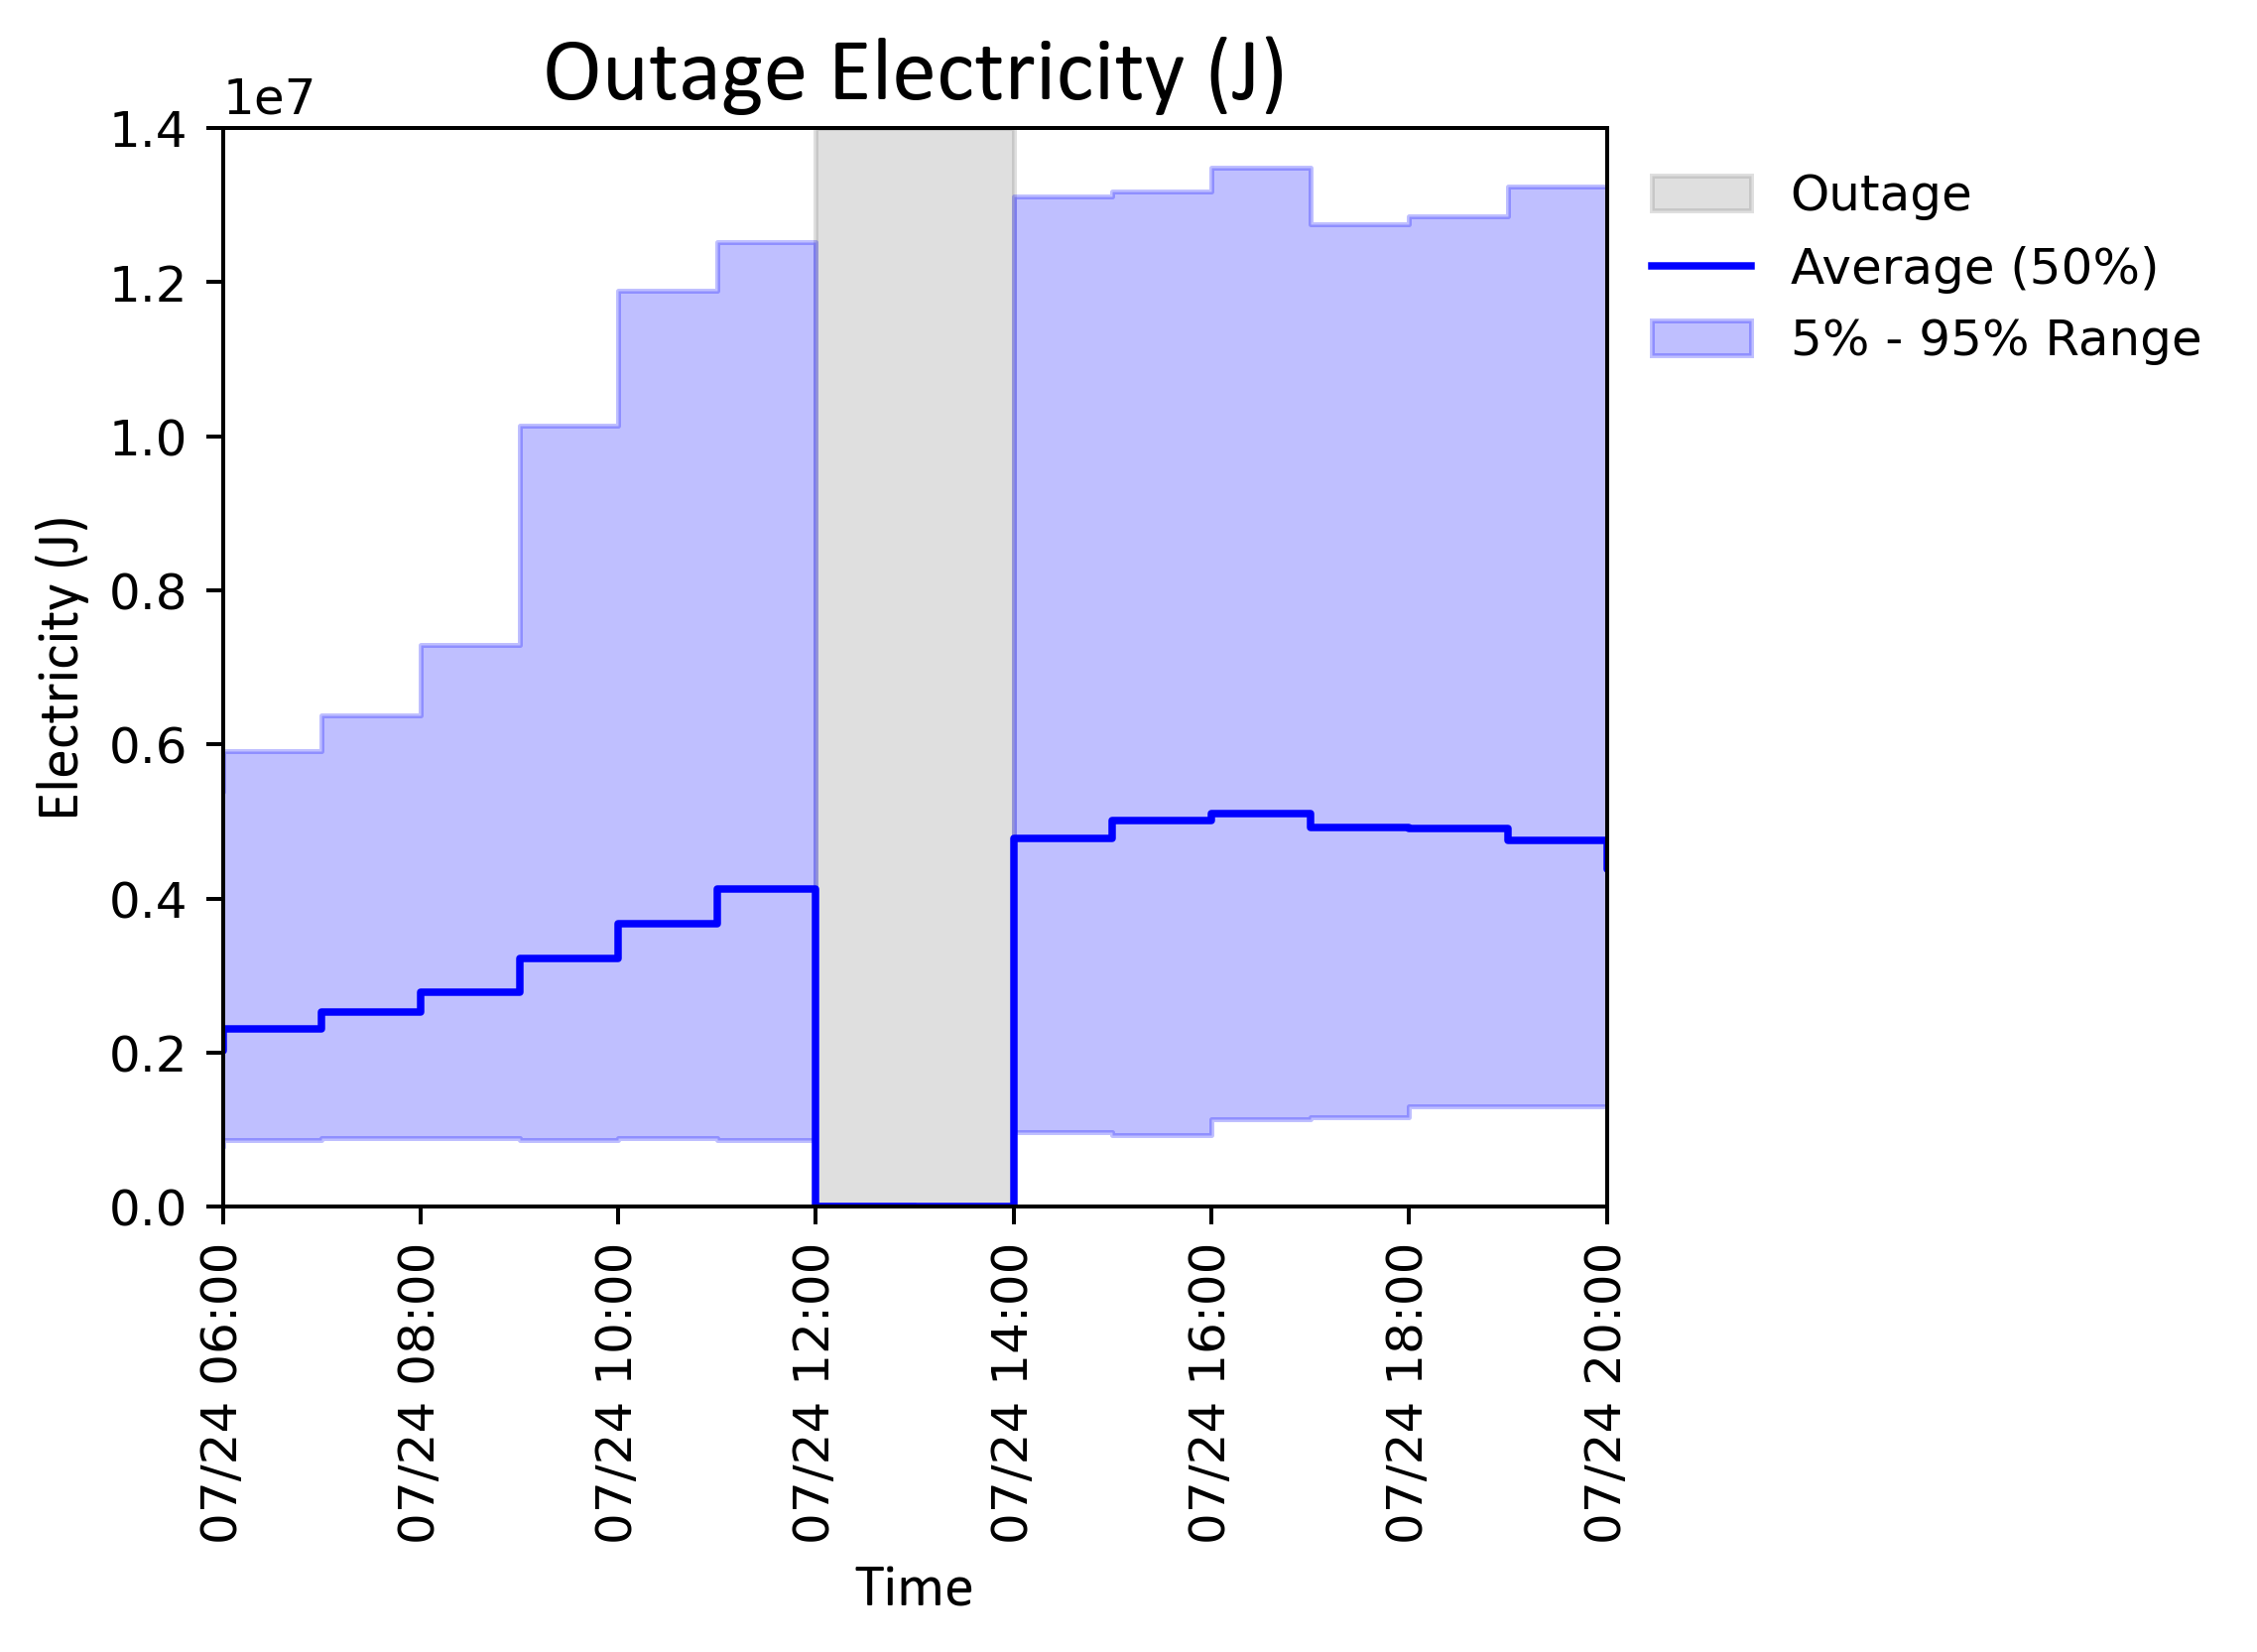

In [13]:

f9, ax9 = plt.subplots(figsize=(5,4),dpi=360)
ax9.fill_between([otg_start, otg_end],[y_max_e,y_max_e],alpha=.25,color='grey',label= "Outage")
ax9.step(outage_summary['Date/Time'],outage_summary['E - 50%'],color = 'b',label="Average (50%)",where='pre')
ax9.fill_between(outage_summary['Date/Time'], outage_summary['E - 5%'], outage_summary['E - 95%'],step='pre',alpha=.25,color='b',label="5% - 95% Range")
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='2H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
ax9.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax9.set_xlim(window_start,window_end)
ax9.set_ylim([y_min_e,y_max_e])
ax9.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax9.set_ylabel('Electricity (J)',fontsize=labelsize,**labelfont)
ax9.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left',frameon=False)
ax9.set_title('Outage Electricity (J)',fontsize=titlesize,**labelfont)
f9.savefig(data_file_path + "/figures/"+ otg + "HrElectricityZoom.svg",bbox_inches = "tight")


Text(0.5, 1.0, 'Baseline Vs. Outage Electricity')

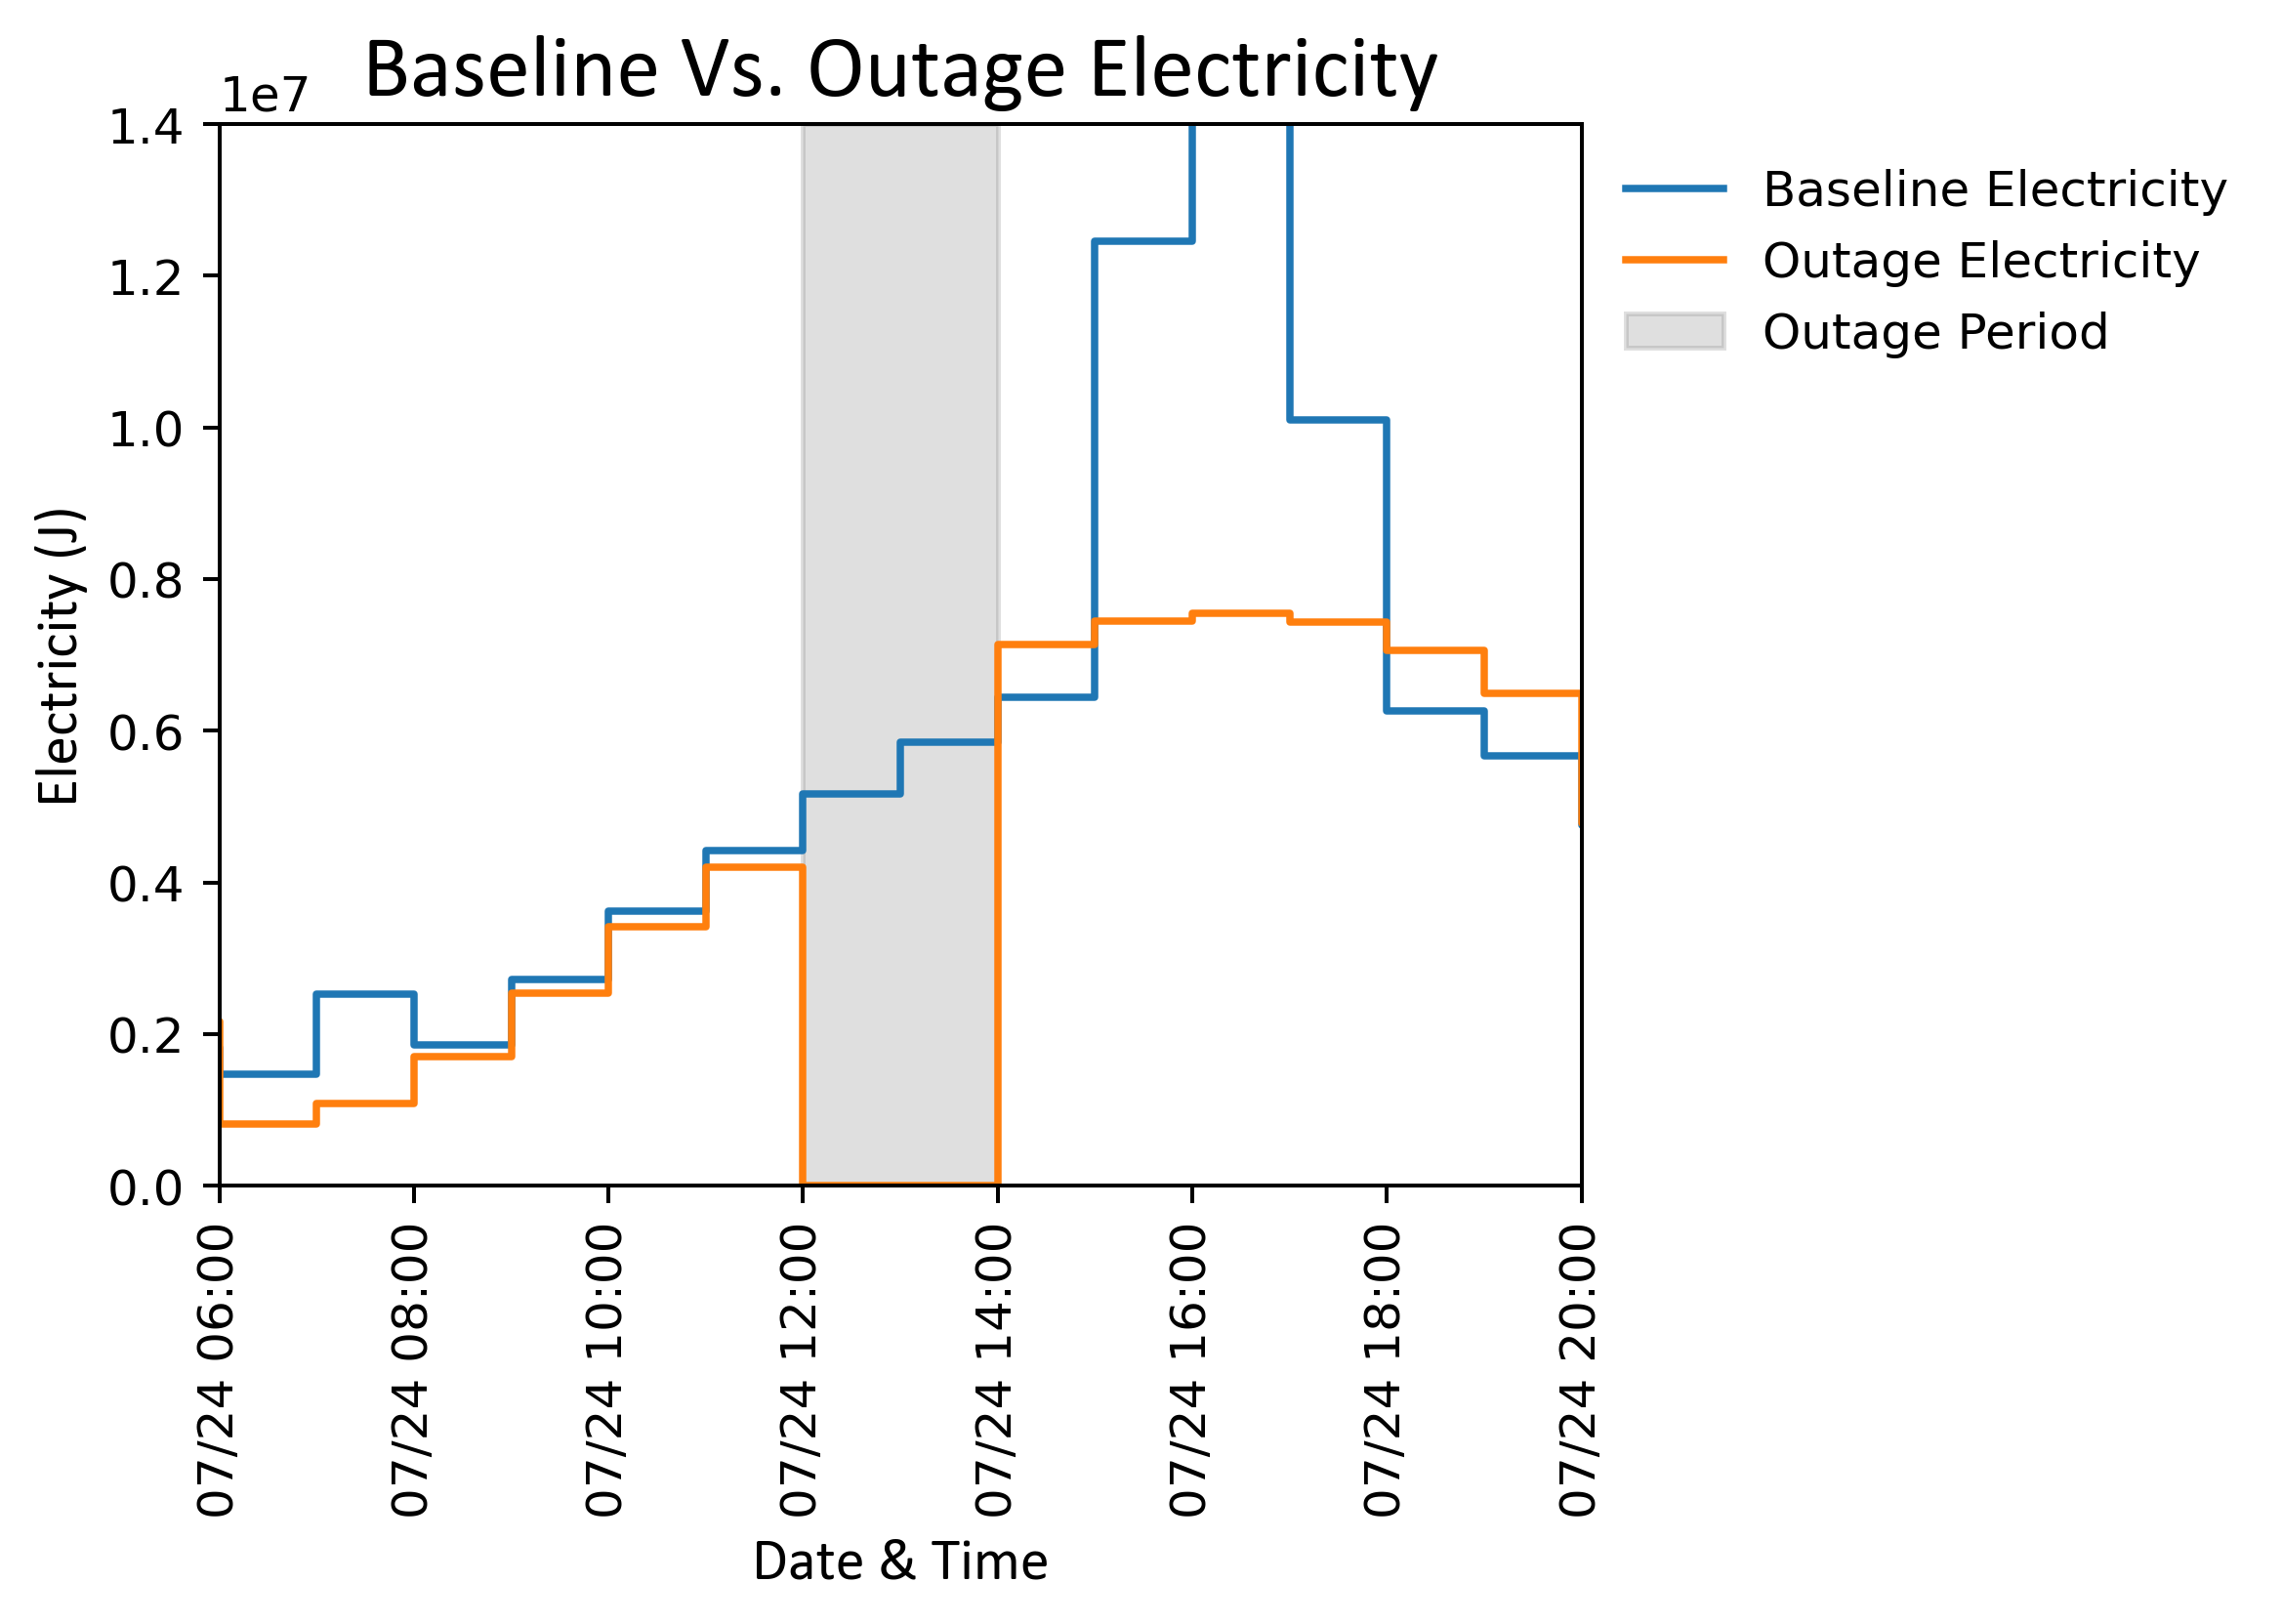

In [14]:
f9, ax9 = plt.subplots(figsize=(5,4),dpi=360)
ax9.step(baseline_electricity['Date/Time'],baseline_electricity['bldg0002642'],label='Baseline Electricity')
ax9.step(outage_electricity['Date/Time'],outage_electricity['bldg0002642'],label = 'Outage Electricity')
ax9.fill_between([otg_start, otg_end],[y_max_e,y_max_e],alpha=.25,color='grey',label= "Outage Period")
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='2H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
ax9.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax9.set_xlim(window_start,window_end)
ax9.set_ylim([y_min_e,y_max_e])
ax9.set_xlabel('Date & Time',fontsize=labelsize,**labelfont)
ax9.set_ylabel('Electricity (J)',fontsize=labelsize,**labelfont)
ax9.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left',frameon=False)
ax9.set_title('Baseline Vs. Outage Electricity',fontsize=titlesize,**labelfont)
# f9.savefig(data_file_path + "/figures/"+ otg + "HrElectricityZoom.svg",bbox_inches = "tight")


# ax9.xlim(window_start,window_end)
# plt.ylim([0,y_max_e])
# plt.fill_between([otg_start, otg_end],[y_max_e,y_max_e],alpha=.25,color='grey',label= "Outage")
# plt.xlabel('Date')


Text(0.5, 1.0, '2 Hr Outage Temp by Vintage Zoom')

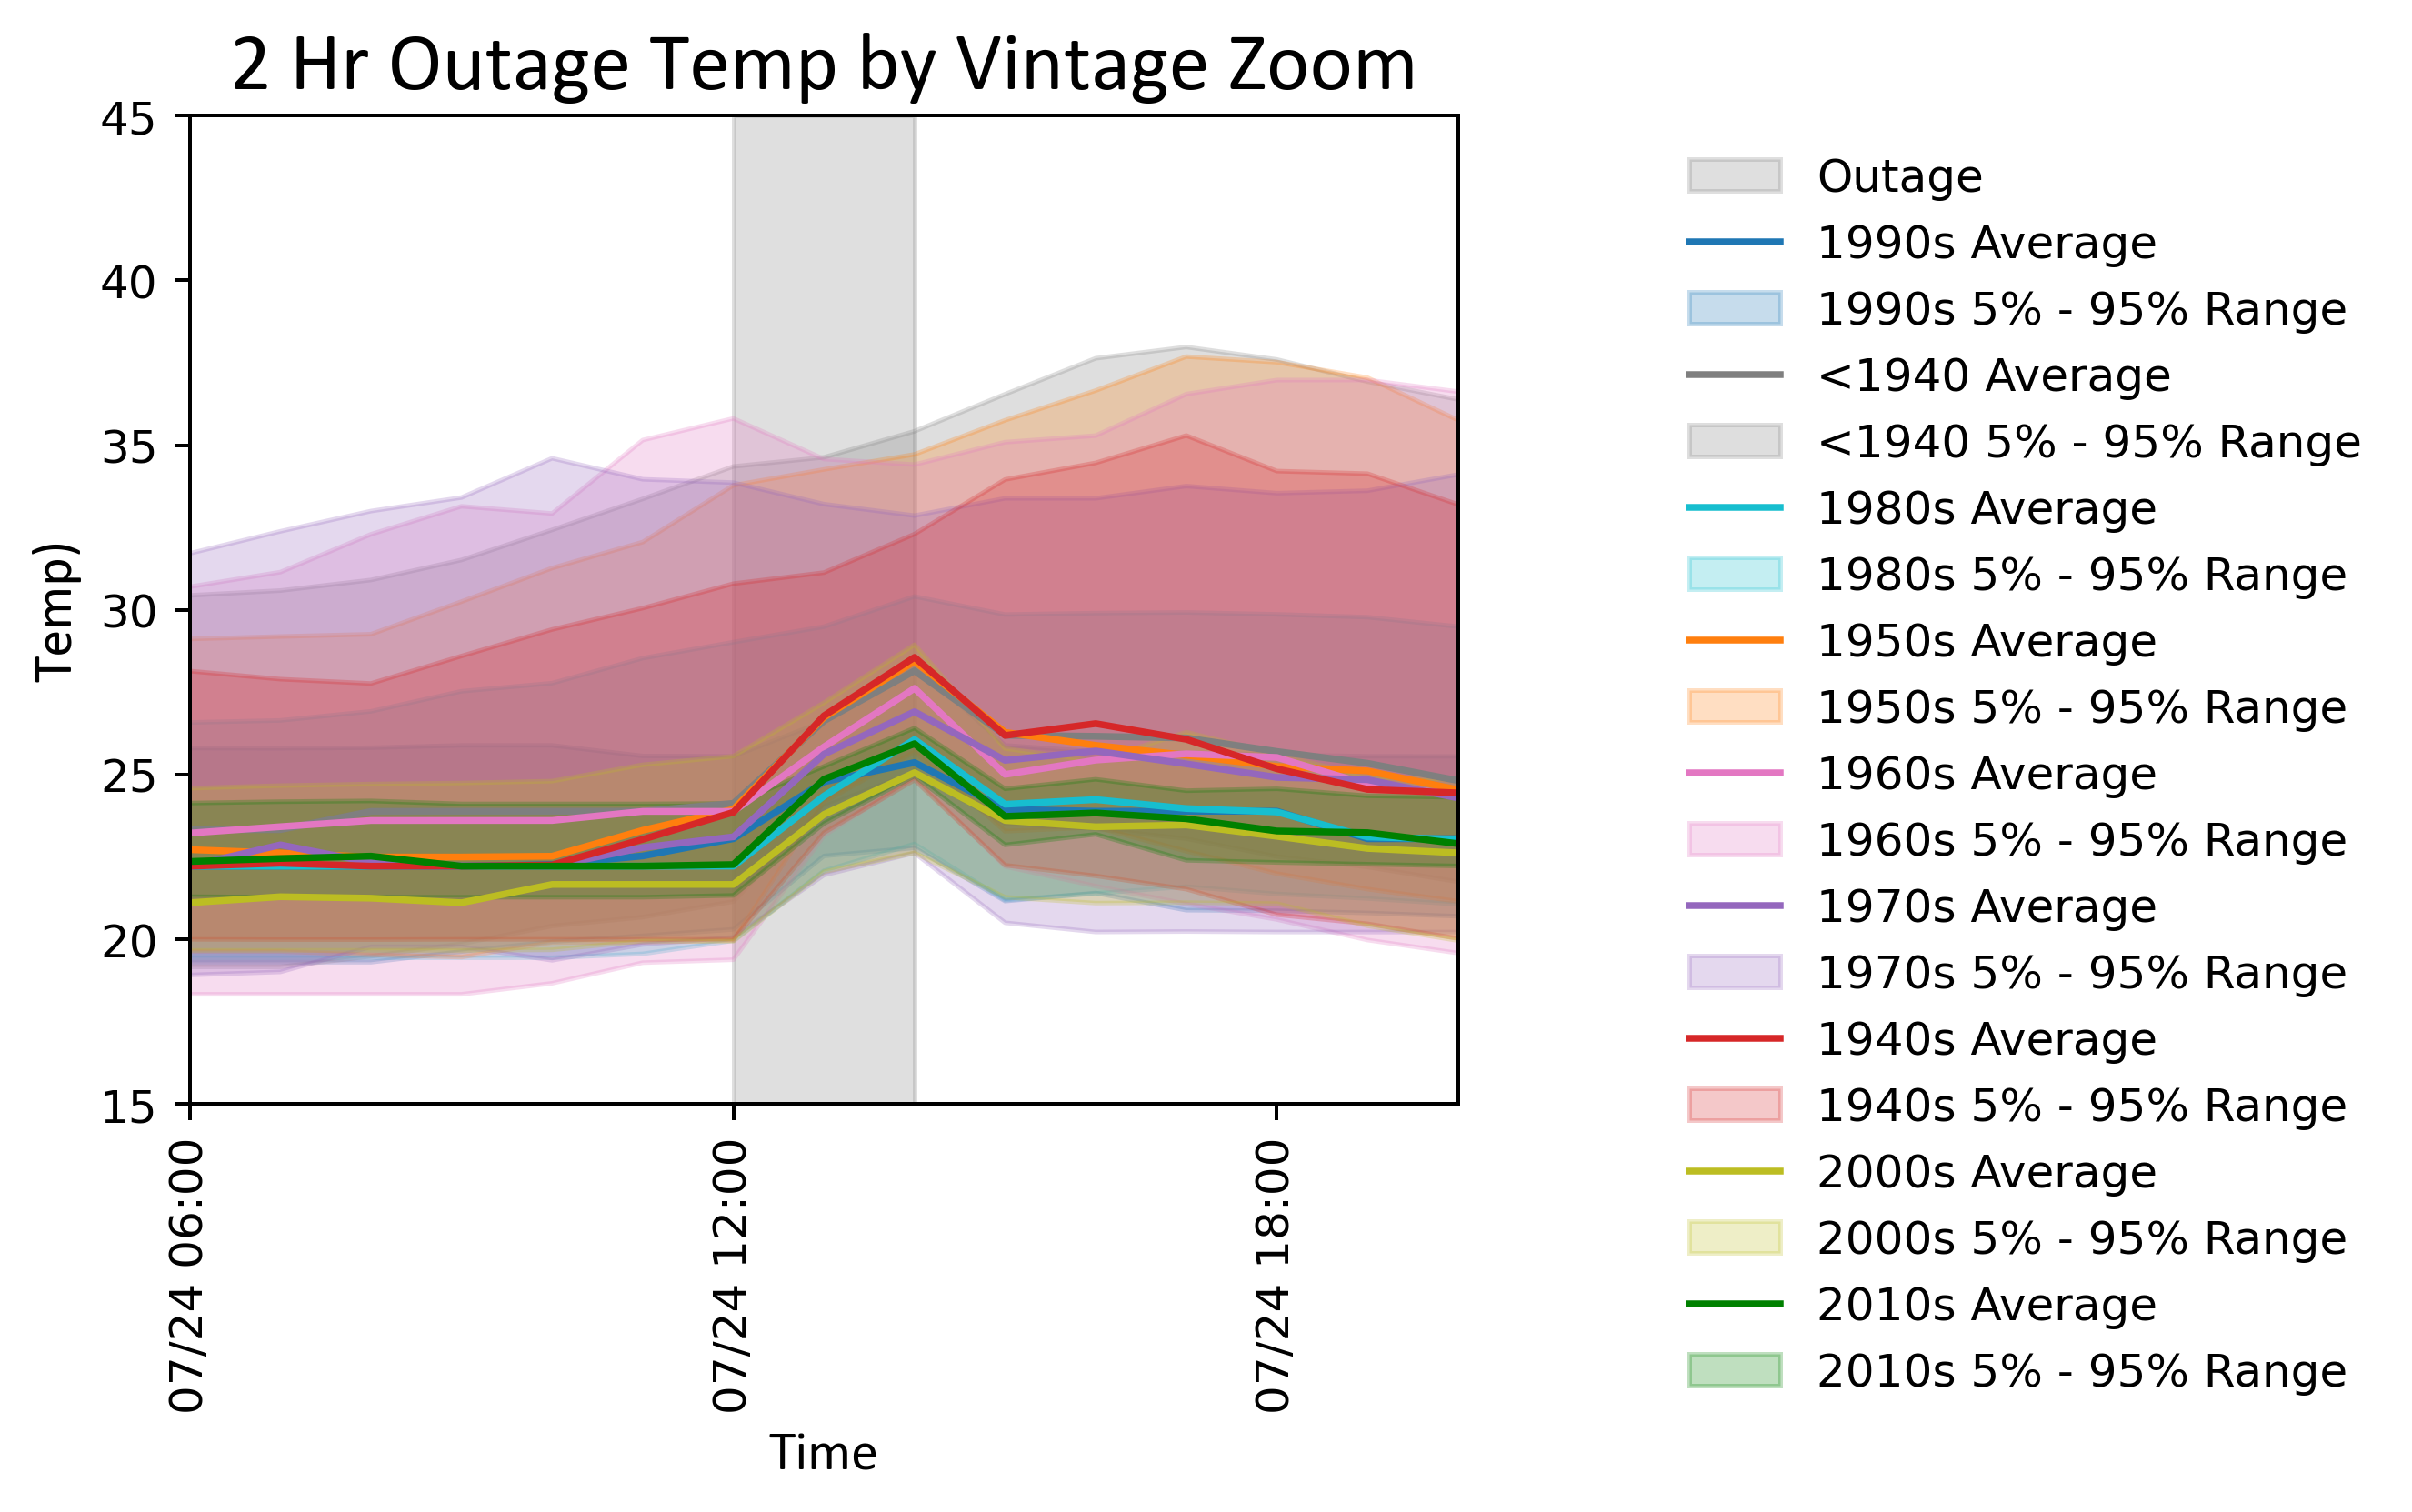

In [21]:
f5,ax5=plt.subplots(figsize=(5,4),dpi=360)
for vintage in pd.unique(metadata['in.vintage']):
    cols = 'bldg' + metadata.loc[metadata['in.vintage']== vintage]['bldg_id'].astype(str)
    subset = pd.DataFrame(outage_temperature, columns=cols)
    outage_summary[vintage + ' - T - 5%'] = subset.quantile(q=.05,axis=1)
    outage_summary[vintage + ' - T - 50%'] =subset.quantile(q=.5,axis=1)
    outage_summary[vintage + ' - T - 95%'] = subset.quantile(q=.95,axis=1)

#     y_min_e2 = 0
#     y_max_e2 = scale*math.ceil(outage_summary['1950s - E - 95%'].max()/scale)
ax5.fill_between([otg_start, otg_end],[y_max_t,y_max_t],alpha=.25,color='grey',label= "Outage")

for vintage in pd.unique(metadata['in.vintage']):
    if vintage == '<1940':
        vintage_color = 'tab:gray'
    elif vintage == '1940s':
        vintage_color = 'tab:red'
    elif vintage == '1950s':
        vintage_color = 'tab:orange'
    elif vintage == '1960s':
        vintage_color = 'tab:pink'
    elif vintage == '1970s':
        vintage_color = 'tab:purple'
    elif vintage == '1980s':
        vintage_color = 'tab:cyan'
    elif vintage == '1990s':
        vintage_color = 'tab:blue'
    elif vintage == '2000s':
        vintage_color = 'tab:olive'
    else:
        vintage_color = 'green'
    ax5.plot(outage_summary['Date/Time'],outage_summary[vintage + ' - T - 50%'],color = vintage_color,label= str(vintage + " Average"))
    ax5.fill_between(outage_summary['Date/Time'], outage_summary[vintage + ' - T - 5%'], outage_summary[vintage + ' - T - 95%'],alpha=.25,color=vintage_color,label= str(vintage + " 5% - 95% Range"))

x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
ax5.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax5.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax5.set_ylabel('Temp)',fontsize=labelsize,**labelfont)
ax5.set_ylim([y_min_t,y_max_t])
ax5.set_xlim(window_start,window_end)
ax5.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax5.set_title(otg +' Hr Outage Temp by Vintage Zoom',fontsize=titlesize,**labelfont)


Text(0.5, 1.0, '2 Hr Outage Temp by Vintage Zoom')

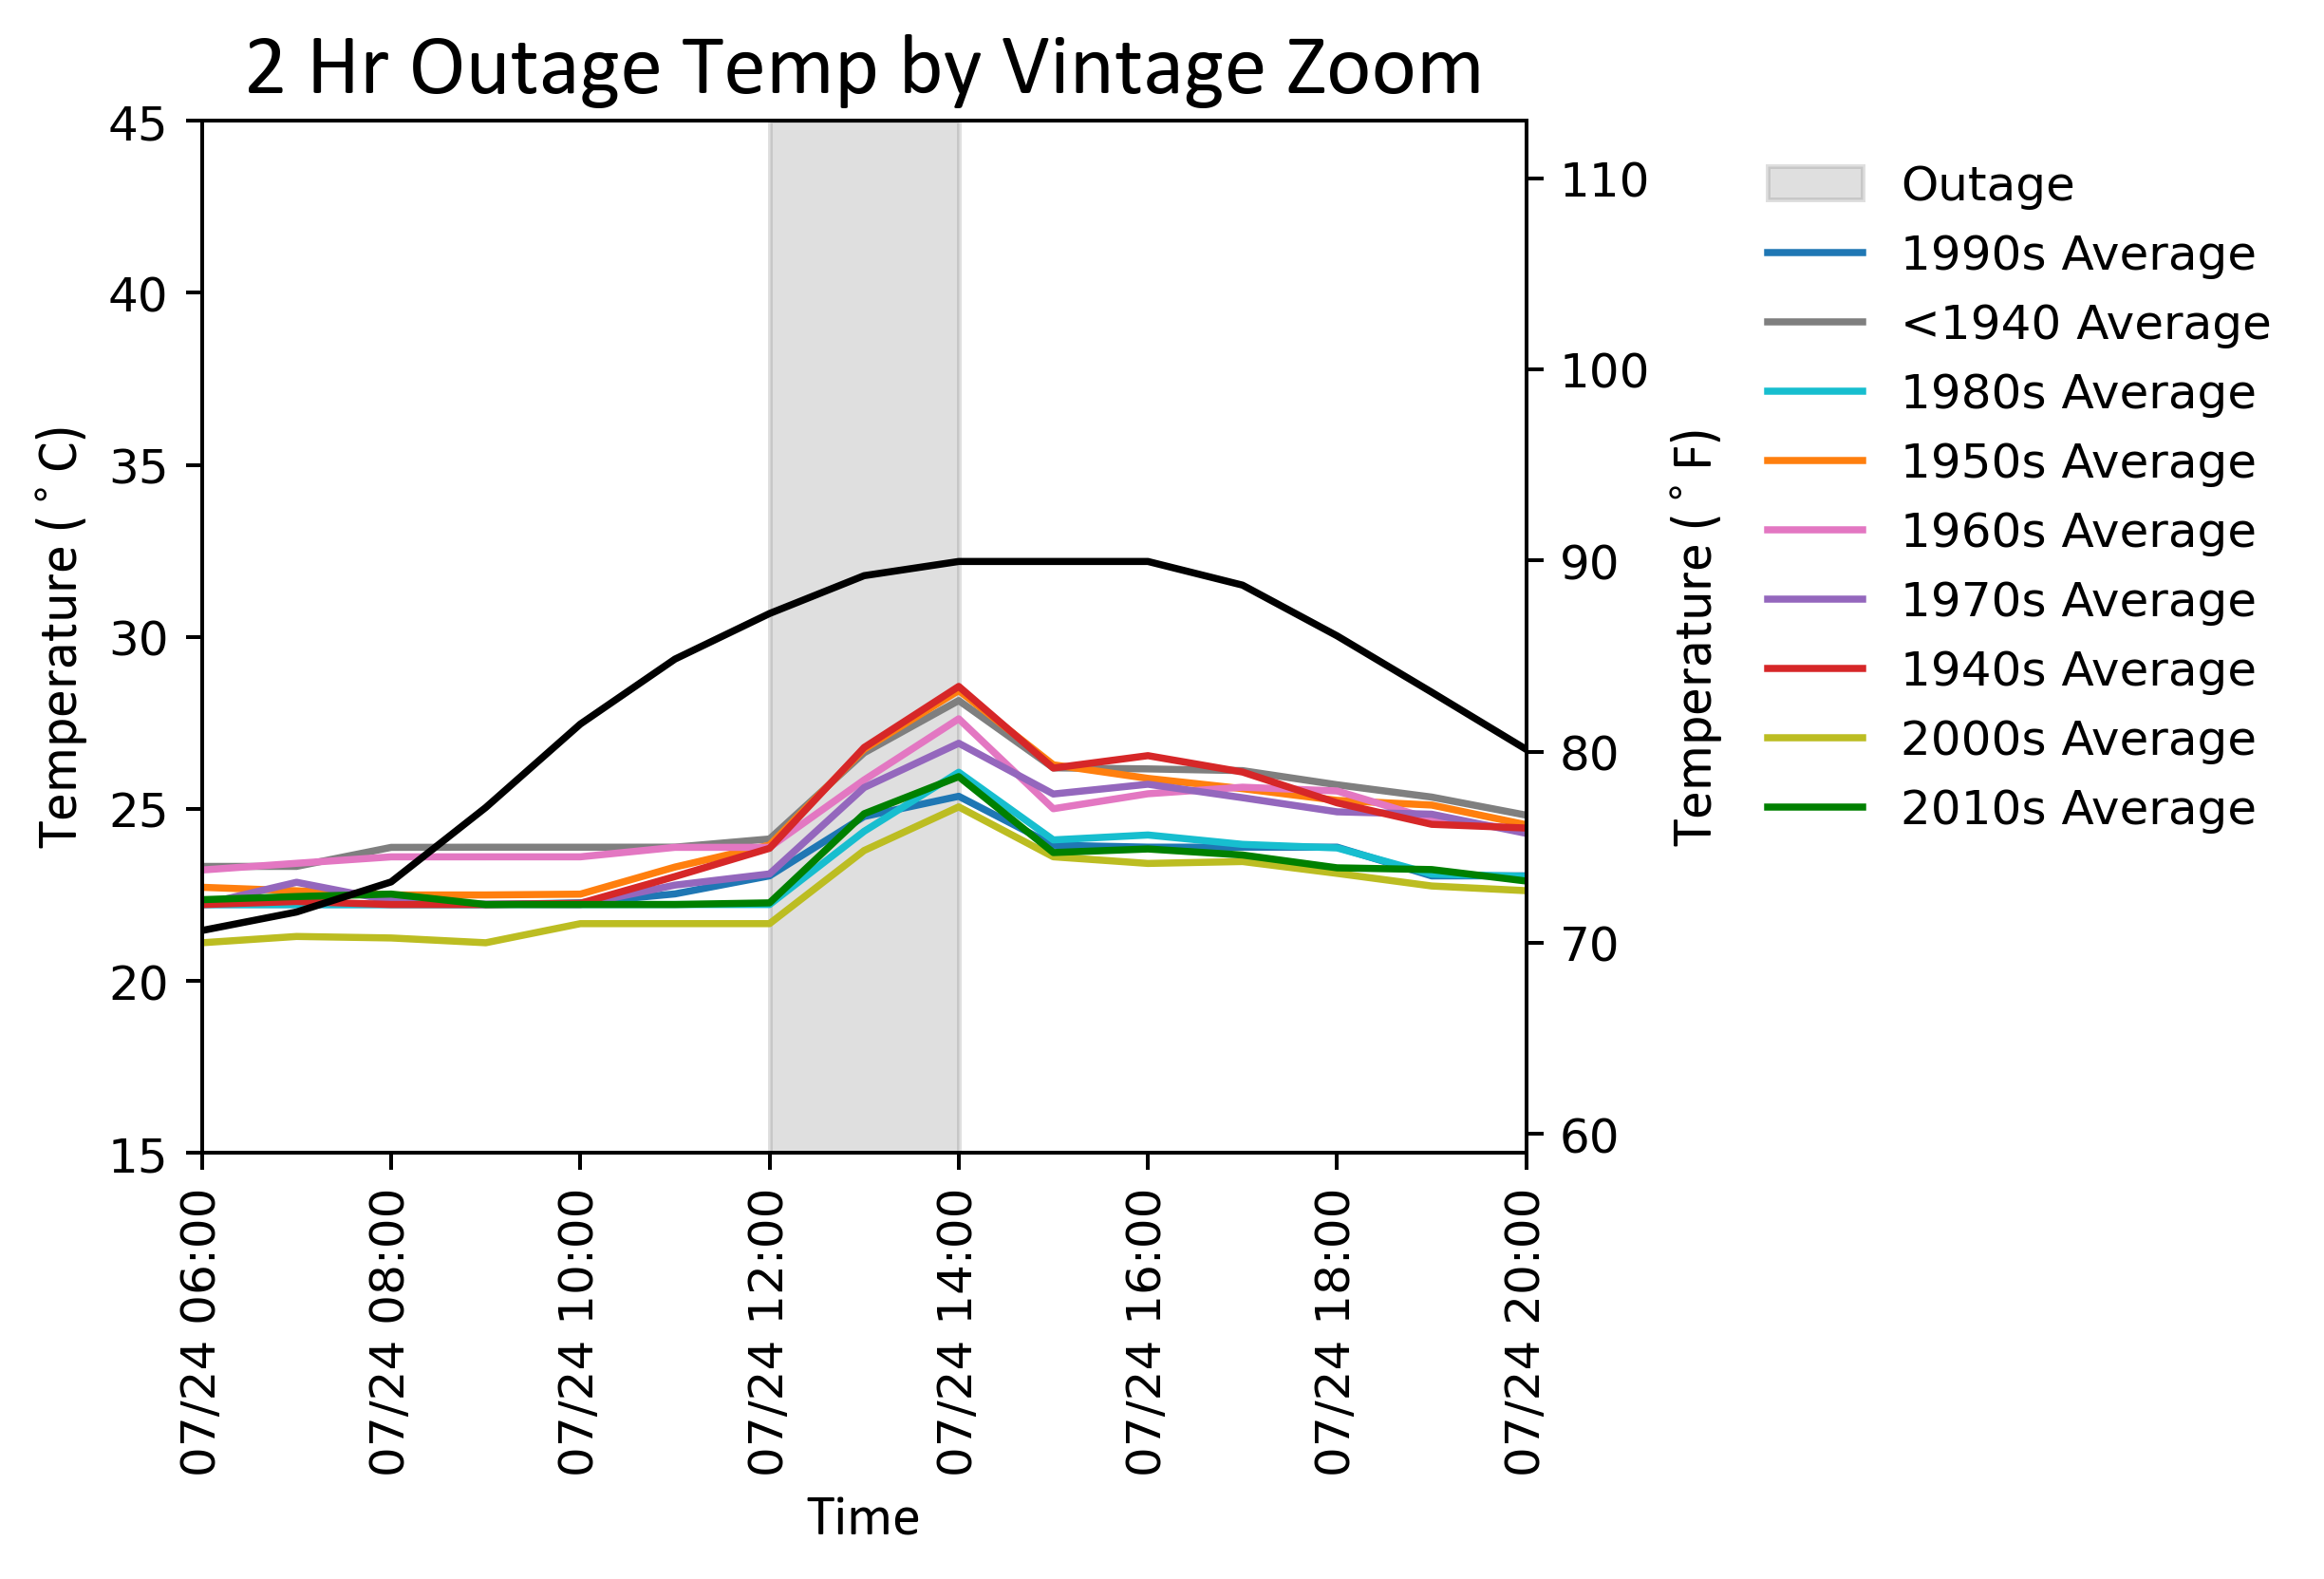

In [74]:
f5,ax5=plt.subplots(figsize=(5,4),dpi=360)
# list1 = pd.unique(metadata['in.vintage'])
# list1 = [int(x) for x in list1]
# list1.sort()

for vintage in pd.unique(metadata['in.vintage']):
    cols = 'bldg' + metadata.loc[metadata['in.vintage']== vintage]['bldg_id'].astype(str)
    subset = pd.DataFrame(outage_temperature, columns=cols)
    outage_summary[vintage + ' - T - 5%'] = subset.quantile(q=.05,axis=1)
    outage_summary[vintage + ' - T - 50%'] =subset.quantile(q=.5,axis=1)
    outage_summary[vintage + ' - T - 95%'] = subset.quantile(q=.95,axis=1)

#     y_min_e2 = 0
#     y_max_e2 = scale*math.ceil(outage_summary['1950s - E - 95%'].max()/scale)
ax5.fill_between([otg_start, otg_end],[y_max_t,y_max_t],alpha=.25,color='grey',label= "Outage")

for vintage in pd.unique(metadata['in.vintage']):
    if vintage == '<1940':
        vintage_color = 'tab:gray'
    elif vintage == '1940s':
        vintage_color = 'tab:red'
    elif vintage == '1950s':
        vintage_color = 'tab:orange'
    elif vintage == '1960s':
        vintage_color = 'tab:pink'
    elif vintage == '1970s':
        vintage_color = 'tab:purple'
    elif vintage == '1980s':
        vintage_color = 'tab:cyan'
    elif vintage == '1990s':
        vintage_color = 'tab:blue'
    elif vintage == '2000s':
        vintage_color = 'tab:olive'
    else:
        vintage_color = 'green'
    ax5.plot(outage_summary['Date/Time'],outage_summary[vintage + ' - T - 50%'],color = vintage_color,label= str(vintage + " Average"))
#     ax5.fill_between(outage_summary['Date/Time'], outage_summary[vintage + ' - T - 5%'], outage_summary[vintage + ' - T - 95%'],alpha=.25,color=vintage_color,label= str(vintage + " 5% - 95% Range"))
ax5b = ax5.twinx()
ax5b.plot(outdoor['Date/Time'],32+(9/5)*outdoor['Outdoor Temp'],color='k')
ax5b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
ax5b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='2H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
ax5.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax5.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax5.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax5.set_ylim([y_min_t,y_max_t])
ax5.set_xlim(window_start,window_end)
ax5.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax5.set_title(otg +' Hr Outage Temp by Vintage Zoom',fontsize=titlesize,**labelfont)


Text(0.5, 1.0, '2 Hr Outage Temp by Vintage Zoom')

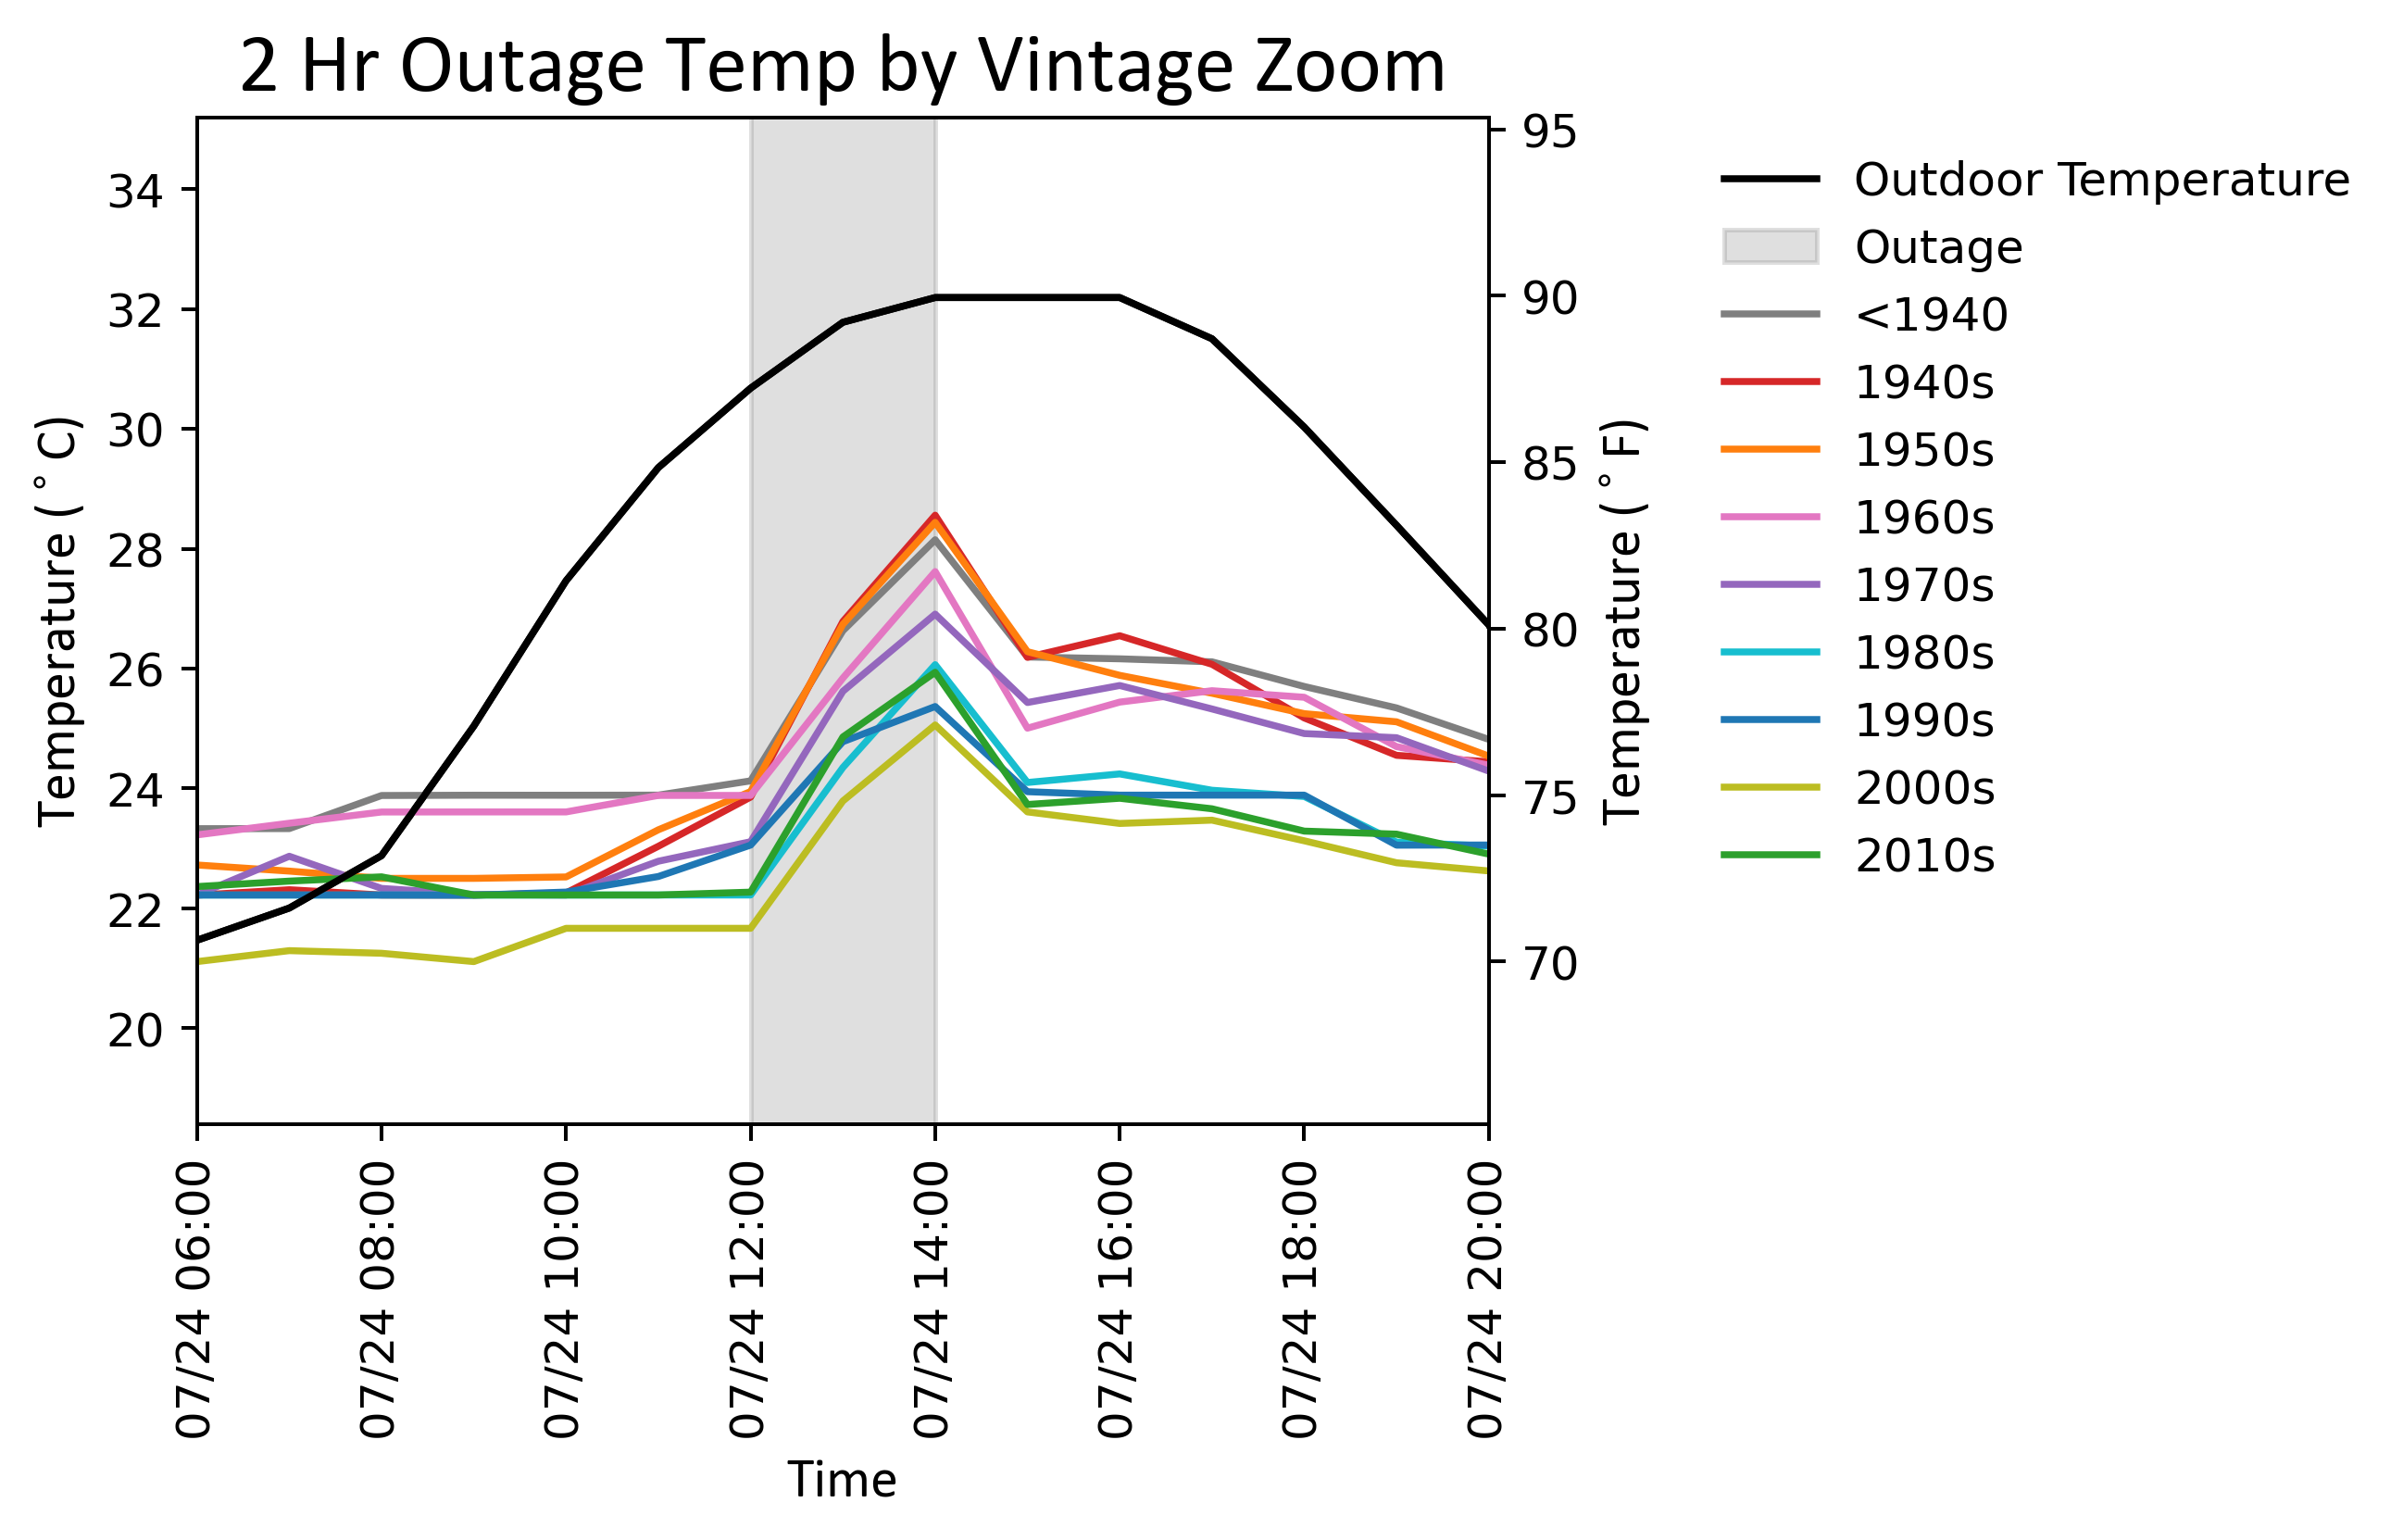

In [83]:
metadata['vintage_ix']=0
metadata.loc[metadata['in.vintage'] == '<1940','vintage_ix'] = 0 
metadata.loc[metadata['in.vintage'] == '1940s','vintage_ix'] = 1 
metadata.loc[metadata['in.vintage'] == '1950s','vintage_ix'] = 2 
metadata.loc[metadata['in.vintage'] == '1960s','vintage_ix'] = 3 
metadata.loc[metadata['in.vintage'] == '1970s','vintage_ix'] = 4 
metadata.loc[metadata['in.vintage'] == '1980s','vintage_ix'] = 5 
metadata.loc[metadata['in.vintage'] == '1990s','vintage_ix'] = 6 
metadata.loc[metadata['in.vintage'] == '2000s','vintage_ix'] = 7 
metadata.loc[metadata['in.vintage'] == '2010s','vintage_ix'] = 8 
ids = metadata['vintage_ix'].unique()
ids.sort()
y_max = max(outdoor['Outdoor Temp']) + 3
y_min = min(outdoor['Outdoor Temp'])

f5,ax5=plt.subplots(figsize=(5,4),dpi=360)
ax5.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
ax5.fill_between([otg_start, otg_end],[y_max_t,y_max_t],alpha=.25,color='grey',label= "Outage")
for vintage_ix in ids:
    if vintage_ix == 0:
        vintage = '<1940'
        vintage_color = 'tab:gray'
    elif vintage_ix == 1:
        vintage = '1940s'
        vintage_color = 'tab:red'
    elif vintage_ix == 2:
        vintage =  '1950s'
        vintage_color = 'tab:orange'
    elif vintage_ix == 3:
        vintage =  '1960s'
        vintage_color = 'tab:pink'
    elif vintage_ix == 4:
        vintage =  '1970s'
        vintage_color = 'tab:purple'
    elif vintage_ix == 5:
        vintage = '1980s'
        vintage_color = 'tab:cyan'
    elif vintage_ix == 6:
        vintage = '1990s'
        vintage_color = 'tab:blue'
    elif vintage_ix == 7:
        vintage = '2000s'
        vintage_color = 'tab:olive'
    else:
        vintage = '2010s'
        vintage_color = 'tab:green'
    ax5.plot(outage_summary['Date/Time'],outage_summary[vintage + ' - T - 50%'],color = vintage_color,label= str(vintage))
#     ax5.fill_between(outage_summary['Date/Time'], outage_summary[vintage + ' - T - 5%'], outage_summary[vintage + ' - T - 95%'],alpha=.25,color=vintage_color,label= str(vintage + " 5% - 95% Range"))
ax5b = ax5.twinx()
ax5b.plot(outdoor['Date/Time'],32+(9/5)*outdoor['Outdoor Temp'],color='k')
ax5b.set_ylim((32+(9/5)*y_min,32+(9/5)*y_max))
ax5b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='2H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
ax5.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax5.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax5.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax5.set_ylim([y_min,y_max])
ax5.set_xlim(window_start,window_end)
ax5.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax5.set_title(otg +' Hr Outage Temp by Vintage Zoom',fontsize=titlesize,**labelfont)
# plt.show()

Text(0.5, 1.0, '2 Hr Outage Temp by Type Zoom')

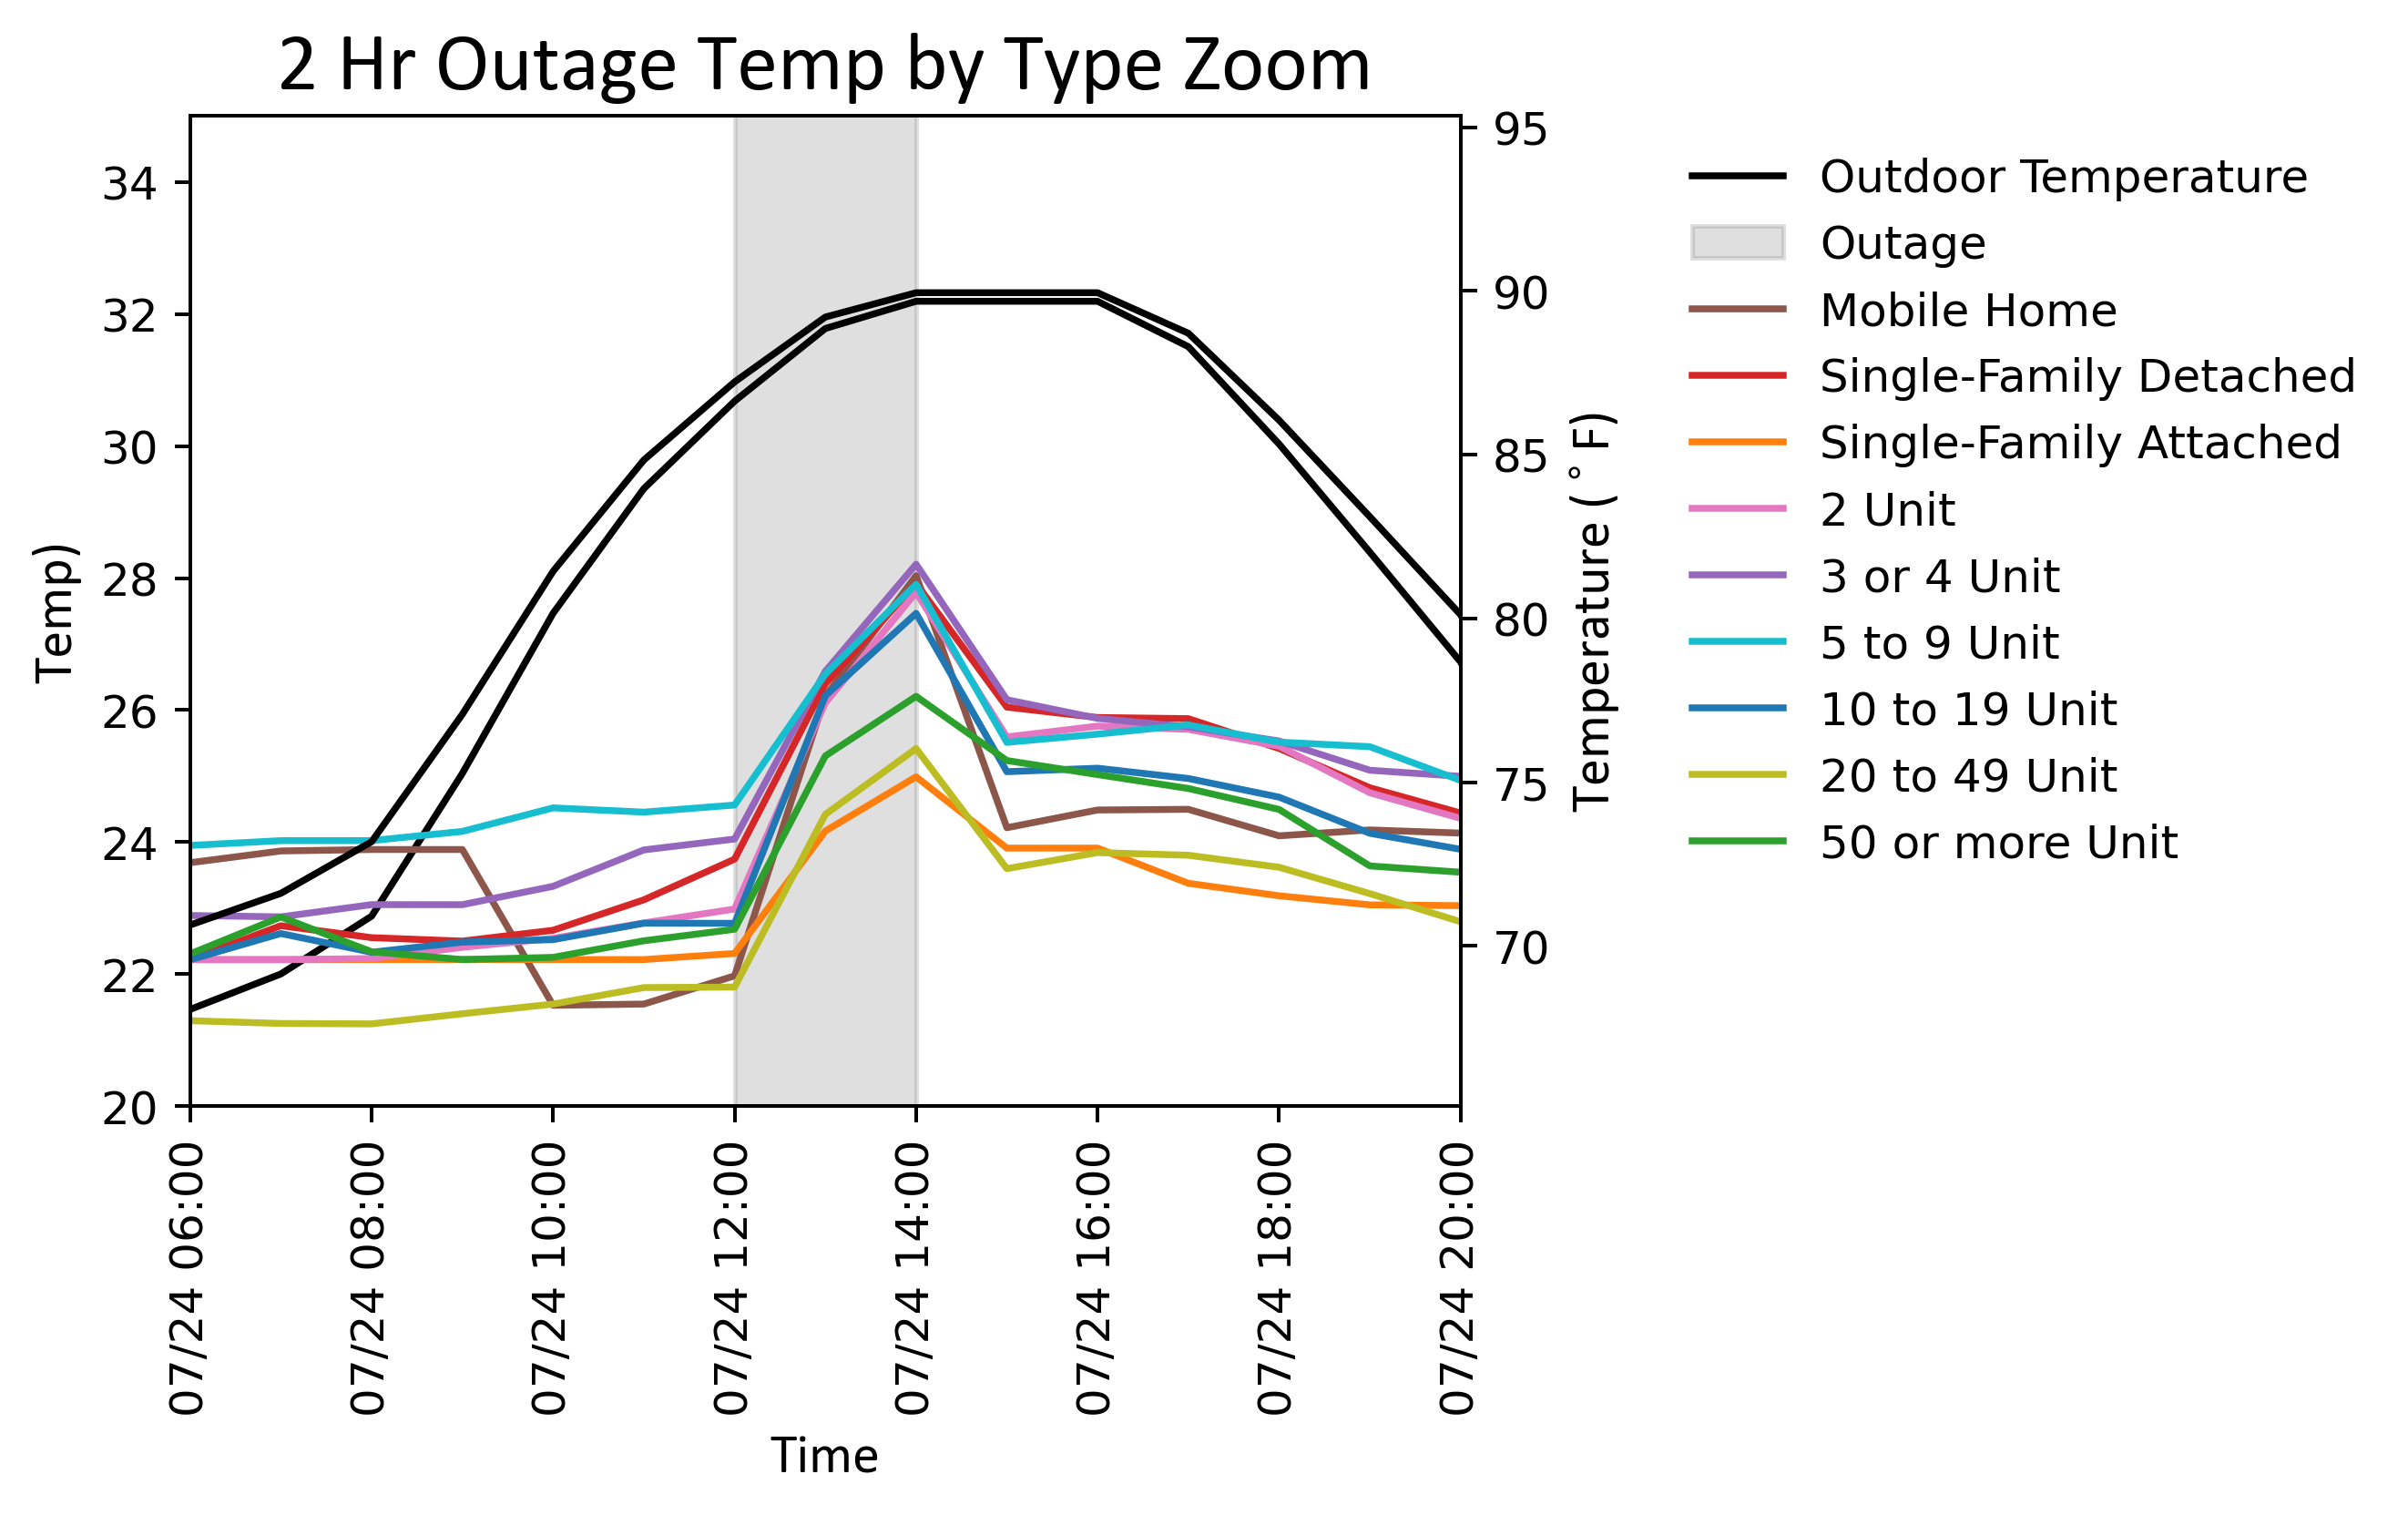

In [84]:
metadata['type_ix']=0
metadata.loc[metadata['in.geometry_building_type_acs'] == 'Mobile Home','type_ix'] = 0 
metadata.loc[metadata['in.geometry_building_type_acs'] == 'Single-Family Detached','type_ix'] = 1 
metadata.loc[metadata['in.geometry_building_type_acs'] ==  'Single-Family Attached','type_ix'] = 2 
metadata.loc[metadata['in.geometry_building_type_acs'] == '2 Unit','type_ix'] = 3 
metadata.loc[metadata['in.geometry_building_type_acs'] == '3 or 4 Unit','type_ix'] = 4 
metadata.loc[metadata['in.geometry_building_type_acs'] == '5 to 9 Unit','type_ix'] = 5 
metadata.loc[metadata['in.geometry_building_type_acs'] == '10 to 19 Unit','type_ix'] = 6 
metadata.loc[metadata['in.geometry_building_type_acs'] == '20 to 49 Unit','type_ix'] = 7 
metadata.loc[metadata['in.geometry_building_type_acs'] == '50 or more Unit','type_ix'] = 8 
ids = metadata['type_ix'].unique()
ids.sort()


for each_type in pd.unique(metadata['in.geometry_building_type_acs']):
    cols = 'bldg' + metadata.loc[metadata['in.geometry_building_type_acs']== each_type]['bldg_id'].astype(str)
    subset = pd.DataFrame(outage_temperature, columns=cols)
    outage_summary[each_type + ' - T - 5%'] = subset.quantile(q=.05,axis=1)
    outage_summary[each_type + ' - T - 50%'] =subset.quantile(q=.5,axis=1)
    outage_summary[each_type + ' - T - 95%'] = subset.quantile(q=.95,axis=1)

f5,ax5=plt.subplots(figsize=(5,4),dpi=360)
ax5.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
ax5.fill_between([otg_start, otg_end],[y_max_t,y_max_t],alpha=.25,color='grey',label= "Outage")
for each_type in ids:
    if each_type == 0:
        the_type = 'Mobile Home'
        type_color = 'tab:brown'
    elif each_type == 1:
        the_type = 'Single-Family Detached'
        type_color = 'tab:red'
    elif each_type == 2:
        the_type =  'Single-Family Attached'
        type_color = 'tab:orange'
    elif each_type == 3:
        the_type =  '2 Unit'
        type_color = 'tab:pink'
    elif each_type == 4:
        the_type = '3 or 4 Unit'
        type_color = 'tab:purple'
    elif each_type == 5:
        the_type = '5 to 9 Unit'
        type_color = 'tab:cyan'
    elif each_type == 6:
        the_type = '10 to 19 Unit'
        type_color = 'tab:blue'
    elif each_type == 7:
        the_type = '20 to 49 Unit'
        type_color = 'tab:olive'
    else:
        the_type = '50 or more Unit'
        type_color = 'tab:green'
    ax5.plot(outage_summary['Date/Time'],outage_summary[the_type + ' - T - 50%'],color = type_color,label= str(the_type))
#     ax5.fill_between(outage_summary['Date/Time'], outage_summary[vintage + ' - T - 5%'], outage_summary[vintage + ' - T - 95%'],alpha=.25,color=vintage_color,label= str(vintage + " 5% - 95% Range"))

ax5b = ax5.twinx()
ax5b.plot(outdoor['Date/Time'],32+(9/5)*outdoor['Outdoor Temp'],color='k')
ax5b.set_ylim((32+(9/5)*y_min,32+(9/5)*y_max))
ax5b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='2H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
ax5.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax5.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax5.set_ylabel('Temp)',fontsize=labelsize,**labelfont)
ax5.set_ylim([20,35])
ax5.set_xlim(window_start,window_end)
ax5.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax5.set_title(otg +' Hr Outage Temp by Type Zoom',fontsize=titlesize,**labelfont)
# plt.show()

In [70]:
for each_type in pd.unique(metadata['in.geometry_building_type_acs']):
    print(str(each_type))

Single-Family Detached
2 Unit
3 or 4 Unit
5 to 9 Unit
Single-Family Attached
10 to 19 Unit
50 or more Unit
20 to 49 Unit
Mobile Home


Text(0.5, 0.98, 'Temperature by Vintage')

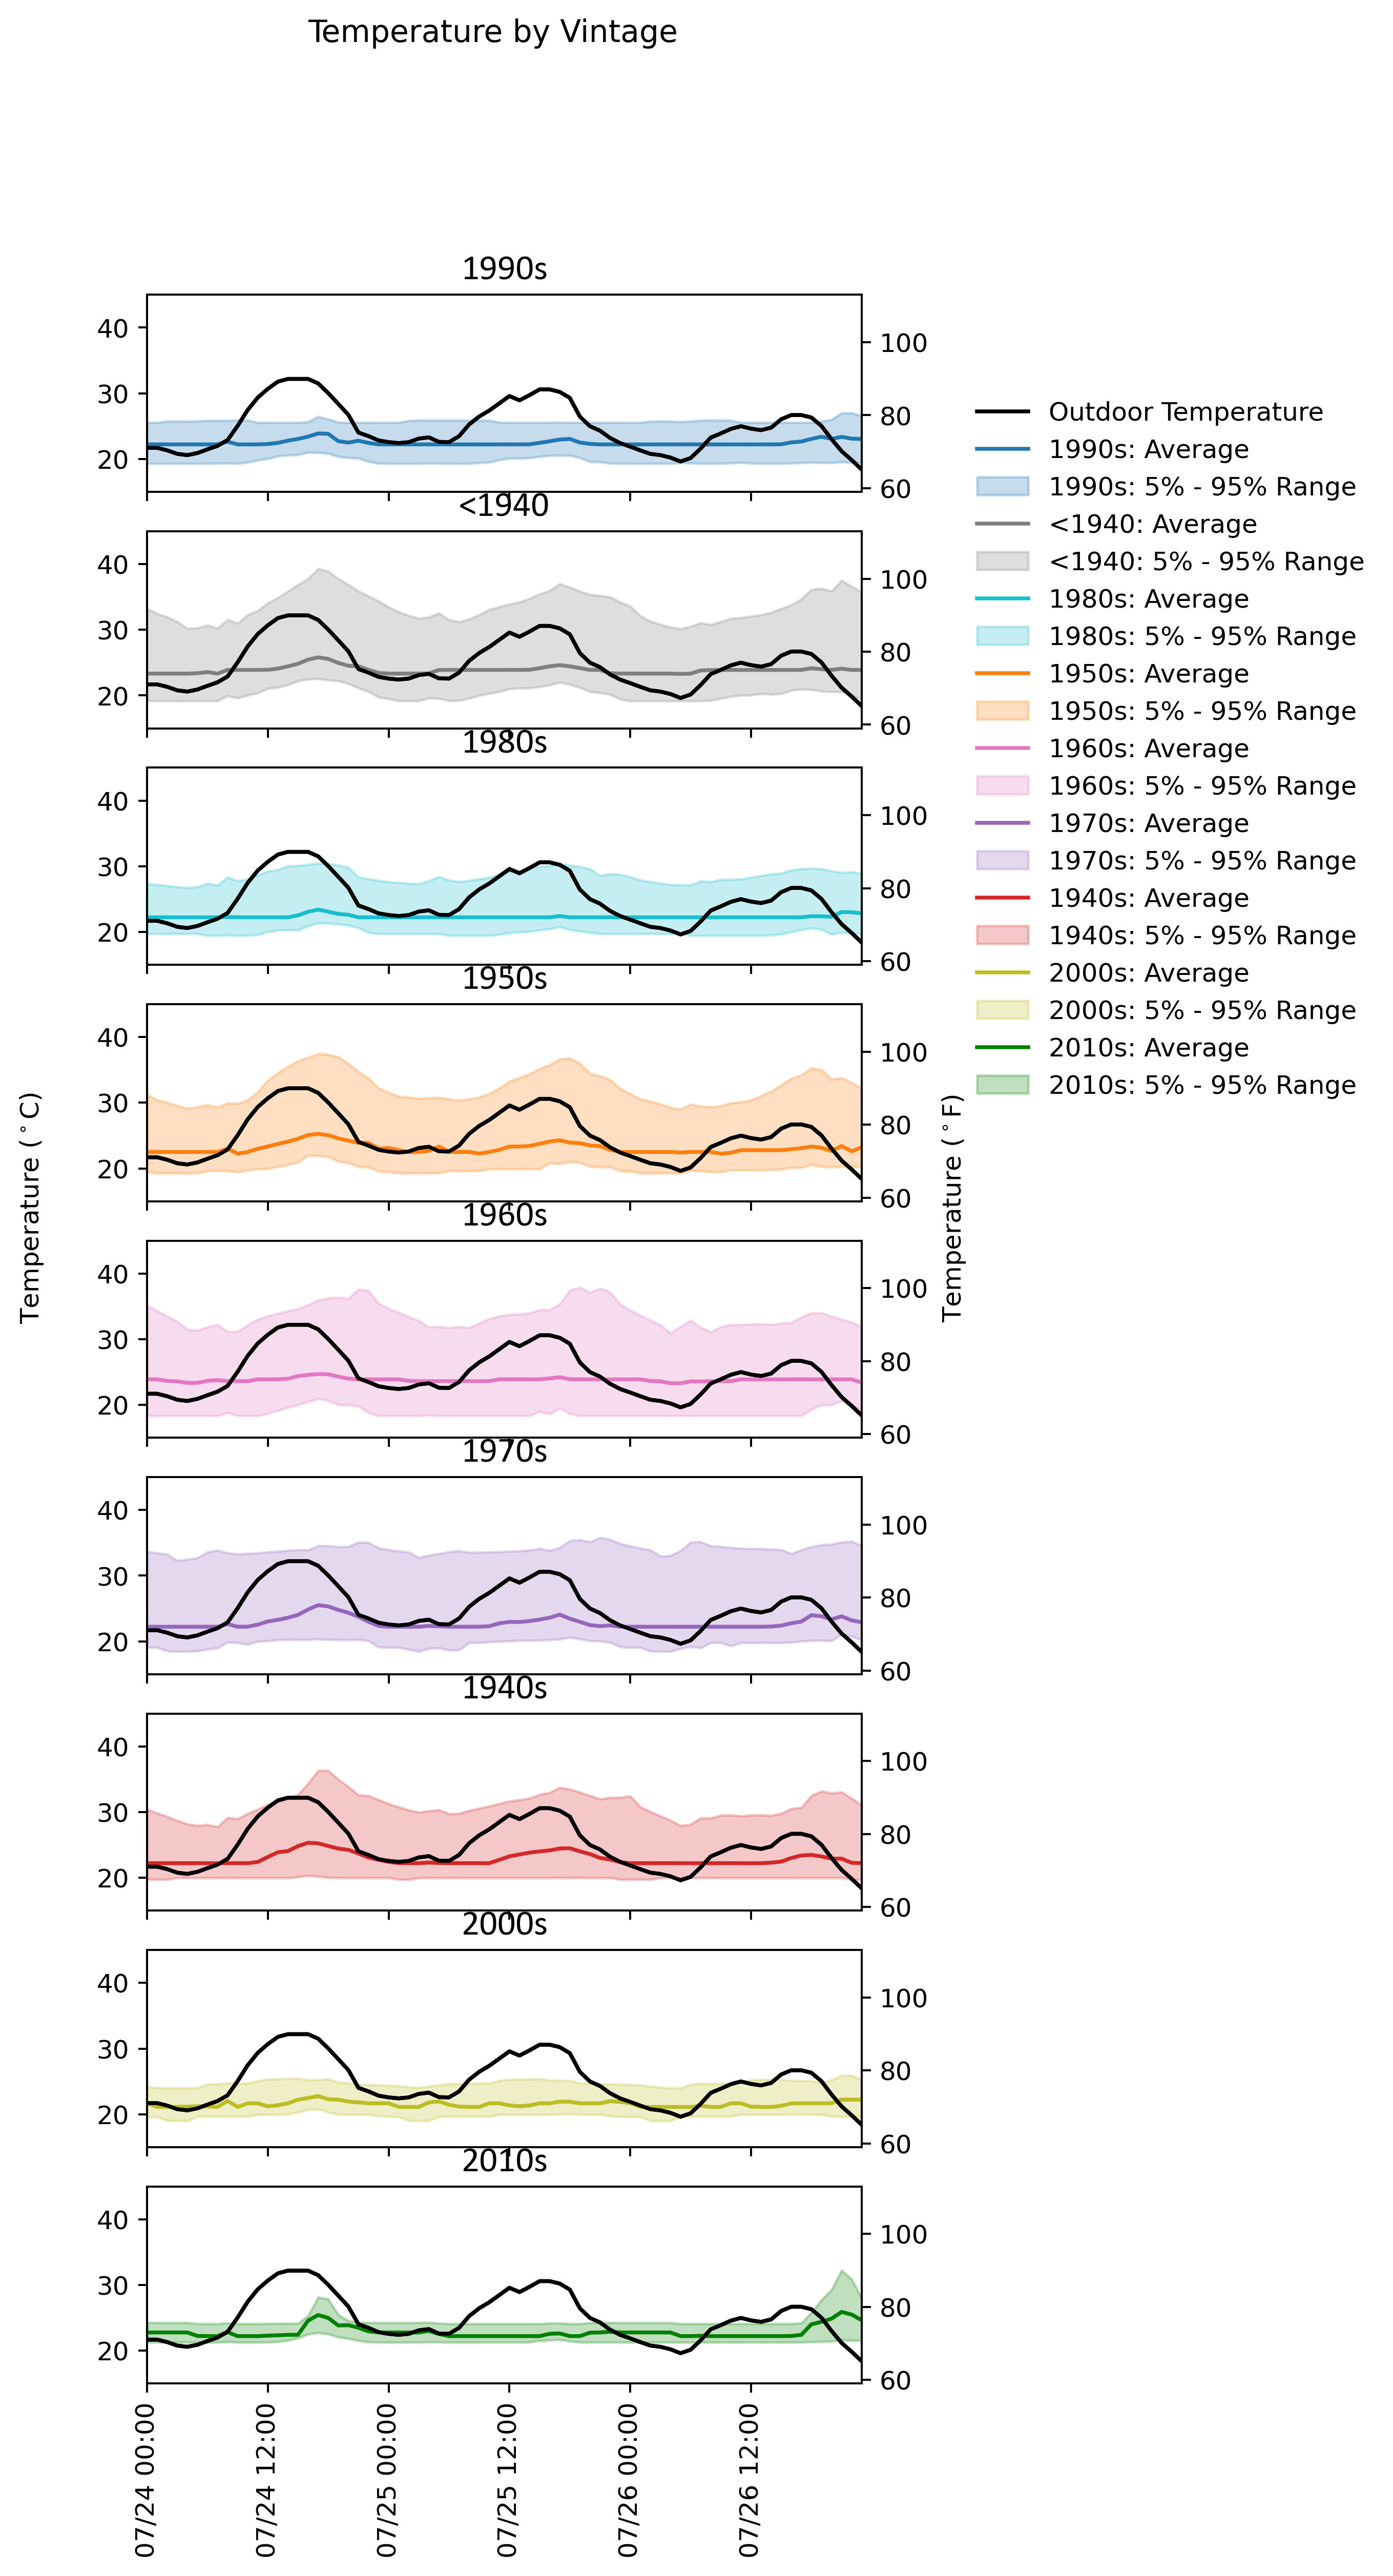

In [28]:
fig, axs = plt.subplots(9,figsize=(5,15),dpi=360)
# y_min = 15
# y_max = 45
# fig.suptitle('Vertically stacked subplots')
ax_id = 0 
 
for vintage in pd.unique(metadata['in.vintage']):
    cols = 'bldg' + metadata.loc[metadata['in.vintage']== vintage]['bldg_id'].astype(str)
    subset = pd.DataFrame(baseline_temperature, columns=cols)
    baseline_summary[vintage + ' - T - 5%'] = subset.quantile(q=.05,axis=1)
    baseline_summary[vintage + ' - T - 50%'] =subset.quantile(q=.5,axis=1)
    baseline_summary[vintage + ' - T - 95%'] = subset.quantile(q=.95,axis=1)
    
    if vintage == '<1940':
        vintage_color = 'tab:gray'
    elif vintage == '1940s':
        vintage_color = 'tab:red'
    elif vintage == '1950s':
        vintage_color = 'tab:orange'
    elif vintage == '1960s':
        vintage_color = 'tab:pink'
    elif vintage == '1970s':
        vintage_color = 'tab:purple'
    elif vintage == '1980s':
        vintage_color = 'tab:cyan'
    elif vintage == '1990s':
        vintage_color = 'tab:blue'
    elif vintage == '2000s':
        vintage_color = 'tab:olive'
    else:
        vintage_color = 'green'
        
    if ax_id == 0: 
        axs[ax_id].plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
    else:
        axs[ax_id].plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k')
    axs[ax_id].set_title(vintage,fontsize=subtitlesize,**labelfont)    
    axs[ax_id].plot(baseline_summary['Date/Time'],baseline_summary[vintage + ' - T - 50%'],color = vintage_color,label= str(vintage + ": Average"))
    axs[ax_id].fill_between(baseline_summary['Date/Time'], baseline_summary[vintage + ' - T - 5%'], baseline_summary[vintage + ' - T - 95%'],alpha=.25,color=vintage_color,label= str(vintage + ": 5% - 95% Range"))
    axs[ax_id].set_ylim([y_min_t,y_max_t])
    axs[ax_id].set_xlim(min(baseline_summary['Date/Time']),max(baseline_summary['Date/Time']))
    axb=axs[ax_id].twinx()
    axb.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
    axb.plot(outdoor['Date/Time'],outdoor['Outdoor Temp']*(9/5) + 32,color='k')
    
    ax_id = ax_id + 1
    
for ax in axs:
    ax.label_outer()
    
# plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
lines = []
labels = []
  
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    labels.extend(Label)
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='12H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
axs[ax_id - 1].set_xticks(x_ticks,x_tick_labels,rotation='vertical')
# fig.tight_layout()
fig.legend(lines, labels, bbox_to_anchor=(1, .85), loc='upper left',frameon=False)
fig.text(0, 0.55, 'Temperature ($^\circ$C)', ha='center', va='center', rotation='vertical')
fig.text(1, 0.55, 'Temperature ($^\circ$F)', ha='center', va='center', rotation='vertical')
fig.suptitle('Temperature by Vintage')
# fig.tight_layout()
# fig.savefig(data_file_path + "/figures/"+"BaselineTempByAcTypeSplit.svg",bbox_inches = "tight")

Text(0.5, 0.98, 'Outage Temperature by Vintage')

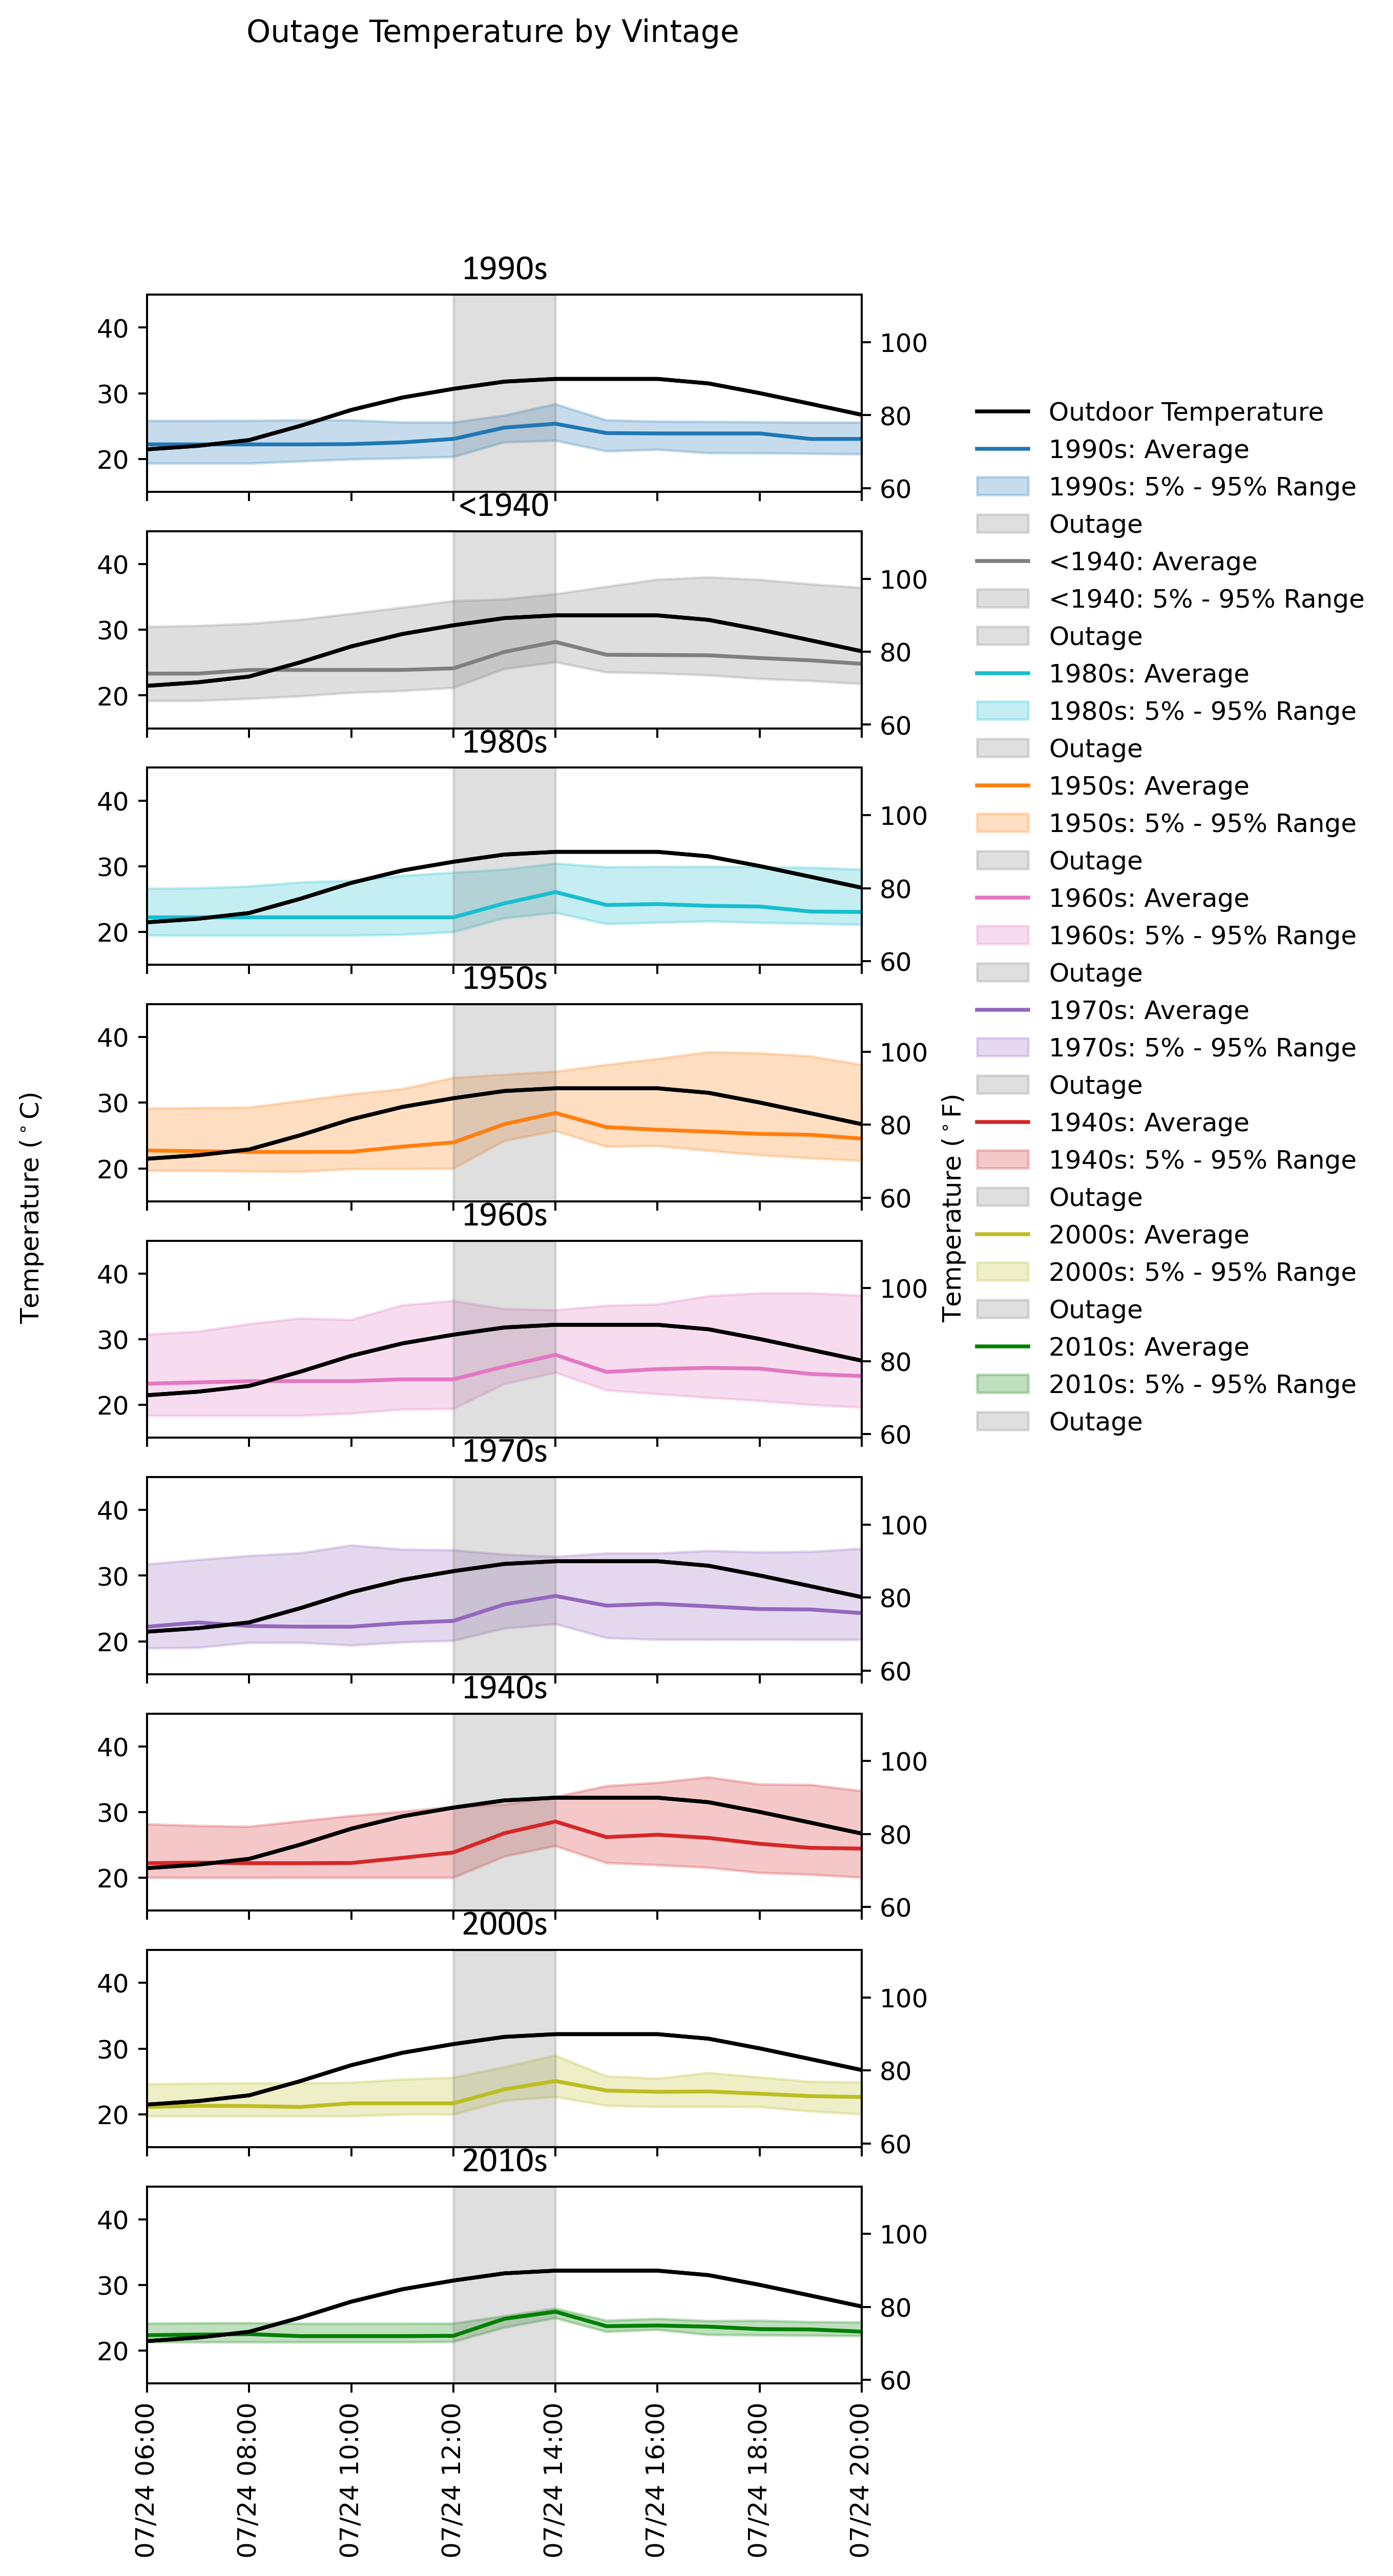

In [33]:
fig, axs = plt.subplots(9,figsize=(5,15),dpi=360)
# y_min = 15
# y_max = 45
# fig.suptitle('Vertically stacked subplots')
ax_id = 0 
 
for vintage in pd.unique(metadata['in.vintage']):
#     cols = 'bldg' + metadata.loc[metadata['in.vintage']== vintage]['bldg_id'].astype(str)
#     subset = pd.DataFrame(out, columns=cols)
#     baseline_summary[vintage + ' - T - 5%'] = subset.quantile(q=.05,axis=1)
#     baseline_summary[vintage + ' - T - 50%'] =subset.quantile(q=.5,axis=1)
#     baseline_summary[vintage + ' - T - 95%'] = subset.quantile(q=.95,axis=1)
    
    if vintage == '<1940':
        vintage_color = 'tab:gray'
    elif vintage == '1940s':
        vintage_color = 'tab:red'
    elif vintage == '1950s':
        vintage_color = 'tab:orange'
    elif vintage == '1960s':
        vintage_color = 'tab:pink'
    elif vintage == '1970s':
        vintage_color = 'tab:purple'
    elif vintage == '1980s':
        vintage_color = 'tab:cyan'
    elif vintage == '1990s':
        vintage_color = 'tab:blue'
    elif vintage == '2000s':
        vintage_color = 'tab:olive'
    else:
        vintage_color = 'green'
        
    if ax_id == 0: 
        axs[ax_id].plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
    else:
        axs[ax_id].plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k')
    axs[ax_id].set_title(vintage,fontsize=subtitlesize,**labelfont)    
    axs[ax_id].plot(outage_summary['Date/Time'],outage_summary[vintage + ' - T - 50%'],color = vintage_color,label= str(vintage + ": Average"))
    axs[ax_id].fill_between(outage_summary['Date/Time'], outage_summary[vintage + ' - T - 5%'], outage_summary[vintage + ' - T - 95%'],alpha=.25,color=vintage_color,label= str(vintage + ": 5% - 95% Range"))
    axs[ax_id].fill_between([otg_start, otg_end],[y_max_t,y_max_t],alpha=.25,color='grey',label= "Outage")

    axs[ax_id].set_ylim([y_min_t,y_max_t])
    axs[ax_id].set_xlim(window_start,window_end)
    axb=axs[ax_id].twinx()
    axb.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
    axb.plot(outdoor['Date/Time'],outdoor['Outdoor Temp']*(9/5) + 32,color='k')
    
    ax_id = ax_id + 1
    
for ax in axs:
    ax.label_outer()
    
# plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
lines = []
labels = []
  
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    labels.extend(Label)
x_ticks = pd.date_range(start =window_start, end =window_end,freq ='2H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
axs[ax_id - 1].set_xticks(x_ticks,x_tick_labels,rotation='vertical')
# fig.tight_layout()
fig.legend(lines, labels, bbox_to_anchor=(1, .85), loc='upper left',frameon=False)
fig.text(0, 0.55, 'Temperature ($^\circ$C)', ha='center', va='center', rotation='vertical')
fig.text(1, 0.55, 'Temperature ($^\circ$F)', ha='center', va='center', rotation='vertical')
fig.suptitle('Outage Temperature by Vintage')
# fig.tight_layout()
# fig.savefig(data_file_path + "/figures/"+"BaselineTempByAcTypeSplit.svg",bbox_inches = "tight")

In [ ]:
# fig, axs = plt.subplots(9,figsize=(5,15),dpi=360)
# y_min = 15
# y_max = 45
# fig.suptitle('Vertically stacked subplots')
ax_id = 0 
 
for vintage in pd.unique(metadata['in.vintage']):    
    if vintage == '<1940':
        vintage_color = 'tab:gray'
    elif vintage == '1940s':
        vintage_color = 'tab:red'
    elif vintage == '1950s':
        vintage_color = 'tab:orange'
    elif vintage == '1960s':
        vintage_color = 'tab:pink'
    elif vintage == '1970s':
        vintage_color = 'tab:purple'
    elif vintage == '1980s':
        vintage_color = 'tab:cyan'
    elif vintage == '1990s':
        vintage_color = 'tab:blue'
    elif vintage == '2000s':
        vintage_color = 'tab:olive'
    else:
        vintage_color = 'green'
        
    if ax_id == 0: 
        axs[ax_id].plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
    else:
        axs[ax_id].plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k')
    axs[ax_id].set_title(vintage,fontsize=subtitlesize,**labelfont)    
    axs[ax_id].plot(outage_summary['Date/Time'],outage_summary[vintage + ' - T - 50%'],color = vintage_color,label= str(vintage + ": Average"))
    axs[ax_id].fill_between(outage_summary['Date/Time'], outage_summary[vintage + ' - T - 5%'], outage_summary[vintage + ' - T - 95%'],alpha=.25,color=vintage_color,label= str(vintage + ": 5% - 95% Range"))
    axs[ax_id].fill_between([otg_start, otg_end],[y_max_t,y_max_t],alpha=.25,color='grey',label= "Outage")

    axs[ax_id].set_ylim([y_min_t,y_max_t])
    axs[ax_id].set_xlim(window_start,window_end)
    axb=axs[ax_id].twinx()
    axb.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
    axb.plot(outdoor['Date/Time'],outdoor['Outdoor Temp']*(9/5) + 32,color='k')
    
    ax_id = ax_id + 1
    
for ax in axs:
    ax.label_outer()
    
# plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
lines = []
labels = []
  
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    labels.extend(Label)
x_ticks = pd.date_range(start =window_start, end =window_end,freq ='2H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
axs[ax_id - 1].set_xticks(x_ticks,x_tick_labels,rotation='vertical')
# fig.tight_layout()
fig.legend(lines, labels, bbox_to_anchor=(1, .85), loc='upper left',frameon=False)
fig.text(0, 0.55, 'Temperature ($^\circ$C)', ha='center', va='center', rotation='vertical')
fig.text(1, 0.55, 'Temperature ($^\circ$F)', ha='center', va='center', rotation='vertical')
fig.suptitle('Outage Temperature by Vintage')
# fig.tight_layout()
# fig.savefig(data_file_path + "/figures/"+"BaselineTempByAcTypeSplit.svg",bbox_inches = "tight")

In [16]:
metadata['in.vintage'].unique()

array(['1990s', '<1940', '1980s', '1950s', '1960s', '1970s', '1940s',
       '2000s', '2010s'], dtype=object)

In [17]:
window = outage_electricity.loc[13:14]
window = window.drop(columns=['Date/Time'])
bad = []
for each_bldg in window.columns:
    if (window[each_bldg] > 0).all():
        bad.append(each_bldg)
metadata['ID']=""
metadata['ID'] = "bldg" + metadata['bldg_id']
bad_df = metadata[metadata['ID'].isin(bad)]
bad_df.to_csv(data_file_path + '/summary/bad_df.csv',index=False)
# data_file_path = r"C:\Users\govertsen.k\Desktop\trial\typical"
